In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvaXovRHJvcGJveC9zdHVmZi9mb3Itb3RoZXJzL3RlYWNoaW5nL0hGSC9HS0kvMDUtZ2tpLXdlYnNpdGUvaW5jbHVkZQ=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/tmp/ipykernel_242137/1583724672.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1748365949.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1748365949.0, "/usr/lib/python3.10/codecs.py": 1748365949.0, "/usr/lib/python3.10/encodings/aliases.py": 1748365949.0, "/usr/lib/python3.10/encodings/__init__.py": 1748365949.0, "/usr/lib/python3.10/encodings/utf_8.py": 1748365949.0, "/usr/lib/python3.10/abc.py": 1748365949.0, "/usr/lib/python3.10/io.py": 1748365949.0, "/usr/lib/python3.10/stat.py": 1748365949.0, "/usr/lib/python3.10/_collections_abc.py": 1748365949.0, "/usr/lib/python3.10/genericpath.py": 1748365949.0, "/usr/lib/python3.10/posixpath.py": 1748365949.0, "/usr/lib/python3.10/os.py": 1748365949.0, "/usr/lib/python3.10/_sitebuiltins.py": 1748365949.0, "/usr/lib/python3.10/sitecustomize.py": 1648890259.0, "/usr/lib/python3.10/site.py": 1748365949.0, "/usr/lib/python3.10/warnings.py": 1748365949.0, "/usr/lib/python3.10/importlib/__init__.py": 1748365949.0, "/usr/lib/python3.10/importlib/machinery.py": 1748365

In [2]:
import keras as K
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-08-12 13:03:19.319950: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-12 13:03:19.324219: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-12 13:03:19.335177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754996599.361944  242137 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754996599.367503  242137 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754996599.382083  242137 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
mnist = K.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
y_train = K.utils.to_categorical(y_train)
y_test = K.utils.to_categorical(y_test)

In [5]:
model = K.models.Sequential()
model.add(K.layers.Flatten())
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dense(10, activation='softmax'))

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

2025-08-12 13:03:22.731154: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 5:31 1s/step - accuracy: 0.0625 - loss: 2.3473

 16/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3522 - loss: 2.0081 

 32/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4817 - loss: 1.7148

 48/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5568 - loss: 1.5020

 61/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5981 - loss: 1.3759

 72/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 1.2914

 86/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6524 - loss: 1.2036

102/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6772 - loss: 1.1222

117/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6960 - loss: 1.0596

133/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7127 - loss: 1.0035

148/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7260 - loss: 0.9585

160/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7354 - loss: 0.9268

174/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7451 - loss: 0.8936

190/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7549 - loss: 0.8599

205/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7631 - loss: 0.8317

220/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7704 - loss: 0.8063

235/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7771 - loss: 0.7834

249/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7827 - loss: 0.7637

263/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7879 - loss: 0.7455

278/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7931 - loss: 0.7274

293/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7980 - loss: 0.7106

310/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8030 - loss: 0.6929

324/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8069 - loss: 0.6793

329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8085 - loss: 0.6737 - val_accuracy: 0.9411 - val_loss: 0.1982


Epoch 2/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9219 - loss: 0.2146

 15/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9450 - loss: 0.1780  

 31/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9447 - loss: 0.1812

 45/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9447 - loss: 0.1835

 59/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9448 - loss: 0.1839

 72/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9450 - loss: 0.1839

 86/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9453 - loss: 0.1834

101/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9457 - loss: 0.1829

116/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9460 - loss: 0.1824

128/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9462 - loss: 0.1818

144/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9466 - loss: 0.1808

156/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9468 - loss: 0.1799

169/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9472 - loss: 0.1789

182/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9474 - loss: 0.1780

194/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9476 - loss: 0.1773

208/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9478 - loss: 0.1765

221/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9480 - loss: 0.1759

236/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9483 - loss: 0.1752

252/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9485 - loss: 0.1744

266/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9487 - loss: 0.1738

281/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9488 - loss: 0.1731

296/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9490 - loss: 0.1725

311/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9492 - loss: 0.1719

324/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9493 - loss: 0.1714

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9494 - loss: 0.1711 - val_accuracy: 0.9560 - val_loss: 0.1486


Epoch 3/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9375 - loss: 0.1428

 17/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9552 - loss: 0.1318 

 32/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9585 - loss: 0.1254

 48/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9598 - loss: 0.1225

 61/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9609 - loss: 0.1195

 73/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9618 - loss: 0.1173

 88/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.1160

103/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9630 - loss: 0.1152

119/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9635 - loss: 0.1142

133/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9639 - loss: 0.1134

148/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9642 - loss: 0.1126

162/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9645 - loss: 0.1119

178/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9648 - loss: 0.1114

193/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9650 - loss: 0.1111

209/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9652 - loss: 0.1108

223/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9653 - loss: 0.1107

234/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9654 - loss: 0.1106

245/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9655 - loss: 0.1104

260/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9656 - loss: 0.1103

275/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9657 - loss: 0.1101

291/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9658 - loss: 0.1100

305/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9659 - loss: 0.1098

319/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9660 - loss: 0.1097

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9660 - loss: 0.1096 - val_accuracy: 0.9630 - val_loss: 0.1229


Epoch 4/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9922 - loss: 0.0310

 16/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0602 

 30/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9793 - loss: 0.0674

 41/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9785 - loss: 0.0702

 51/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9781 - loss: 0.0719

 58/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9779 - loss: 0.0728

 68/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9777 - loss: 0.0740

 76/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9775 - loss: 0.0748

 86/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9773 - loss: 0.0757

 97/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9772 - loss: 0.0764

107/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9771 - loss: 0.0770

118/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9770 - loss: 0.0774

130/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9769 - loss: 0.0778

142/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9768 - loss: 0.0781

155/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9768 - loss: 0.0783

167/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9768 - loss: 0.0784

179/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9768 - loss: 0.0785

191/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.0786

203/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.0787

215/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.0788

223/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.0788

231/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.0789

242/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.0790

253/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.0790

264/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.0790

279/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.0790

294/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.0790

306/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.0790

317/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.0790

329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.0790

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9766 - loss: 0.0790 - val_accuracy: 0.9678 - val_loss: 0.1087


Epoch 5/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9922 - loss: 0.0344

 16/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0426 

 31/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0450

 47/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 0.0466

 61/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0484

 76/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9860 - loss: 0.0502

 86/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0514

 97/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0523

110/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9849 - loss: 0.0532

123/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9845 - loss: 0.0539

139/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.0546

155/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9839 - loss: 0.0552

171/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9836 - loss: 0.0558

186/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9834 - loss: 0.0563

202/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9832 - loss: 0.0567

215/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9831 - loss: 0.0570

228/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9830 - loss: 0.0573

243/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9828 - loss: 0.0576

259/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9827 - loss: 0.0578

275/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9826 - loss: 0.0581

288/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.0583

304/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9824 - loss: 0.0585

319/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9824 - loss: 0.0587

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9823 - loss: 0.0589 - val_accuracy: 0.9688 - val_loss: 0.1079


Epoch 6/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9766 - loss: 0.0406

 14/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9852 - loss: 0.0380 

 28/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9859 - loss: 0.0393

 42/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9860 - loss: 0.0402

 58/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9860 - loss: 0.0408

 73/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9859 - loss: 0.0417

 87/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9858 - loss: 0.0423

102/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9857 - loss: 0.0427

117/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9857 - loss: 0.0432

131/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9857 - loss: 0.0436

144/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9857 - loss: 0.0439

159/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0442

174/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0445

189/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0447

205/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0449

219/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0450

232/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0451

242/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0452

256/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0454

271/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0455

287/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0456

302/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0457

318/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0458

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9854 - loss: 0.0459 - val_accuracy: 0.9687 - val_loss: 0.1045


Epoch 7/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 1.0000 - loss: 0.0273

 17/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9834 - loss: 0.0519 

 33/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.0494

 47/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0477

 57/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9858 - loss: 0.0467

 69/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9862 - loss: 0.0456

 85/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.0445

 99/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0437

115/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9872 - loss: 0.0429

130/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9875 - loss: 0.0423

146/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0416

157/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0412

170/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9880 - loss: 0.0408

186/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9882 - loss: 0.0403

201/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - loss: 0.0399

217/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9884 - loss: 0.0397

232/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9884 - loss: 0.0395

248/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0393

264/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0392

276/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0392

289/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0391

302/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0391

315/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0391

327/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0391

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9885 - loss: 0.0390 - val_accuracy: 0.9714 - val_loss: 0.1045


Epoch 8/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9844 - loss: 0.0641

 16/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9886 - loss: 0.0374 

 32/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0321

 46/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9905 - loss: 0.0308

 58/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9906 - loss: 0.0302

 72/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0296

 87/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9910 - loss: 0.0292

101/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9912 - loss: 0.0289

116/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0286

130/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0284

144/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0284

160/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.0282

172/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0281

182/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0281

195/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0281

209/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0282

224/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0282

238/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0282

253/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0283

267/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0283

279/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0283

293/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0284

307/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.0285

321/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.0286

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9915 - loss: 0.0286 - val_accuracy: 0.9689 - val_loss: 0.1116


Epoch 9/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9844 - loss: 0.0255

 15/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9900 - loss: 0.0256 

 31/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0264

 47/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.0266

 61/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9913 - loss: 0.0261

 72/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9916 - loss: 0.0256

 83/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9919 - loss: 0.0251

 96/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9921 - loss: 0.0248

108/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0245

123/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9926 - loss: 0.0242

138/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - loss: 0.0240

152/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9928 - loss: 0.0239

163/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9929 - loss: 0.0238

177/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0238

191/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0238

207/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0238

222/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0238

239/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9932 - loss: 0.0237

253/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9932 - loss: 0.0237

267/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0237

278/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0236

290/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0236

306/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0237

321/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0237

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9933 - loss: 0.0238 - val_accuracy: 0.9689 - val_loss: 0.1174


Epoch 10/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9766 - loss: 0.0387

 13/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9893 - loss: 0.0246 

 25/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9913 - loss: 0.0227

 38/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9922 - loss: 0.0220

 48/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9927 - loss: 0.0215

 60/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9931 - loss: 0.0210

 71/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9932 - loss: 0.0209

 85/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9933 - loss: 0.0209

 99/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0210

112/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0210

124/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0210

137/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0210

147/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0210

162/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0210

178/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0209

192/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0209

208/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0209

224/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0209

239/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0210

252/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0210

265/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0211

277/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0211

287/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0212

297/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0212

307/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0212

317/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0213

326/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0213

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9933 - loss: 0.0213 - val_accuracy: 0.9727 - val_loss: 0.1095


Epoch 11/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9844 - loss: 0.0271

 12/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9920 - loss: 0.0181 

 27/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9918 - loss: 0.0212

 40/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9920 - loss: 0.0218

 52/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9922 - loss: 0.0219

 64/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9924 - loss: 0.0217

 75/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9926 - loss: 0.0215

 86/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9928 - loss: 0.0213

 98/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9929 - loss: 0.0211

108/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0209

119/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0208

133/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9932 - loss: 0.0206

148/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0204

163/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9935 - loss: 0.0202

179/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9936 - loss: 0.0200

194/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.0198

209/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9938 - loss: 0.0196

220/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9939 - loss: 0.0194

236/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9940 - loss: 0.0193

251/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9940 - loss: 0.0191

266/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9941 - loss: 0.0190

281/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9942 - loss: 0.0189

296/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9942 - loss: 0.0188

311/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9942 - loss: 0.0187

322/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9943 - loss: 0.0187

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9943 - loss: 0.0187 - val_accuracy: 0.9711 - val_loss: 0.1178


Epoch 12/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 1.0000 - loss: 0.0050

 15/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9963 - loss: 0.0126 

 28/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9963 - loss: 0.0126

 42/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9964 - loss: 0.0122

 54/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9964 - loss: 0.0121

 59/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9964 - loss: 0.0121

 65/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9964 - loss: 0.0121

 74/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9963 - loss: 0.0121

 83/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9964 - loss: 0.0121

 97/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9964 - loss: 0.0121

106/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9964 - loss: 0.0121

114/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9964 - loss: 0.0122

122/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9964 - loss: 0.0122

131/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9964 - loss: 0.0122

140/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9964 - loss: 0.0123

151/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9964 - loss: 0.0123

161/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9964 - loss: 0.0124

170/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9964 - loss: 0.0125

181/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9963 - loss: 0.0126

194/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9963 - loss: 0.0127

209/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9963 - loss: 0.0129

224/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9962 - loss: 0.0130

237/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9962 - loss: 0.0131

249/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9962 - loss: 0.0132

264/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9961 - loss: 0.0133

279/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9961 - loss: 0.0134

295/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9961 - loss: 0.0135

311/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9960 - loss: 0.0135

326/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9960 - loss: 0.0136

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9960 - loss: 0.0136 - val_accuracy: 0.9721 - val_loss: 0.1176


Epoch 13/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 1.0000 - loss: 0.0023

 15/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9958 - loss: 0.0097 

 27/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9960 - loss: 0.0110

 42/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9962 - loss: 0.0113

 56/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9965 - loss: 0.0110

 72/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0108

 88/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0107

104/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0107

119/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0107

129/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0107

144/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0107

158/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0108

173/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0108

189/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0109

204/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0110

218/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0110

230/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0111

241/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0111

256/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0112

272/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0112

287/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0112

303/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0113

318/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0113

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9966 - loss: 0.0114 - val_accuracy: 0.9747 - val_loss: 0.1086


Epoch 14/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9922 - loss: 0.0120

 15/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9978 - loss: 0.0078 

 28/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0079

 40/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9979 - loss: 0.0077

 49/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9979 - loss: 0.0076

 59/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9979 - loss: 0.0076

 70/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9979 - loss: 0.0076

 80/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9979 - loss: 0.0077

 94/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9978 - loss: 0.0078

109/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0079

125/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0080

141/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0081

156/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0081

171/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0080

186/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0080

199/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0080

214/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0080

229/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0079

244/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0079

260/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0079

277/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0079

294/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0078

309/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0078

325/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0078

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9979 - loss: 0.0078 - val_accuracy: 0.9746 - val_loss: 0.1182


Epoch 15/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9922 - loss: 0.0075

 16/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9967 - loss: 0.0072 

 33/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9975 - loss: 0.0065

 50/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9977 - loss: 0.0066

 68/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0069

 83/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0070

100/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0071

115/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0072

132/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0074

148/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0075

163/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0076

176/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0077

185/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0077

194/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0077

203/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0077

213/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0078

227/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0078

244/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0079

258/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0080

275/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9977 - loss: 0.0081

292/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9977 - loss: 0.0083

307/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9976 - loss: 0.0084

324/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9976 - loss: 0.0085

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9722 - val_loss: 0.1287


Epoch 16/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9922 - loss: 0.0095

 18/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0095 

 33/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0106

 45/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9963 - loss: 0.0116

 61/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0121

 77/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0124

 94/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0126

108/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0127

122/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0126

138/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0125

154/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0125

170/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0125

184/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0124

197/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0124

212/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0124

229/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0124

245/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0124

260/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0124

274/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0124

289/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.0124

306/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.0124

323/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.0124

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9960 - loss: 0.0125 - val_accuracy: 0.9728 - val_loss: 0.1273


Epoch 17/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9922 - loss: 0.0122

 17/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9972 - loss: 0.0078 

 34/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0091

 51/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0095

 68/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0096

 84/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9966 - loss: 0.0095

100/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9967 - loss: 0.0094

114/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9968 - loss: 0.0094

131/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9969 - loss: 0.0093

148/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0092

165/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0091

182/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0091

198/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0092

212/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0092

228/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0093

246/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0094

263/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0095

279/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0096

294/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9969 - loss: 0.0097

311/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9969 - loss: 0.0098

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9718 - val_loss: 0.1403


Epoch 18/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9922 - loss: 0.0167

 18/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0153 

 33/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.0132

 50/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0117

 67/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9959 - loss: 0.0107

 82/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0100

 97/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0096

112/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9967 - loss: 0.0092

125/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9968 - loss: 0.0089

141/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0086

159/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0084

176/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0082

194/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9973 - loss: 0.0080

211/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9974 - loss: 0.0079

225/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9974 - loss: 0.0079

241/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9974 - loss: 0.0078

258/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9975 - loss: 0.0077

275/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9975 - loss: 0.0077

289/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9975 - loss: 0.0077

306/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0076

323/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0076

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9976 - loss: 0.0076 - val_accuracy: 0.9728 - val_loss: 0.1428


Epoch 19/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 1.0000 - loss: 0.0053

 19/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0068 

 36/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0069

 50/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0069

 67/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0068

 83/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.0067

 99/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.0067

112/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.0067

129/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0067

145/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0067

162/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0067

175/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0067

191/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0067

208/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0067

224/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0068

238/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0068

253/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0069

270/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0069

286/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0070

301/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0070

317/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0071

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0071 - val_accuracy: 0.9746 - val_loss: 0.1281


Epoch 20/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 1.0000 - loss: 0.0011

 18/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0047 

 35/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0054

 52/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0053

 67/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9977 - loss: 0.0053

 84/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0053

101/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0052

118/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0051

133/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0051

149/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0051

166/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0051

183/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0051

199/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0051

216/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0052

233/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0052

250/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0053

265/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0054

282/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0054

299/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0055

316/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0055

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0056 - val_accuracy: 0.9746 - val_loss: 0.1319


Epoch 21/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9922 - loss: 0.0073

 15/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9981 - loss: 0.0029 

 31/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9983 - loss: 0.0035

 47/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0041

 63/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0043

 77/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.0043

 94/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.0043

111/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0043

128/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0042

142/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0042

159/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0041

176/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0040

192/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0040

206/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0040

223/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0040

240/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0039

256/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0039

271/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0039

288/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0039

305/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0038

321/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0038

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.9740 - val_loss: 0.1391


Epoch 22/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9922 - loss: 0.0080

 18/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0043 

 33/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0048

 50/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0052

 66/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0054

 81/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0054

 96/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0054

113/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0054

130/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0054

146/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0055

160/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0055

176/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0056

192/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0057

208/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0057

222/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0058

238/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0058

253/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0059

267/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0059

280/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0059

294/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0059

309/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0060

324/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0060

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0061 - val_accuracy: 0.9683 - val_loss: 0.1720


Epoch 23/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 1.0000 - loss: 0.0076

 15/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9967 - loss: 0.0127 

 30/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9954 - loss: 0.0150

 45/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.0157

 62/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9947 - loss: 0.0158

 78/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.0159

 94/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.0161

111/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.0160

126/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.0159

140/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.0157

154/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9947 - loss: 0.0155

171/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.0153

187/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.0150

204/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9949 - loss: 0.0147

220/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9950 - loss: 0.0145

237/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9951 - loss: 0.0142

252/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9952 - loss: 0.0140

268/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9952 - loss: 0.0139

282/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0137

299/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0137

315/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0137

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9953 - loss: 0.0137 - val_accuracy: 0.9685 - val_loss: 0.1568


Epoch 24/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9844 - loss: 0.0338

 18/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0210 

 34/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9939 - loss: 0.0175

 51/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.0159

 66/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9951 - loss: 0.0151

 78/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0146

 95/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0139

112/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9957 - loss: 0.0134

128/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9959 - loss: 0.0129

144/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9960 - loss: 0.0124

161/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0120

175/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0117

190/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0113

207/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0110

223/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9966 - loss: 0.0107

240/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9967 - loss: 0.0104

253/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9968 - loss: 0.0102

270/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9969 - loss: 0.0099

287/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9969 - loss: 0.0096

304/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0094

317/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9971 - loss: 0.0092

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9971 - loss: 0.0091 - val_accuracy: 0.9757 - val_loss: 0.1340


Epoch 25/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 1.0000 - loss: 6.6673e-04

 12/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 0.0019      

 22/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9994 - loss: 0.0023

 36/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0024

 49/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.0024

 62/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.0024

 77/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.0025

 93/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0025

107/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0025

121/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0026

131/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0026

141/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0026

151/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0026

161/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0026

174/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0027

187/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0027

198/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0028

210/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0028

225/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0029

239/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0029

254/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0029

266/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0029

280/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0030

294/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0030

305/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0030

319/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0030

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 0.9761 - val_loss: 0.1361


Epoch 26/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 1.0000 - loss: 5.8527e-04

 13/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 7.3923e-04  

 23/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 8.2257e-04

 34/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9999 - loss: 9.0997e-04

 44/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9999 - loss: 9.8008e-04

 56/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 0.0010    

 70/329 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 0.0011

 85/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9998 - loss: 0.0011

100/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0011

115/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0011

127/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0011

140/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0011

154/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0011

168/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

180/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

190/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

201/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

211/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

221/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

231/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

243/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

255/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

268/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

281/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

294/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

307/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

318/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0010

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.9769 - val_loss: 0.1344


Epoch 27/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9922 - loss: 0.0065

 16/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9983 - loss: 0.0020 

 32/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0025

 47/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0026

 60/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - loss: 0.0024

 75/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9990 - loss: 0.0023

 90/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9991 - loss: 0.0022

105/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0021

121/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0020

137/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0019

152/329 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0019

164/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0018

176/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0018

186/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0018

199/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0018

210/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0018

221/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0018

233/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0018

245/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0018

257/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0018

269/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0018

281/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0019

293/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0019

305/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0019

317/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0019

329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0020

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9746 - val_loss: 0.1488


Epoch 28/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 1.0000 - loss: 3.5157e-04

 14/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9988 - loss: 0.0048      

 28/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9984 - loss: 0.0071

 44/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9984 - loss: 0.0075

 58/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0072

 73/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0073

 88/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9981 - loss: 0.0077

101/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0081

114/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9977 - loss: 0.0085

129/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9975 - loss: 0.0089

143/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9973 - loss: 0.0093

158/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9971 - loss: 0.0098

174/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0104

188/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0111

203/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9964 - loss: 0.0118

218/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9961 - loss: 0.0125

230/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9960 - loss: 0.0130

240/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9959 - loss: 0.0133

250/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9958 - loss: 0.0136

260/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9957 - loss: 0.0139

271/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0141

281/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9955 - loss: 0.0143

292/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9954 - loss: 0.0146

306/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.0148

317/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.0149

329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9952 - loss: 0.0151

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9707 - val_loss: 0.1658


Epoch 29/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9922 - loss: 0.0114

 17/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9954 - loss: 0.0141 

 31/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9954 - loss: 0.0137

 42/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9955 - loss: 0.0133

 56/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9957 - loss: 0.0128

 71/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9959 - loss: 0.0121

 83/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9961 - loss: 0.0116

 92/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9962 - loss: 0.0113

101/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9963 - loss: 0.0110

109/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9964 - loss: 0.0108

119/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9964 - loss: 0.0106

132/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9964 - loss: 0.0104

146/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9965 - loss: 0.0103

162/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9965 - loss: 0.0101

177/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0099

193/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0097

207/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0096

218/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0095

229/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0094

240/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0093

252/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0092

262/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9969 - loss: 0.0091

272/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9969 - loss: 0.0091

283/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9969 - loss: 0.0090

293/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9969 - loss: 0.0089

301/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9969 - loss: 0.0089

311/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9970 - loss: 0.0088

322/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9970 - loss: 0.0088

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9970 - loss: 0.0088 - val_accuracy: 0.9749 - val_loss: 0.1487


Epoch 30/30


  1/329 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 1.0000 - loss: 0.0042

 13/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9977 - loss: 0.0090 

 28/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0079

 42/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9982 - loss: 0.0068

 54/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9983 - loss: 0.0063

 67/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9984 - loss: 0.0058

 78/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0055

 93/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.0052

105/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.0050

119/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9986 - loss: 0.0048

133/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9986 - loss: 0.0046

148/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9986 - loss: 0.0045

162/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9987 - loss: 0.0043

175/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9987 - loss: 0.0042

189/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9987 - loss: 0.0041

204/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9987 - loss: 0.0040

217/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9987 - loss: 0.0039

227/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0039

238/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0038

251/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0037

265/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0037

277/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0036

292/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0036

308/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0035

323/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - loss: 0.0035

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9752 - val_loss: 0.1447


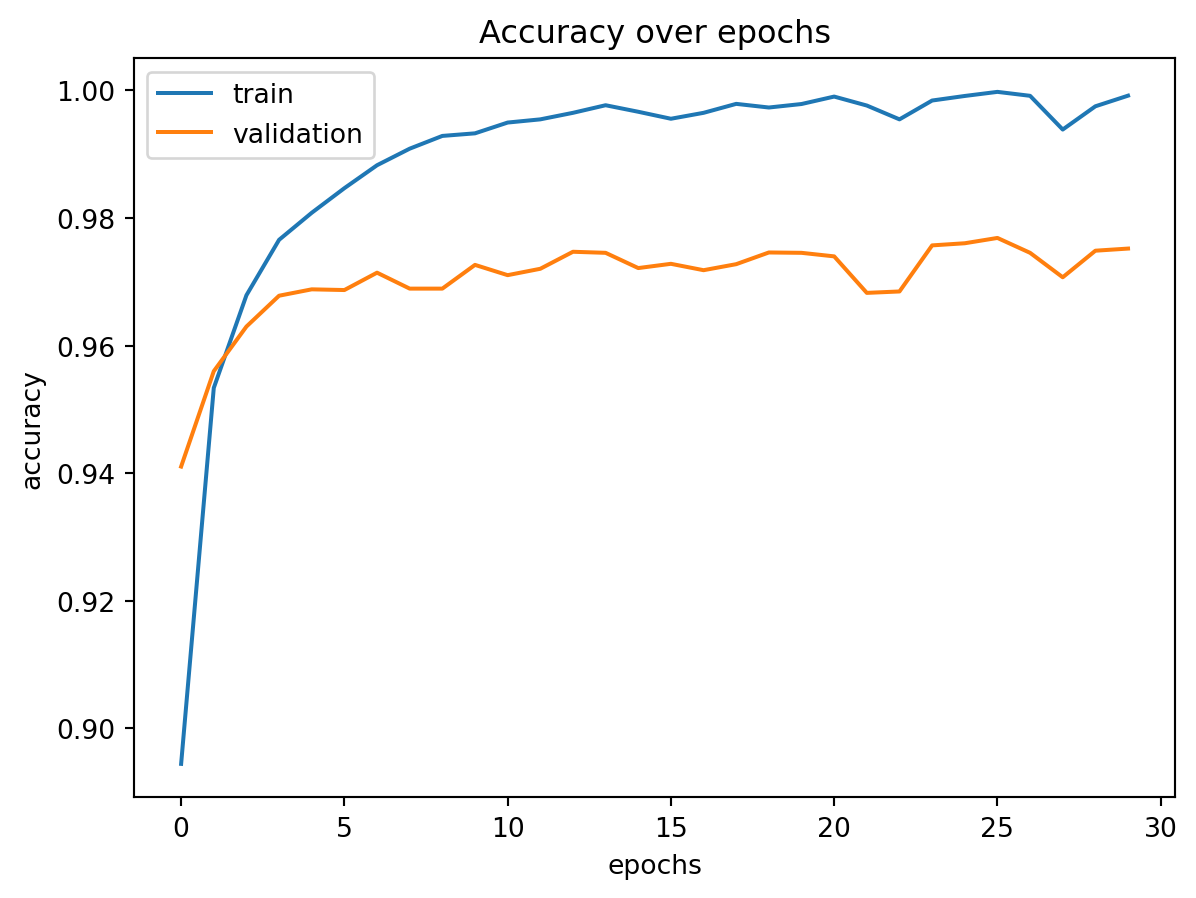

<Figure size 672x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots()
ax.set_title('Accuracy over epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.plot(history.history['accuracy'], label='train')
ax.plot(history.history['val_accuracy'], label='validation')
ax.legend(loc='upper left')
plt.show()
plt.savefig('../figs/mnist_accuracy.png')

In [9]:
fashion = K.datasets.fashion_mnist
(x_train_mf, y_train_mf), (x_test_mf, y_test_mf) = fashion.load_data()
x_train_mf = x_train_mf / 255.0
x_test_mf = x_test_mf / 255.0
y_train_mf = K.utils.to_categorical(y_train_mf)
y_test_mf = K.utils.to_categorical(y_test_mf)

In [10]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

/home/iz/Dropbox/stuff/for-others/teaching/HFH/GKI/02-GKI-python/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model2.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [12]:
x_train_mf = x_train_mf.reshape(-1, 28, 28, 1)
x_test_mf = x_test_mf.reshape(-1, 28, 28, 1)

In [13]:
history = model2.fit(
    x_train_mf, y_train_mf,
    epochs = 30,
    batch_size = 128,
    validation_data = (x_test_mf, y_test_mf)
)

Epoch 1/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 7:09 917ms/step - accuracy: 0.1172 - loss: 2.2948

  3/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.2435 - loss: 2.1641  

  5/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.3010 - loss: 2.0538

  7/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.3378 - loss: 1.9584

  9/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.3692 - loss: 1.8736

 11/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.3932 - loss: 1.8017

 13/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4132 - loss: 1.7382

 15/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.4307 - loss: 1.6828

 17/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4465 - loss: 1.6322

 19/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4606 - loss: 1.5877

 21/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4732 - loss: 1.5481

 23/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.4852 - loss: 1.5117

 25/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4959 - loss: 1.4787

 28/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.5104 - loss: 1.4335

 30/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5192 - loss: 1.4063

 32/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5273 - loss: 1.3809

 34/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5349 - loss: 1.3572

 35/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5384 - loss: 1.3460

 37/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5452 - loss: 1.3248

 39/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5516 - loss: 1.3046

 41/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5577 - loss: 1.2856

 43/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5634 - loss: 1.2678

 45/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5688 - loss: 1.2509

 47/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5739 - loss: 1.2348

 49/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5788 - loss: 1.2198

 51/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.5835 - loss: 1.2054

 53/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.5879 - loss: 1.1917

 55/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.5923 - loss: 1.1785

 57/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.5964 - loss: 1.1658

 59/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6004 - loss: 1.1537

 61/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6042 - loss: 1.1423

 63/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6078 - loss: 1.1313

 65/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6113 - loss: 1.1207

 67/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6147 - loss: 1.1106

 69/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6180 - loss: 1.1009

 71/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6210 - loss: 1.0916

 73/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6240 - loss: 1.0827

 75/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6268 - loss: 1.0741

 78/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6308 - loss: 1.0618

 80/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6334 - loss: 1.0539

 82/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6359 - loss: 1.0464

 84/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6383 - loss: 1.0390

 87/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6418 - loss: 1.0284

 89/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6440 - loss: 1.0216

 91/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6462 - loss: 1.0150

 93/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6483 - loss: 1.0085

 95/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6504 - loss: 1.0023

 97/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6524 - loss: 0.9962

 99/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6543 - loss: 0.9903

101/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6562 - loss: 0.9846

104/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.6590 - loss: 0.9762

106/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.6608 - loss: 0.9708

108/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6626 - loss: 0.9655

110/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6643 - loss: 0.9603

112/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6660 - loss: 0.9552

114/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6677 - loss: 0.9503

116/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6693 - loss: 0.9454

118/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6709 - loss: 0.9407

121/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6732 - loss: 0.9338

123/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6747 - loss: 0.9293

125/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6762 - loss: 0.9249

128/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6784 - loss: 0.9184

130/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6798 - loss: 0.9142

132/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6812 - loss: 0.9101

134/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6826 - loss: 0.9060

137/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6846 - loss: 0.9001 

139/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6859 - loss: 0.8962

141/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6872 - loss: 0.8924

143/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6885 - loss: 0.8887

145/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6897 - loss: 0.8850

147/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6909 - loss: 0.8814

149/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6921 - loss: 0.8779

151/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6933 - loss: 0.8745

153/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6945 - loss: 0.8711

155/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6956 - loss: 0.8677

158/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6973 - loss: 0.8628

160/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6984 - loss: 0.8596

162/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.6995 - loss: 0.8565

164/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7005 - loss: 0.8534

166/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7016 - loss: 0.8504

168/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7026 - loss: 0.8474

170/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7036 - loss: 0.8444

172/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7046 - loss: 0.8415

174/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7056 - loss: 0.8387

176/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7066 - loss: 0.8358

178/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7075 - loss: 0.8331

180/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7084 - loss: 0.8303

182/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7094 - loss: 0.8277

184/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7103 - loss: 0.8250

186/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7112 - loss: 0.8224

188/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7121 - loss: 0.8198

190/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7129 - loss: 0.8173

192/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7138 - loss: 0.8148

194/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7147 - loss: 0.8123

196/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7155 - loss: 0.8099

198/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7163 - loss: 0.8075

200/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.7171 - loss: 0.8052

203/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7184 - loss: 0.8017

205/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7192 - loss: 0.7994

207/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7199 - loss: 0.7972

209/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7207 - loss: 0.7950

211/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7215 - loss: 0.7928

213/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7222 - loss: 0.7907

215/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7230 - loss: 0.7886

217/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7237 - loss: 0.7865

219/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7244 - loss: 0.7844

221/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7251 - loss: 0.7823

223/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7259 - loss: 0.7803

225/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7266 - loss: 0.7783

227/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7273 - loss: 0.7763

229/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7279 - loss: 0.7744

231/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7286 - loss: 0.7725

233/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7293 - loss: 0.7705

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7300 - loss: 0.7687

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7306 - loss: 0.7668

239/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7313 - loss: 0.7650

241/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7319 - loss: 0.7632

243/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7325 - loss: 0.7614

245/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7331 - loss: 0.7596

247/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7338 - loss: 0.7578

249/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7344 - loss: 0.7561

251/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7350 - loss: 0.7543

253/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7356 - loss: 0.7526

255/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7362 - loss: 0.7509

257/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7368 - loss: 0.7493

259/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7373 - loss: 0.7476

261/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7379 - loss: 0.7460

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7385 - loss: 0.7443

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7391 - loss: 0.7427

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7396 - loss: 0.7411

269/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7402 - loss: 0.7396

271/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7407 - loss: 0.7380

273/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7413 - loss: 0.7365

275/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7418 - loss: 0.7349

277/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7423 - loss: 0.7334

279/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7428 - loss: 0.7319

281/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7434 - loss: 0.7304

283/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7439 - loss: 0.7290

285/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7444 - loss: 0.7275

287/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7449 - loss: 0.7261

289/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7454 - loss: 0.7247

291/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7459 - loss: 0.7233

293/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7464 - loss: 0.7219

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7471 - loss: 0.7198

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7476 - loss: 0.7184

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7480 - loss: 0.7171

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7485 - loss: 0.7157

304/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7490 - loss: 0.7144

306/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7494 - loss: 0.7131

308/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7499 - loss: 0.7118

310/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7504 - loss: 0.7105

312/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7508 - loss: 0.7092

314/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7513 - loss: 0.7079

316/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7517 - loss: 0.7066

318/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7521 - loss: 0.7054

320/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7526 - loss: 0.7041

322/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7530 - loss: 0.7029

324/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7534 - loss: 0.7017

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7539 - loss: 0.7004

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7543 - loss: 0.6992

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7547 - loss: 0.6980

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7551 - loss: 0.6968

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7555 - loss: 0.6957

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7559 - loss: 0.6945

338/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7564 - loss: 0.6933

340/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7568 - loss: 0.6922

342/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7572 - loss: 0.6910

344/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7576 - loss: 0.6899

346/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7580 - loss: 0.6888

348/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7583 - loss: 0.6876

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7589 - loss: 0.6860

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7593 - loss: 0.6849

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7597 - loss: 0.6838

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7601 - loss: 0.6827

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7605 - loss: 0.6816

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7608 - loss: 0.6805

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7612 - loss: 0.6795

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7618 - loss: 0.6779

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7621 - loss: 0.6769

370/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7625 - loss: 0.6758

372/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7629 - loss: 0.6748

374/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7632 - loss: 0.6738

376/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7636 - loss: 0.6727

378/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7639 - loss: 0.6717

380/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7643 - loss: 0.6707

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7646 - loss: 0.6697

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7650 - loss: 0.6688

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7653 - loss: 0.6678

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7658 - loss: 0.6663

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7662 - loss: 0.6654

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7665 - loss: 0.6644

395/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7668 - loss: 0.6635

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7672 - loss: 0.6625

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7675 - loss: 0.6616

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7678 - loss: 0.6607

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7680 - loss: 0.6602

404/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7683 - loss: 0.6593

406/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7686 - loss: 0.6583

408/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7689 - loss: 0.6574

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7692 - loss: 0.6565

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7696 - loss: 0.6556

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7699 - loss: 0.6547

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7702 - loss: 0.6538

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7705 - loss: 0.6530

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7708 - loss: 0.6521

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7711 - loss: 0.6512

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7714 - loss: 0.6503

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7717 - loss: 0.6495

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7720 - loss: 0.6486

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7723 - loss: 0.6478

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7726 - loss: 0.6469

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7729 - loss: 0.6461

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7732 - loss: 0.6452

438/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7735 - loss: 0.6444

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7738 - loss: 0.6436

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7741 - loss: 0.6427

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7743 - loss: 0.6419

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7746 - loss: 0.6411

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7749 - loss: 0.6403

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7752 - loss: 0.6395

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7755 - loss: 0.6387

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7758 - loss: 0.6379

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7760 - loss: 0.6371

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7763 - loss: 0.6363

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7766 - loss: 0.6355

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7769 - loss: 0.6347

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7771 - loss: 0.6340

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7774 - loss: 0.6332

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7777 - loss: 0.6324

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.7779 - loss: 0.6317 - val_accuracy: 0.8722 - val_loss: 0.3573


Epoch 2/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8750 - loss: 0.3157

  3/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8937 - loss: 0.2940

  5/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8977 - loss: 0.2866

  7/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8979 - loss: 0.2877

  9/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8986 - loss: 0.2916

 11/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8983 - loss: 0.2967

 13/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8978 - loss: 0.3015

 15/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8977 - loss: 0.3036

 17/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8978 - loss: 0.3048

 19/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8977 - loss: 0.3058

 21/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8975 - loss: 0.3068

 23/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8975 - loss: 0.3072

 25/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8976 - loss: 0.3071

 27/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8976 - loss: 0.3073

 29/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8975 - loss: 0.3074

 31/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8975 - loss: 0.3076

 33/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8973 - loss: 0.3078

 35/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8971 - loss: 0.3080

 37/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8970 - loss: 0.3081

 39/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8970 - loss: 0.3080

 41/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8969 - loss: 0.3081

 43/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8968 - loss: 0.3082

 45/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8967 - loss: 0.3084

 47/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8965 - loss: 0.3086

 49/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8964 - loss: 0.3088

 51/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8962 - loss: 0.3091

 53/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8960 - loss: 0.3094

 55/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8959 - loss: 0.3096

 58/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8957 - loss: 0.3099

 60/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8955 - loss: 0.3102

 62/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8954 - loss: 0.3104

 64/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8953 - loss: 0.3105

 66/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8951 - loss: 0.3108

 68/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8950 - loss: 0.3110

 70/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8949 - loss: 0.3111

 72/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8949 - loss: 0.3112

 75/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8947 - loss: 0.3115

 78/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8946 - loss: 0.3118

 80/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8945 - loss: 0.3119

 82/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8944 - loss: 0.3121

 84/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8943 - loss: 0.3123

 86/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8942 - loss: 0.3124

 88/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8942 - loss: 0.3125

 90/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8941 - loss: 0.3127

 92/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8940 - loss: 0.3128

 94/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8939 - loss: 0.3129

 96/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8939 - loss: 0.3130

 98/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8938 - loss: 0.3131

100/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8937 - loss: 0.3132

102/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8936 - loss: 0.3133

104/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8936 - loss: 0.3134

106/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8935 - loss: 0.3135

108/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8934 - loss: 0.3136

110/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8934 - loss: 0.3137

112/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8933 - loss: 0.3137

114/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8933 - loss: 0.3138

116/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8932 - loss: 0.3138

118/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8932 - loss: 0.3139

120/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8931 - loss: 0.3140

122/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8931 - loss: 0.3141

125/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8930 - loss: 0.3142

127/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8930 - loss: 0.3142

129/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8929 - loss: 0.3143

131/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8929 - loss: 0.3143

133/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8928 - loss: 0.3144

136/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8928 - loss: 0.3144

138/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8928 - loss: 0.3145

140/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8927 - loss: 0.3145

142/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8927 - loss: 0.3145

144/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8927 - loss: 0.3145

146/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8926 - loss: 0.3145

148/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8926 - loss: 0.3146

150/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8926 - loss: 0.3146

152/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8925 - loss: 0.3146

154/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8925 - loss: 0.3146

157/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8925 - loss: 0.3146

159/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8925 - loss: 0.3146

161/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8924 - loss: 0.3146

164/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8924 - loss: 0.3146

166/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8924 - loss: 0.3146

168/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8924 - loss: 0.3146

170/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8924 - loss: 0.3146 

172/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8924 - loss: 0.3145

174/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8924 - loss: 0.3145

176/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8924 - loss: 0.3145

178/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8924 - loss: 0.3144

180/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8924 - loss: 0.3144

182/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8924 - loss: 0.3144

184/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8924 - loss: 0.3143

186/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8923 - loss: 0.3143

188/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8923 - loss: 0.3143

190/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8923 - loss: 0.3142

192/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8923 - loss: 0.3142

194/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8923 - loss: 0.3141

196/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8923 - loss: 0.3141

198/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8923 - loss: 0.3141

200/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8923 - loss: 0.3140

202/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8923 - loss: 0.3140

204/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8923 - loss: 0.3140

206/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8923 - loss: 0.3139

209/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8922 - loss: 0.3139

211/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8922 - loss: 0.3139

214/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8922 - loss: 0.3138

216/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8922 - loss: 0.3138

218/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8922 - loss: 0.3138

220/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8922 - loss: 0.3137

222/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8922 - loss: 0.3137

224/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8922 - loss: 0.3137

226/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8922 - loss: 0.3136

228/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8922 - loss: 0.3136

230/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8922 - loss: 0.3136

232/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8922 - loss: 0.3135

234/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8922 - loss: 0.3135

236/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8922 - loss: 0.3135

238/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8922 - loss: 0.3134

240/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8922 - loss: 0.3134

242/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8922 - loss: 0.3134

244/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8921 - loss: 0.3134

246/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8921 - loss: 0.3133

248/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8921 - loss: 0.3133

250/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8921 - loss: 0.3133

252/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8921 - loss: 0.3133

254/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8921 - loss: 0.3133

256/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8921 - loss: 0.3132

258/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3132

260/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3132

262/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3132

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3131

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3131

269/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3130

271/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3130

273/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3129

275/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3129

277/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3128

279/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3128

281/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3127

283/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3127

285/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8921 - loss: 0.3126

287/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8921 - loss: 0.3126

289/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8921 - loss: 0.3126

291/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8921 - loss: 0.3125

293/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8921 - loss: 0.3125

295/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8921 - loss: 0.3124

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8921 - loss: 0.3124

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8921 - loss: 0.3123

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8921 - loss: 0.3123

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8921 - loss: 0.3123

305/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8921 - loss: 0.3122

307/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8922 - loss: 0.3122

309/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8922 - loss: 0.3121

311/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8922 - loss: 0.3121

313/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8922 - loss: 0.3120

315/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8922 - loss: 0.3120

317/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3119

320/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3118

322/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3118

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3118

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3117

327/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3117

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3116

331/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3116

333/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3115

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8922 - loss: 0.3115

337/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8923 - loss: 0.3114

339/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8923 - loss: 0.3114

341/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8923 - loss: 0.3113

343/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8923 - loss: 0.3113

345/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8923 - loss: 0.3112

348/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3111

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3111

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3110

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3110

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3109

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3109

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3108

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3108

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3107

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3107

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3106

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3106

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8923 - loss: 0.3105

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8924 - loss: 0.3105

377/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8924 - loss: 0.3104

379/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3104

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3103

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3103

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3103

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3102

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3102

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3101

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3101

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3100

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3100

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3100

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3099

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3099

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3098

408/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8924 - loss: 0.3098

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3098

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3097

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3097

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3096

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3096

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3096

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3095

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3095

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3094

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3094

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3094

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3093

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3093

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3092

438/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8924 - loss: 0.3092

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8924 - loss: 0.3092

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8924 - loss: 0.3091

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8924 - loss: 0.3091

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8924 - loss: 0.3091

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8924 - loss: 0.3090

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8924 - loss: 0.3090

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8924 - loss: 0.3090

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8925 - loss: 0.3089

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8925 - loss: 0.3089

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8925 - loss: 0.3089

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8925 - loss: 0.3088

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8925 - loss: 0.3088

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8925 - loss: 0.3087

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8925 - loss: 0.3087

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8925 - loss: 0.3087

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8925 - loss: 0.3086 - val_accuracy: 0.8921 - val_loss: 0.2955


Epoch 3/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9297 - loss: 0.1987

  3/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9353 - loss: 0.1904

  5/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9307 - loss: 0.2020

  7/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9263 - loss: 0.2113

  9/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9225 - loss: 0.2205

 11/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9198 - loss: 0.2273

 13/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9187 - loss: 0.2307

 15/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9182 - loss: 0.2324

 17/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9176 - loss: 0.2339

 19/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9169 - loss: 0.2352

 21/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9164 - loss: 0.2363

 23/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9155 - loss: 0.2383

 25/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9147 - loss: 0.2401

 27/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9141 - loss: 0.2416

 30/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9134 - loss: 0.2433

 32/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9130 - loss: 0.2443

 34/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9126 - loss: 0.2452

 36/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9123 - loss: 0.2460

 38/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9120 - loss: 0.2467

 40/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9117 - loss: 0.2474

 42/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9114 - loss: 0.2482

 44/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9111 - loss: 0.2488

 46/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9109 - loss: 0.2493

 48/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9106 - loss: 0.2498

 50/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9104 - loss: 0.2502

 52/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9103 - loss: 0.2506

 54/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9101 - loss: 0.2511

 56/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9099 - loss: 0.2516

 58/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9097 - loss: 0.2521

 60/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9095 - loss: 0.2526

 62/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9093 - loss: 0.2530

 64/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9091 - loss: 0.2535

 66/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9089 - loss: 0.2539

 68/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9087 - loss: 0.2544

 70/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9085 - loss: 0.2548

 72/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9083 - loss: 0.2552

 74/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9082 - loss: 0.2555

 76/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9081 - loss: 0.2559

 78/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9079 - loss: 0.2563

 81/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9077 - loss: 0.2568

 83/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9076 - loss: 0.2571

 85/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9075 - loss: 0.2573

 87/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9074 - loss: 0.2576

 89/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9073 - loss: 0.2578

 91/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9072 - loss: 0.2581

 93/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9071 - loss: 0.2584

 95/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9070 - loss: 0.2586

 97/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9069 - loss: 0.2589

 99/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9068 - loss: 0.2591

101/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9067 - loss: 0.2593

103/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9067 - loss: 0.2596

105/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9066 - loss: 0.2598

107/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9065 - loss: 0.2599

109/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9064 - loss: 0.2601

111/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9064 - loss: 0.2603

113/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9063 - loss: 0.2604

115/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9063 - loss: 0.2605

117/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9062 - loss: 0.2607

119/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9062 - loss: 0.2608

121/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9062 - loss: 0.2609

123/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9061 - loss: 0.2610

125/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9061 - loss: 0.2611

127/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9060 - loss: 0.2612

129/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9060 - loss: 0.2613

131/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9060 - loss: 0.2614

133/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9059 - loss: 0.2615

135/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9059 - loss: 0.2616

137/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9058 - loss: 0.2617

139/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9058 - loss: 0.2618

141/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9058 - loss: 0.2619

143/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9057 - loss: 0.2620

145/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9057 - loss: 0.2620

147/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9057 - loss: 0.2621

149/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9056 - loss: 0.2622

151/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9056 - loss: 0.2623

153/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9056 - loss: 0.2623

155/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9056 - loss: 0.2624

157/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9055 - loss: 0.2625

159/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9055 - loss: 0.2626

161/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9055 - loss: 0.2626

164/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9055 - loss: 0.2627

166/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9055 - loss: 0.2628

168/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9054 - loss: 0.2628

170/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9054 - loss: 0.2629

172/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9054 - loss: 0.2629

174/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9054 - loss: 0.2630

176/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9054 - loss: 0.2630

178/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9054 - loss: 0.2631 

180/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9053 - loss: 0.2631

182/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9053 - loss: 0.2631

184/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9053 - loss: 0.2632

187/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9053 - loss: 0.2632

189/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9053 - loss: 0.2632

191/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9053 - loss: 0.2633

193/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9052 - loss: 0.2633

195/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9052 - loss: 0.2633

197/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9052 - loss: 0.2634

199/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9052 - loss: 0.2634

201/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9052 - loss: 0.2635

203/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9052 - loss: 0.2635

205/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9052 - loss: 0.2636

207/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2636

209/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2636

211/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2637

213/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2637

215/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2638

217/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2638

219/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2638

221/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2639

223/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2639

225/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2639

227/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2640

229/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9051 - loss: 0.2640

231/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9050 - loss: 0.2640

233/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9050 - loss: 0.2641

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2641

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2641

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2641

241/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2642

243/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2642

245/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2642

247/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2642

249/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2642

251/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2643

253/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2643

255/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2643

257/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2643

259/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2643

262/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2643

264/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9050 - loss: 0.2643

266/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2643

268/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2643

270/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

272/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

274/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

276/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

278/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

280/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

282/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

284/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

286/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

288/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

290/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

292/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9050 - loss: 0.2644

294/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2644

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2644

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2644

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2644

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2644

304/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2644

306/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2643

308/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2643

310/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2643

313/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2643

315/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2643

317/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9050 - loss: 0.2643

319/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9051 - loss: 0.2643

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2643

324/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2643

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2642

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2642

331/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2642

333/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2642

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2642

337/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2642

339/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2641

341/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2641

343/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2641

345/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2641

347/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2641

349/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9051 - loss: 0.2641

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9051 - loss: 0.2640

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2640

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2640

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2640

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2640

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2640

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2640

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2639

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2639

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2639

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2639

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2639

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2639

377/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2638

379/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9052 - loss: 0.2638

381/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9052 - loss: 0.2638

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2638

385/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2638

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2638

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2638

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2637

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2637

395/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2637

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2637

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2637

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2636

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2636

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2636

407/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9053 - loss: 0.2636

409/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9054 - loss: 0.2636

411/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2635

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2635

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2635

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2635

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2634

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2634

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2634

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2634

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2634

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2634

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2633

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9054 - loss: 0.2633

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9055 - loss: 0.2633

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9055 - loss: 0.2633

439/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9055 - loss: 0.2633

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2633

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2633

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2632

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2632

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2632

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2632

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2632

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2632

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2632

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2631

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2631

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2631

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2631

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9055 - loss: 0.2631

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9055 - loss: 0.2631 - val_accuracy: 0.8931 - val_loss: 0.2897


Epoch 4/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.8984 - loss: 0.2382

  3/469 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9076 - loss: 0.2462

  5/469 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.9121 - loss: 0.2374

  7/469 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9123 - loss: 0.2356

  9/469 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9116 - loss: 0.2381

 11/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9107 - loss: 0.2398

 13/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9098 - loss: 0.2413

 15/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9089 - loss: 0.2425

 17/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9086 - loss: 0.2429

 19/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9084 - loss: 0.2434

 21/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9082 - loss: 0.2437

 23/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9082 - loss: 0.2438

 25/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9082 - loss: 0.2439

 27/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9083 - loss: 0.2440

 29/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9083 - loss: 0.2441

 31/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9083 - loss: 0.2443

 33/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9084 - loss: 0.2443

 35/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9085 - loss: 0.2444

 37/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9086 - loss: 0.2443

 39/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9088 - loss: 0.2441

 41/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9089 - loss: 0.2441

 43/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9091 - loss: 0.2439

 45/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9093 - loss: 0.2436

 47/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9094 - loss: 0.2434

 49/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9096 - loss: 0.2433

 51/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9097 - loss: 0.2431

 53/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9098 - loss: 0.2430

 55/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9098 - loss: 0.2428

 57/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9099 - loss: 0.2427

 59/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9099 - loss: 0.2426

 61/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9100 - loss: 0.2425

 63/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9101 - loss: 0.2424

 65/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9101 - loss: 0.2423

 67/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9102 - loss: 0.2422

 69/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9103 - loss: 0.2420

 71/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9103 - loss: 0.2418

 73/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9104 - loss: 0.2417

 75/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9105 - loss: 0.2417

 77/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9105 - loss: 0.2416

 79/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9106 - loss: 0.2414

 81/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9106 - loss: 0.2413

 83/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9107 - loss: 0.2412

 85/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9108 - loss: 0.2411

 87/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9108 - loss: 0.2410

 89/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9109 - loss: 0.2409

 91/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9110 - loss: 0.2408

 93/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9111 - loss: 0.2407

 95/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9111 - loss: 0.2405

 97/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9112 - loss: 0.2404

 99/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9113 - loss: 0.2404

101/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9113 - loss: 0.2403

103/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9114 - loss: 0.2403

105/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9114 - loss: 0.2402

107/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9114 - loss: 0.2402

110/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9115 - loss: 0.2401

112/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9116 - loss: 0.2401

114/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9116 - loss: 0.2400

116/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9117 - loss: 0.2400

118/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9117 - loss: 0.2399

120/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9117 - loss: 0.2398

122/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9118 - loss: 0.2398

124/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9118 - loss: 0.2397

126/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9119 - loss: 0.2396

128/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9119 - loss: 0.2395

130/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9120 - loss: 0.2395

133/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9121 - loss: 0.2394

135/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9121 - loss: 0.2393

137/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9122 - loss: 0.2392

139/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9122 - loss: 0.2392

141/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9123 - loss: 0.2391

144/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9124 - loss: 0.2390

146/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9124 - loss: 0.2389

148/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9125 - loss: 0.2388

150/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9125 - loss: 0.2388

152/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9126 - loss: 0.2387

154/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9126 - loss: 0.2386

157/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9127 - loss: 0.2385

159/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9127 - loss: 0.2385

161/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9128 - loss: 0.2384

163/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9128 - loss: 0.2384

165/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9128 - loss: 0.2383

167/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9129 - loss: 0.2383

169/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9129 - loss: 0.2382

171/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9129 - loss: 0.2381

173/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9130 - loss: 0.2381

175/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9130 - loss: 0.2381 

177/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9130 - loss: 0.2380

179/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9130 - loss: 0.2380

181/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9131 - loss: 0.2379

183/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9131 - loss: 0.2379

185/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9131 - loss: 0.2379

187/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9131 - loss: 0.2378

189/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9131 - loss: 0.2378

191/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9132 - loss: 0.2377

193/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9132 - loss: 0.2377

195/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9132 - loss: 0.2377

197/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9132 - loss: 0.2376

199/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9132 - loss: 0.2376

201/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9132 - loss: 0.2376

203/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9132 - loss: 0.2376

205/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9132 - loss: 0.2375

207/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9132 - loss: 0.2375

209/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9132 - loss: 0.2375

211/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9132 - loss: 0.2375

213/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9133 - loss: 0.2374

216/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9133 - loss: 0.2374

218/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9133 - loss: 0.2374

220/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9133 - loss: 0.2373

223/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9133 - loss: 0.2373

225/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9133 - loss: 0.2373

227/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9133 - loss: 0.2372

229/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9133 - loss: 0.2372

231/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9134 - loss: 0.2372

233/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9134 - loss: 0.2371

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9134 - loss: 0.2371

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9134 - loss: 0.2371

240/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9134 - loss: 0.2370

242/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9134 - loss: 0.2370

244/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9134 - loss: 0.2370

246/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9134 - loss: 0.2370

248/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9134 - loss: 0.2369

250/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9135 - loss: 0.2369

252/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9135 - loss: 0.2369

254/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9135 - loss: 0.2368

256/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9135 - loss: 0.2368

258/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9135 - loss: 0.2368

261/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9135 - loss: 0.2367

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9135 - loss: 0.2367

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9135 - loss: 0.2367

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9135 - loss: 0.2366

269/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9136 - loss: 0.2366

271/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9136 - loss: 0.2366

273/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9136 - loss: 0.2365

275/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9136 - loss: 0.2365

277/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9136 - loss: 0.2365

279/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9136 - loss: 0.2364

281/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9136 - loss: 0.2364

283/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9137 - loss: 0.2363

285/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9137 - loss: 0.2363

287/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9137 - loss: 0.2363

289/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9137 - loss: 0.2363

291/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9137 - loss: 0.2362

294/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9137 - loss: 0.2362

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9137 - loss: 0.2361

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9137 - loss: 0.2361

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9138 - loss: 0.2361

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9138 - loss: 0.2360

305/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9138 - loss: 0.2360

307/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9138 - loss: 0.2360

309/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9138 - loss: 0.2360

311/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9138 - loss: 0.2359

313/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9138 - loss: 0.2359

315/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9138 - loss: 0.2359

317/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9138 - loss: 0.2358

319/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9138 - loss: 0.2358

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9139 - loss: 0.2358

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9139 - loss: 0.2358

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9139 - loss: 0.2358

327/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9139 - loss: 0.2357

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9139 - loss: 0.2357

331/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9139 - loss: 0.2357

333/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9139 - loss: 0.2357

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9139 - loss: 0.2356

337/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9139 - loss: 0.2356

339/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9139 - loss: 0.2356

341/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9139 - loss: 0.2356

343/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9139 - loss: 0.2356

345/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9139 - loss: 0.2355

348/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9139 - loss: 0.2355

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9139 - loss: 0.2355

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9140 - loss: 0.2355

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9140 - loss: 0.2354

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9140 - loss: 0.2354

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9140 - loss: 0.2354

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2354

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2354

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2353

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2353

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2353

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2353

372/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2353

374/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2353

376/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2352

378/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2352

380/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9140 - loss: 0.2352

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9140 - loss: 0.2352

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9140 - loss: 0.2352

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9140 - loss: 0.2352

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9140 - loss: 0.2352

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9140 - loss: 0.2351

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9140 - loss: 0.2351

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9141 - loss: 0.2351

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9141 - loss: 0.2351

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9141 - loss: 0.2351

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9141 - loss: 0.2351

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9141 - loss: 0.2351

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9141 - loss: 0.2351

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9141 - loss: 0.2350

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9141 - loss: 0.2350

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9141 - loss: 0.2350

408/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9141 - loss: 0.2350

409/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9141 - loss: 0.2350

411/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9141 - loss: 0.2350

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9141 - loss: 0.2350

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9141 - loss: 0.2349

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9141 - loss: 0.2349

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9141 - loss: 0.2349

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9141 - loss: 0.2349

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9141 - loss: 0.2349

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9141 - loss: 0.2349

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9141 - loss: 0.2349

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9141 - loss: 0.2348

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9141 - loss: 0.2348

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9142 - loss: 0.2348

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9142 - loss: 0.2348

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9142 - loss: 0.2348

439/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9142 - loss: 0.2348

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9142 - loss: 0.2348

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9142 - loss: 0.2347

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9142 - loss: 0.2347

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9142 - loss: 0.2347

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9142 - loss: 0.2347

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9142 - loss: 0.2347

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9142 - loss: 0.2347

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9142 - loss: 0.2347

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9142 - loss: 0.2346

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9142 - loss: 0.2346

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9142 - loss: 0.2346

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9142 - loss: 0.2346

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9142 - loss: 0.2346

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9142 - loss: 0.2346

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9142 - loss: 0.2346 - val_accuracy: 0.9041 - val_loss: 0.2667


Epoch 5/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.9766 - loss: 0.0797

  3/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9696 - loss: 0.1050

  5/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9635 - loss: 0.1226

  7/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9594 - loss: 0.1344

  9/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9538 - loss: 0.1490

 11/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9492 - loss: 0.1597

 13/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9460 - loss: 0.1664

 15/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9429 - loss: 0.1716

 17/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9405 - loss: 0.1761

 19/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9386 - loss: 0.1794

 21/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9370 - loss: 0.1823

 23/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9356 - loss: 0.1853

 25/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9344 - loss: 0.1876

 27/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9335 - loss: 0.1895

 29/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9326 - loss: 0.1912

 31/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9318 - loss: 0.1927

 33/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9312 - loss: 0.1939

 35/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9307 - loss: 0.1950

 37/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9301 - loss: 0.1959

 39/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9297 - loss: 0.1967

 41/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9293 - loss: 0.1974

 43/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9290 - loss: 0.1980

 45/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9287 - loss: 0.1985

 47/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9286 - loss: 0.1988

 49/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9284 - loss: 0.1990

 51/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9283 - loss: 0.1993

 53/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9282 - loss: 0.1995

 55/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9282 - loss: 0.1996

 57/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9281 - loss: 0.1997

 59/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9280 - loss: 0.1999

 61/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9279 - loss: 0.2001

 63/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9278 - loss: 0.2004

 65/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9277 - loss: 0.2006

 67/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9276 - loss: 0.2008

 69/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9274 - loss: 0.2010

 71/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9273 - loss: 0.2012

 73/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9273 - loss: 0.2014

 75/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9272 - loss: 0.2015

 77/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9271 - loss: 0.2016

 79/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9270 - loss: 0.2017

 81/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9269 - loss: 0.2018

 83/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9269 - loss: 0.2019

 85/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9268 - loss: 0.2019

 87/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9268 - loss: 0.2020

 89/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9267 - loss: 0.2021

 91/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9267 - loss: 0.2021

 93/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9266 - loss: 0.2021

 95/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9266 - loss: 0.2022

 97/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9266 - loss: 0.2022

 99/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9265 - loss: 0.2022

101/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9265 - loss: 0.2023

103/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9265 - loss: 0.2023

105/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9264 - loss: 0.2024

107/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9264 - loss: 0.2024

109/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9264 - loss: 0.2024

111/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9263 - loss: 0.2024

113/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9263 - loss: 0.2025

115/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9263 - loss: 0.2025

117/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9263 - loss: 0.2025

119/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9262 - loss: 0.2026

122/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9262 - loss: 0.2026

124/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9262 - loss: 0.2027

126/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9262 - loss: 0.2027

128/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9262 - loss: 0.2027

130/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9261 - loss: 0.2027

132/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9261 - loss: 0.2027

134/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9261 - loss: 0.2028

136/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9261 - loss: 0.2028

138/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9261 - loss: 0.2029

140/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9260 - loss: 0.2030

142/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9260 - loss: 0.2030

144/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9260 - loss: 0.2031

146/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9260 - loss: 0.2031

148/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9259 - loss: 0.2031

150/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9259 - loss: 0.2032

153/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9259 - loss: 0.2032

155/469 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9259 - loss: 0.2033

157/469 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9259 - loss: 0.2033

159/469 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9259 - loss: 0.2034

161/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2034 

163/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2034

165/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2034

167/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2035

169/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2035

171/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2035

173/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2036

175/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2036

177/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2036

180/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2036

182/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2037

184/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2037

186/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2037

188/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9258 - loss: 0.2037

190/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

192/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

194/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

196/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

198/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

200/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

203/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

205/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

208/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

210/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

212/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

214/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9258 - loss: 0.2037

217/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9258 - loss: 0.2037

219/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9258 - loss: 0.2037

221/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9258 - loss: 0.2037

224/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9258 - loss: 0.2037

226/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9258 - loss: 0.2037

228/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9258 - loss: 0.2037

230/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9259 - loss: 0.2037

232/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9259 - loss: 0.2037

234/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9259 - loss: 0.2037

236/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9259 - loss: 0.2037

238/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9259 - loss: 0.2037

240/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9259 - loss: 0.2037

242/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9259 - loss: 0.2037

245/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

247/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

249/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

251/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

253/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

255/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

257/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

259/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

261/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

269/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

271/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

273/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

275/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9259 - loss: 0.2037

277/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9259 - loss: 0.2037

279/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9259 - loss: 0.2037

281/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9259 - loss: 0.2037

283/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9259 - loss: 0.2037

285/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9259 - loss: 0.2037

287/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9259 - loss: 0.2037

289/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9259 - loss: 0.2037

291/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9259 - loss: 0.2037

293/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9259 - loss: 0.2037

295/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9260 - loss: 0.2037

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9260 - loss: 0.2037

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9260 - loss: 0.2037

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9260 - loss: 0.2037

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9260 - loss: 0.2037

305/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9260 - loss: 0.2037

307/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9260 - loss: 0.2037

309/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9260 - loss: 0.2037

311/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2037

313/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2037

314/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2037

316/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2037

318/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

320/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

322/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

324/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2038

342/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2039

344/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9260 - loss: 0.2039

346/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2039

348/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2039

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2039

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2039

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2039

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2039

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2040

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2040

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2040

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2040

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2040

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2040

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2040

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2041

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9260 - loss: 0.2041

377/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9260 - loss: 0.2041

379/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2041

381/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2041

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2041

385/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2042

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2042

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2042

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2042

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2042

395/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2043

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2043

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9260 - loss: 0.2043

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9260 - loss: 0.2043

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9260 - loss: 0.2043

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9260 - loss: 0.2043

407/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9260 - loss: 0.2044

409/469 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9260 - loss: 0.2044

411/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9260 - loss: 0.2044

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9260 - loss: 0.2044

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9260 - loss: 0.2044

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9260 - loss: 0.2044

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9260 - loss: 0.2045

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9260 - loss: 0.2045

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9260 - loss: 0.2045

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9260 - loss: 0.2045

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9260 - loss: 0.2045

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9260 - loss: 0.2046

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9259 - loss: 0.2046

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9259 - loss: 0.2046

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9259 - loss: 0.2046

439/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2046

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2046

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2046

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2047

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2047

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2047

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2047

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2047

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2047

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2047

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2048

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2048

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2048

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9259 - loss: 0.2048

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9259 - loss: 0.2048 - val_accuracy: 0.9049 - val_loss: 0.2575


Epoch 6/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.9375 - loss: 0.1694

  3/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9436 - loss: 0.1625

  5/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9390 - loss: 0.1735

  7/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9367 - loss: 0.1759

  9/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9367 - loss: 0.1766

 11/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9363 - loss: 0.1773

 13/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9362 - loss: 0.1774

 15/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9362 - loss: 0.1773

 17/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9364 - loss: 0.1770

 19/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9365 - loss: 0.1769

 22/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9362 - loss: 0.1779

 24/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9360 - loss: 0.1787

 26/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9358 - loss: 0.1793

 29/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9357 - loss: 0.1799

 31/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9355 - loss: 0.1802

 33/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9356 - loss: 0.1802

 35/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9355 - loss: 0.1802

 38/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9355 - loss: 0.1800

 41/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9354 - loss: 0.1797

 43/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9354 - loss: 0.1796

 45/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9353 - loss: 0.1797

 47/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9352 - loss: 0.1799

 50/469 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9351 - loss: 0.1802

 52/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9350 - loss: 0.1803

 54/469 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9349 - loss: 0.1806

 56/469 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9348 - loss: 0.1808

 58/469 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9347 - loss: 0.1810

 60/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9346 - loss: 0.1812

 62/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9346 - loss: 0.1813

 64/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9345 - loss: 0.1815

 66/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9344 - loss: 0.1816

 69/469 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9344 - loss: 0.1818

 71/469 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9343 - loss: 0.1819

 73/469 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9342 - loss: 0.1820

 75/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9342 - loss: 0.1822

 77/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9342 - loss: 0.1823

 80/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9341 - loss: 0.1824

 82/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9341 - loss: 0.1824

 85/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9341 - loss: 0.1825

 87/469 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9340 - loss: 0.1826

 89/469 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9340 - loss: 0.1826

 91/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9339 - loss: 0.1827

 93/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9339 - loss: 0.1828

 95/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9338 - loss: 0.1828

 97/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9338 - loss: 0.1829

 99/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9337 - loss: 0.1830

102/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9337 - loss: 0.1830

104/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9337 - loss: 0.1831

106/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9336 - loss: 0.1831

108/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9336 - loss: 0.1832

110/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9336 - loss: 0.1832

112/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9336 - loss: 0.1832

115/469 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9336 - loss: 0.1832

117/469 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9335 - loss: 0.1833

119/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9335 - loss: 0.1833

121/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1833 

123/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1833

125/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1834

127/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1834

129/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1834

131/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1834

133/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1834

136/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1835

138/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1835

140/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1835

142/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1835

144/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1836

146/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1836

148/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9335 - loss: 0.1836

150/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9334 - loss: 0.1836

152/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9334 - loss: 0.1837

154/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9334 - loss: 0.1837

157/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1837

159/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1837

161/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1837

163/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1838

165/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1838

167/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1838

169/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1838

171/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1838

173/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1838

175/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1839

177/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9334 - loss: 0.1839

179/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9333 - loss: 0.1839

182/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9333 - loss: 0.1840

185/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9333 - loss: 0.1840

187/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9333 - loss: 0.1840

189/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9333 - loss: 0.1841

191/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1841

193/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1841

195/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1841

198/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1842

200/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1842

202/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1842

205/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1842

207/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1842

209/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1842

211/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1842

213/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1842

216/469 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9333 - loss: 0.1842

218/469 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9333 - loss: 0.1842

220/469 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9333 - loss: 0.1842

222/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9333 - loss: 0.1842

224/469 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9333 - loss: 0.1842

226/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

228/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

230/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

232/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

235/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

237/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

239/469 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9333 - loss: 0.1842

241/469 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9333 - loss: 0.1842

244/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

246/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

248/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

250/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

252/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

255/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

257/469 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9333 - loss: 0.1842

259/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1842

261/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1842

264/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1842

266/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1842

268/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1842

270/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1842

272/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1842

274/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1843

277/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1843

279/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1843

281/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1843

283/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1843

286/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1843

288/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1843

291/469 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9333 - loss: 0.1843

293/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1844

295/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1844

297/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1844

299/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1844

301/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1844

304/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1844

306/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1844

308/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1844

310/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1844

312/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1845

314/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1845

316/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1845

319/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1845

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1845

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1845

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1846

327/469 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9333 - loss: 0.1846

329/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9333 - loss: 0.1846

332/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9333 - loss: 0.1846

335/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9333 - loss: 0.1847

337/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9333 - loss: 0.1847

339/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9333 - loss: 0.1847

341/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9333 - loss: 0.1847

343/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9333 - loss: 0.1847

345/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9333 - loss: 0.1848

347/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9333 - loss: 0.1848

349/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9333 - loss: 0.1848

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9332 - loss: 0.1848

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9332 - loss: 0.1848

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9332 - loss: 0.1849

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9332 - loss: 0.1849

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9332 - loss: 0.1849

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9332 - loss: 0.1849

365/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9332 - loss: 0.1850

367/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9332 - loss: 0.1850

369/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9332 - loss: 0.1850

371/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9332 - loss: 0.1850

373/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9332 - loss: 0.1850

375/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9332 - loss: 0.1850

377/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9332 - loss: 0.1851

379/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9332 - loss: 0.1851

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9332 - loss: 0.1851

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9332 - loss: 0.1851

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9331 - loss: 0.1851

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9331 - loss: 0.1852

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9331 - loss: 0.1852

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9331 - loss: 0.1852

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9331 - loss: 0.1852

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9331 - loss: 0.1852

400/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9331 - loss: 0.1853

402/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9331 - loss: 0.1853

404/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9331 - loss: 0.1853

406/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9331 - loss: 0.1853

409/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9331 - loss: 0.1853

411/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9331 - loss: 0.1854

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9331 - loss: 0.1854

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9331 - loss: 0.1854

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9331 - loss: 0.1854

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9330 - loss: 0.1854

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9330 - loss: 0.1854

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9330 - loss: 0.1855

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9330 - loss: 0.1855

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9330 - loss: 0.1855

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9330 - loss: 0.1855

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9330 - loss: 0.1855

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9330 - loss: 0.1855

435/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1856

437/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1856

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1856

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1856

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1856

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1856

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1857

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1857

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1857

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1857

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1857

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1857

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1858

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9330 - loss: 0.1858

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9329 - loss: 0.1858

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9329 - loss: 0.1858

469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9329 - loss: 0.1858 - val_accuracy: 0.9106 - val_loss: 0.2518


Epoch 7/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9453 - loss: 0.1852

  4/469 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9494 - loss: 0.1869

  6/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9473 - loss: 0.1871

  8/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9449 - loss: 0.1878

 10/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9435 - loss: 0.1861

 13/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9426 - loss: 0.1832

 15/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9419 - loss: 0.1822

 18/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9406 - loss: 0.1816

 20/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9402 - loss: 0.1809

 22/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9400 - loss: 0.1801

 24/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9398 - loss: 0.1791

 26/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9397 - loss: 0.1784

 29/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9395 - loss: 0.1776

 32/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9393 - loss: 0.1771

 34/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9392 - loss: 0.1767

 36/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9391 - loss: 0.1764

 38/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9391 - loss: 0.1762

 40/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9390 - loss: 0.1760

 43/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9388 - loss: 0.1759

 45/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9387 - loss: 0.1758

 48/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9387 - loss: 0.1756

 50/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9387 - loss: 0.1754

 52/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9387 - loss: 0.1752

 54/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9387 - loss: 0.1751

 56/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9387 - loss: 0.1749

 58/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9387 - loss: 0.1747

 61/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9388 - loss: 0.1744

 64/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9388 - loss: 0.1742

 66/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9388 - loss: 0.1741

 68/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9388 - loss: 0.1739

 70/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9388 - loss: 0.1738

 72/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9388 - loss: 0.1737

 74/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9388 - loss: 0.1735

 76/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9388 - loss: 0.1734

 78/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9388 - loss: 0.1733

 80/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9388 - loss: 0.1731

 82/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9389 - loss: 0.1730

 84/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9389 - loss: 0.1728

 86/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9389 - loss: 0.1727

 88/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9390 - loss: 0.1725

 90/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9390 - loss: 0.1723

 92/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9391 - loss: 0.1721

 94/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9391 - loss: 0.1719

 96/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9391 - loss: 0.1717

 98/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9392 - loss: 0.1716

100/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9392 - loss: 0.1715

102/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9392 - loss: 0.1714

104/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9393 - loss: 0.1712

107/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9393 - loss: 0.1711

109/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9393 - loss: 0.1710

111/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9393 - loss: 0.1709

113/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9394 - loss: 0.1708

115/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9394 - loss: 0.1707

117/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9394 - loss: 0.1706

119/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9394 - loss: 0.1705

121/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1705

123/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1704

125/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1703

127/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1703

129/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1702

131/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1702

133/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1701

135/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1701

137/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1700

139/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1700

141/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1700

143/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1699

145/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9395 - loss: 0.1699

148/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9396 - loss: 0.1698 

150/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9396 - loss: 0.1698

152/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9396 - loss: 0.1697

154/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9396 - loss: 0.1696

156/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9396 - loss: 0.1696

158/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9396 - loss: 0.1695

161/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9396 - loss: 0.1695

163/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9396 - loss: 0.1694

166/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9397 - loss: 0.1694

168/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9397 - loss: 0.1693

170/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9397 - loss: 0.1693

172/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9397 - loss: 0.1693

175/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9397 - loss: 0.1692

177/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1692

179/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1692

181/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1691

183/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1691

185/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1691

187/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1691

189/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1691

191/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1691

193/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1691

195/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1691

197/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1690

199/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1690

201/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1690

203/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1690

205/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1690

207/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1690

209/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9397 - loss: 0.1690

211/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

213/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

215/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

217/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

220/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

223/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

225/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

227/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

229/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

231/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

233/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

236/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

238/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9397 - loss: 0.1690

240/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9398 - loss: 0.1690

243/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1690

245/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1690

247/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1690

249/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1690

250/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1690

252/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1690

254/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1690

256/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1690

258/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1690

260/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1690

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1691

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1691

268/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1691

270/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1691

272/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1691

274/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9397 - loss: 0.1691

276/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1691

278/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1691

280/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1691

282/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1691

284/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1691

286/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1691

288/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1691

290/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1692

292/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1692

294/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1692

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1692

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1692

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9397 - loss: 0.1692

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9396 - loss: 0.1692

304/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9396 - loss: 0.1692

306/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9396 - loss: 0.1692

308/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9396 - loss: 0.1692

310/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9396 - loss: 0.1692

312/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

314/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

316/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

318/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

320/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1693

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9396 - loss: 0.1694

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9395 - loss: 0.1694

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9395 - loss: 0.1694

343/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

345/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

347/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

349/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9395 - loss: 0.1694

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9394 - loss: 0.1694

372/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9394 - loss: 0.1694

375/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9394 - loss: 0.1694

377/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9394 - loss: 0.1695

379/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9394 - loss: 0.1695

381/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9394 - loss: 0.1695

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9394 - loss: 0.1695

385/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9394 - loss: 0.1695

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9394 - loss: 0.1695

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9394 - loss: 0.1695

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9394 - loss: 0.1695

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9394 - loss: 0.1695

395/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9394 - loss: 0.1695

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9393 - loss: 0.1696

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9393 - loss: 0.1696

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9393 - loss: 0.1696

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9393 - loss: 0.1696

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9393 - loss: 0.1696

407/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9393 - loss: 0.1696

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9393 - loss: 0.1696

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9393 - loss: 0.1696

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9393 - loss: 0.1696

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9393 - loss: 0.1697

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9393 - loss: 0.1697

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9392 - loss: 0.1697

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9392 - loss: 0.1697

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9392 - loss: 0.1697

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9392 - loss: 0.1697

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9392 - loss: 0.1697

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9392 - loss: 0.1697

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9392 - loss: 0.1697

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9392 - loss: 0.1698

438/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9392 - loss: 0.1698

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9392 - loss: 0.1698

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9392 - loss: 0.1698

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9392 - loss: 0.1698

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9391 - loss: 0.1698

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9391 - loss: 0.1698

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9391 - loss: 0.1699

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9391 - loss: 0.1699

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9391 - loss: 0.1699

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9391 - loss: 0.1699

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9391 - loss: 0.1699

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9391 - loss: 0.1699

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9391 - loss: 0.1699

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9391 - loss: 0.1699

469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9391 - loss: 0.1700 - val_accuracy: 0.9148 - val_loss: 0.2436


Epoch 8/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.9219 - loss: 0.1813

  3/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9388 - loss: 0.1641

  5/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9440 - loss: 0.1599

  7/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9463 - loss: 0.1559

  9/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9478 - loss: 0.1541

 11/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9487 - loss: 0.1533

 13/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9493 - loss: 0.1529

 15/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9494 - loss: 0.1529

 17/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9494 - loss: 0.1528

 20/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9495 - loss: 0.1525

 22/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9495 - loss: 0.1524

 24/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9493 - loss: 0.1527

 26/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9491 - loss: 0.1531

 28/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9489 - loss: 0.1536

 30/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9486 - loss: 0.1540

 32/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9484 - loss: 0.1544

 34/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9481 - loss: 0.1547

 36/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9479 - loss: 0.1550

 38/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9477 - loss: 0.1554

 40/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9476 - loss: 0.1556

 42/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9474 - loss: 0.1558

 44/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9473 - loss: 0.1560

 47/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9470 - loss: 0.1562

 50/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9468 - loss: 0.1564

 52/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9467 - loss: 0.1565

 54/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9466 - loss: 0.1565

 56/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9466 - loss: 0.1565

 58/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9465 - loss: 0.1566

 60/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9464 - loss: 0.1566

 63/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9463 - loss: 0.1566

 65/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9462 - loss: 0.1566

 67/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9461 - loss: 0.1566

 69/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9460 - loss: 0.1566

 71/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9459 - loss: 0.1566

 73/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9459 - loss: 0.1566

 75/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9458 - loss: 0.1566

 77/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9457 - loss: 0.1566

 79/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9456 - loss: 0.1566

 81/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9455 - loss: 0.1566

 83/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9454 - loss: 0.1566

 85/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9453 - loss: 0.1567

 87/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9452 - loss: 0.1567

 89/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9452 - loss: 0.1568

 91/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9451 - loss: 0.1568

 93/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9450 - loss: 0.1569

 95/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9450 - loss: 0.1569

 97/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9449 - loss: 0.1569

100/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9448 - loss: 0.1569

102/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9448 - loss: 0.1570

104/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9447 - loss: 0.1570

106/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9447 - loss: 0.1570

108/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9446 - loss: 0.1570

110/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9446 - loss: 0.1570

112/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9445 - loss: 0.1570

114/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9445 - loss: 0.1570

116/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9445 - loss: 0.1570

118/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9444 - loss: 0.1570

120/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9444 - loss: 0.1570

122/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9444 - loss: 0.1570

124/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9443 - loss: 0.1570

126/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9443 - loss: 0.1570

128/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9443 - loss: 0.1570

130/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9443 - loss: 0.1570 

133/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9443 - loss: 0.1570

135/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9442 - loss: 0.1569

138/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9442 - loss: 0.1569

140/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9442 - loss: 0.1569

142/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9442 - loss: 0.1569

144/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9442 - loss: 0.1569

146/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9442 - loss: 0.1569

148/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9442 - loss: 0.1569

150/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9441 - loss: 0.1569

152/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9441 - loss: 0.1569

154/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9441 - loss: 0.1569

156/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9441 - loss: 0.1569

158/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9441 - loss: 0.1569

160/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9441 - loss: 0.1568

162/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9441 - loss: 0.1568

164/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9441 - loss: 0.1568

167/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9441 - loss: 0.1568

169/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9441 - loss: 0.1567

171/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9441 - loss: 0.1567

173/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9441 - loss: 0.1567

175/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9440 - loss: 0.1567

177/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9440 - loss: 0.1567

179/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9440 - loss: 0.1566

181/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9440 - loss: 0.1566

182/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9440 - loss: 0.1566

183/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1566

185/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1565

187/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1565

189/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1565

191/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1564

193/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1564

195/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1564

197/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1563

199/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1563

201/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1562

203/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9441 - loss: 0.1562

205/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9442 - loss: 0.1562

207/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9442 - loss: 0.1561

209/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9442 - loss: 0.1561

212/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9442 - loss: 0.1561

214/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9442 - loss: 0.1560

217/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9442 - loss: 0.1560

219/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9442 - loss: 0.1560

221/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9442 - loss: 0.1559

223/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9442 - loss: 0.1559

225/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9442 - loss: 0.1559

227/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9442 - loss: 0.1559

229/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9442 - loss: 0.1559

231/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9442 - loss: 0.1558

233/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9442 - loss: 0.1558

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9442 - loss: 0.1558

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9442 - loss: 0.1558

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9442 - loss: 0.1558

241/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1557

243/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1557

245/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1557

247/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1557

249/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1557

251/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1557

253/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1557

255/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1557

257/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1556

259/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1556

261/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1556

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1556

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1556

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1556

269/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1556

271/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1556

273/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9442 - loss: 0.1556

275/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1556

277/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1556

279/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1556

281/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1556

283/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1556

285/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1555

287/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1555

289/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1555

291/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1555

293/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1555

295/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1555

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9442 - loss: 0.1555

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9441 - loss: 0.1555

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9441 - loss: 0.1556

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9441 - loss: 0.1556

305/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9441 - loss: 0.1556

307/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9441 - loss: 0.1555

309/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

312/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

314/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

316/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

318/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

320/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

322/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

324/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

331/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

333/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

337/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

339/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9441 - loss: 0.1555

341/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

343/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

345/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

347/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

349/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

372/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9441 - loss: 0.1555

374/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9441 - loss: 0.1555

376/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9441 - loss: 0.1556

378/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9441 - loss: 0.1556

381/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9441 - loss: 0.1556

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1556

385/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1556

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1556

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1556

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1556

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1557

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1557

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1557

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1557

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1557

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1557

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9440 - loss: 0.1557

406/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9440 - loss: 0.1557

408/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9440 - loss: 0.1557

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9440 - loss: 0.1558

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1558

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1558

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1558

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1558

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1558

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1558

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1558

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1558

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1559

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1559

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1559

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1559

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9439 - loss: 0.1559

438/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9439 - loss: 0.1559

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9439 - loss: 0.1559

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9439 - loss: 0.1559

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9439 - loss: 0.1560

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1560

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1560

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1560

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1560

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1560

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1560

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1560

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1561

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1561

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1561

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1561

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1561

469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9438 - loss: 0.1561 - val_accuracy: 0.9165 - val_loss: 0.2416


Epoch 9/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.9453 - loss: 0.1302

  3/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9462 - loss: 0.1368

  5/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9476 - loss: 0.1351

  7/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9485 - loss: 0.1356

  9/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9492 - loss: 0.1376

 11/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9503 - loss: 0.1378

 13/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9508 - loss: 0.1381

 15/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9512 - loss: 0.1388

 18/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9516 - loss: 0.1400

 20/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9517 - loss: 0.1407

 22/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9517 - loss: 0.1410

 24/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9519 - loss: 0.1408

 26/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9519 - loss: 0.1407

 28/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9520 - loss: 0.1405

 30/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9520 - loss: 0.1403

 32/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9521 - loss: 0.1401

 35/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9521 - loss: 0.1400

 37/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9521 - loss: 0.1399

 39/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9521 - loss: 0.1397

 41/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9520 - loss: 0.1397

 43/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9519 - loss: 0.1397

 46/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9519 - loss: 0.1397

 48/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9518 - loss: 0.1396

 50/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9518 - loss: 0.1395

 52/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9518 - loss: 0.1394

 54/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9518 - loss: 0.1394

 56/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9517 - loss: 0.1394

 58/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9517 - loss: 0.1393

 60/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9517 - loss: 0.1393

 62/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9517 - loss: 0.1393

 64/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9518 - loss: 0.1393

 66/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9518 - loss: 0.1392

 68/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9518 - loss: 0.1392

 70/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9518 - loss: 0.1391

 72/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9518 - loss: 0.1391

 74/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9518 - loss: 0.1391

 76/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9518 - loss: 0.1390

 78/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9518 - loss: 0.1389

 80/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9518 - loss: 0.1388

 82/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9518 - loss: 0.1387

 84/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9518 - loss: 0.1386

 86/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9518 - loss: 0.1385

 88/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9518 - loss: 0.1384

 90/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9519 - loss: 0.1383

 92/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9519 - loss: 0.1382

 94/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9519 - loss: 0.1382

 96/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9519 - loss: 0.1381

 98/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9519 - loss: 0.1381

100/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9518 - loss: 0.1380

102/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9518 - loss: 0.1380

104/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9518 - loss: 0.1380

106/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9518 - loss: 0.1380

108/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9518 - loss: 0.1380

110/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9518 - loss: 0.1379

112/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9518 - loss: 0.1379

114/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9517 - loss: 0.1380

116/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9517 - loss: 0.1380

118/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9517 - loss: 0.1380

120/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9516 - loss: 0.1380

122/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9516 - loss: 0.1380

124/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9516 - loss: 0.1380

126/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9515 - loss: 0.1380

128/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9515 - loss: 0.1380

130/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9515 - loss: 0.1381

132/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9515 - loss: 0.1381

134/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9515 - loss: 0.1381

136/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9514 - loss: 0.1381

138/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9514 - loss: 0.1381

140/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9514 - loss: 0.1381

142/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9514 - loss: 0.1381

144/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9514 - loss: 0.1381

146/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9514 - loss: 0.1381

148/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9514 - loss: 0.1381

150/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9514 - loss: 0.1381

152/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9513 - loss: 0.1381

154/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9513 - loss: 0.1381

156/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9513 - loss: 0.1380

158/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9513 - loss: 0.1380

160/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9513 - loss: 0.1380

162/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9513 - loss: 0.1380

164/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9513 - loss: 0.1379

166/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9514 - loss: 0.1379

168/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9514 - loss: 0.1379

170/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9514 - loss: 0.1379

172/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9514 - loss: 0.1378 

174/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9514 - loss: 0.1378

176/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9514 - loss: 0.1378

178/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9514 - loss: 0.1378

181/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9514 - loss: 0.1377

183/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9514 - loss: 0.1377

185/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9514 - loss: 0.1377

187/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9514 - loss: 0.1377

189/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9514 - loss: 0.1377

191/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9514 - loss: 0.1377

193/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9514 - loss: 0.1377

195/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9514 - loss: 0.1377

197/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9513 - loss: 0.1377

199/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9513 - loss: 0.1377

201/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9513 - loss: 0.1377

203/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9513 - loss: 0.1377

206/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9513 - loss: 0.1377

208/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9513 - loss: 0.1377

210/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9513 - loss: 0.1377

212/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9513 - loss: 0.1377

214/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9513 - loss: 0.1377

216/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9513 - loss: 0.1378

218/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9513 - loss: 0.1378

220/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9512 - loss: 0.1378

222/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9512 - loss: 0.1378

224/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9512 - loss: 0.1378

226/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9512 - loss: 0.1378

228/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9512 - loss: 0.1379

230/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9512 - loss: 0.1379

232/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9512 - loss: 0.1379

234/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9512 - loss: 0.1379

236/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9512 - loss: 0.1379

238/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9512 - loss: 0.1379

240/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9511 - loss: 0.1380

242/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9511 - loss: 0.1380

244/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9511 - loss: 0.1380

246/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9511 - loss: 0.1380

248/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9511 - loss: 0.1380

250/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9511 - loss: 0.1381

252/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9511 - loss: 0.1381

254/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9511 - loss: 0.1381

256/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9511 - loss: 0.1381

258/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9511 - loss: 0.1381

260/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9511 - loss: 0.1381

262/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9510 - loss: 0.1381

264/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9510 - loss: 0.1381

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9510 - loss: 0.1381

266/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9510 - loss: 0.1382

268/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9510 - loss: 0.1382

270/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9510 - loss: 0.1382

272/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9510 - loss: 0.1382

274/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9510 - loss: 0.1382

276/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9510 - loss: 0.1382

278/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9510 - loss: 0.1382

280/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9510 - loss: 0.1382

282/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9510 - loss: 0.1383

284/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9509 - loss: 0.1383

286/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9509 - loss: 0.1383

288/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9509 - loss: 0.1383

290/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9509 - loss: 0.1383

292/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9509 - loss: 0.1383

294/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9509 - loss: 0.1383

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9509 - loss: 0.1383

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9509 - loss: 0.1383

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9509 - loss: 0.1383

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9509 - loss: 0.1383

304/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9509 - loss: 0.1383

306/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9509 - loss: 0.1383

308/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9509 - loss: 0.1384

310/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9508 - loss: 0.1384

312/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9508 - loss: 0.1384

314/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9508 - loss: 0.1384

316/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9508 - loss: 0.1384

318/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9508 - loss: 0.1384

320/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9508 - loss: 0.1384

322/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9508 - loss: 0.1384

324/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9508 - loss: 0.1384

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9508 - loss: 0.1385

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9508 - loss: 0.1385

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9508 - loss: 0.1385

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9508 - loss: 0.1385

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9508 - loss: 0.1385

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9507 - loss: 0.1385

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9507 - loss: 0.1385

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9507 - loss: 0.1385

342/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9507 - loss: 0.1385

344/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9507 - loss: 0.1386

346/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9507 - loss: 0.1386

348/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9507 - loss: 0.1386

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9507 - loss: 0.1386

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9507 - loss: 0.1386

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9507 - loss: 0.1386

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9507 - loss: 0.1386

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9507 - loss: 0.1386

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9507 - loss: 0.1386

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9506 - loss: 0.1386

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9506 - loss: 0.1387

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9506 - loss: 0.1387

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9506 - loss: 0.1387

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9506 - loss: 0.1387

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9506 - loss: 0.1387

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9506 - loss: 0.1387

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9506 - loss: 0.1387

377/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9506 - loss: 0.1387

379/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9506 - loss: 0.1387

381/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9506 - loss: 0.1387

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9506 - loss: 0.1388

385/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1388

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1388

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1388

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1388

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1388

395/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1388

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1388

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1389

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1389

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1389

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9505 - loss: 0.1389

407/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9504 - loss: 0.1389

409/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9504 - loss: 0.1389

411/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9504 - loss: 0.1389

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9504 - loss: 0.1390

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9504 - loss: 0.1390

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9504 - loss: 0.1390

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9504 - loss: 0.1390

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9504 - loss: 0.1390

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9504 - loss: 0.1390

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9504 - loss: 0.1391

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9503 - loss: 0.1391

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9503 - loss: 0.1391

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9503 - loss: 0.1391

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9503 - loss: 0.1391

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9503 - loss: 0.1391

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9503 - loss: 0.1391

439/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9503 - loss: 0.1392

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9503 - loss: 0.1392

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9503 - loss: 0.1392

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9503 - loss: 0.1392

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9503 - loss: 0.1392

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9502 - loss: 0.1392

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9502 - loss: 0.1393

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9502 - loss: 0.1393

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9502 - loss: 0.1393

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9502 - loss: 0.1393

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9502 - loss: 0.1393

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9502 - loss: 0.1393

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9502 - loss: 0.1394

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9502 - loss: 0.1394

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9502 - loss: 0.1394

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9501 - loss: 0.1394 - val_accuracy: 0.9179 - val_loss: 0.2478


Epoch 10/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.9531 - loss: 0.1046

  3/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9570 - loss: 0.1158

  5/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9587 - loss: 0.1153

  7/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9583 - loss: 0.1149

  9/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9584 - loss: 0.1137

 11/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9584 - loss: 0.1129

 13/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9583 - loss: 0.1129

 15/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9581 - loss: 0.1131

 17/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9577 - loss: 0.1137

 19/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9572 - loss: 0.1144

 22/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9564 - loss: 0.1159

 24/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9558 - loss: 0.1169

 26/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9551 - loss: 0.1181

 28/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9546 - loss: 0.1190

 30/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9542 - loss: 0.1197

 32/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9539 - loss: 0.1202

 35/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9536 - loss: 0.1208

 37/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9534 - loss: 0.1212

 39/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9533 - loss: 0.1214

 41/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9532 - loss: 0.1216

 44/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9532 - loss: 0.1218

 47/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9531 - loss: 0.1220

 49/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9530 - loss: 0.1222

 51/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9529 - loss: 0.1225

 53/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9529 - loss: 0.1227

 55/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9528 - loss: 0.1230

 57/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9527 - loss: 0.1233

 59/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9526 - loss: 0.1236

 61/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9525 - loss: 0.1238

 63/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9525 - loss: 0.1241

 65/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9524 - loss: 0.1243

 67/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9524 - loss: 0.1245

 69/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9523 - loss: 0.1246

 71/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9523 - loss: 0.1248

 73/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9522 - loss: 0.1250

 75/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9522 - loss: 0.1251

 77/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9522 - loss: 0.1252

 79/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9522 - loss: 0.1253

 81/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9521 - loss: 0.1254

 83/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9521 - loss: 0.1255

 85/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9521 - loss: 0.1255

 87/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9521 - loss: 0.1256

 89/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9521 - loss: 0.1256

 92/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9521 - loss: 0.1257

 94/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9521 - loss: 0.1257

 96/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9521 - loss: 0.1258

 98/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9521 - loss: 0.1258

100/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9521 - loss: 0.1259

102/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9521 - loss: 0.1259

104/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9521 - loss: 0.1259

106/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9522 - loss: 0.1259

108/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9522 - loss: 0.1260

110/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9522 - loss: 0.1260

112/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9522 - loss: 0.1260

114/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9522 - loss: 0.1261

116/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9522 - loss: 0.1261

118/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9522 - loss: 0.1262

120/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9522 - loss: 0.1262

122/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9522 - loss: 0.1262

124/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9523 - loss: 0.1263

126/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9523 - loss: 0.1263

128/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9523 - loss: 0.1263

130/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9523 - loss: 0.1263

132/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9523 - loss: 0.1263 

134/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9524 - loss: 0.1263

136/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9524 - loss: 0.1263

138/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9524 - loss: 0.1263

140/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9525 - loss: 0.1263

142/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9525 - loss: 0.1263

144/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9525 - loss: 0.1263

146/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9525 - loss: 0.1263

148/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9526 - loss: 0.1262

150/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9526 - loss: 0.1262

152/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9526 - loss: 0.1262

154/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9526 - loss: 0.1262

157/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9527 - loss: 0.1262

159/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9527 - loss: 0.1262

161/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9527 - loss: 0.1261

163/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9527 - loss: 0.1261

166/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9528 - loss: 0.1261

168/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9528 - loss: 0.1261

170/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9528 - loss: 0.1261

172/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9528 - loss: 0.1261

174/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9528 - loss: 0.1261

176/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9528 - loss: 0.1261

178/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9528 - loss: 0.1261

180/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9528 - loss: 0.1261

183/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9529 - loss: 0.1261

185/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9529 - loss: 0.1261

187/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9529 - loss: 0.1261

189/469 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9529 - loss: 0.1261

191/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9529 - loss: 0.1261

193/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9529 - loss: 0.1261

195/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9529 - loss: 0.1261

197/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9529 - loss: 0.1262

199/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9529 - loss: 0.1262

201/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9529 - loss: 0.1262

203/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9529 - loss: 0.1262

205/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9529 - loss: 0.1263

207/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9529 - loss: 0.1263

210/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9529 - loss: 0.1263

212/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9529 - loss: 0.1264

215/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9528 - loss: 0.1264

217/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9528 - loss: 0.1264

219/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9528 - loss: 0.1265

221/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9528 - loss: 0.1265

223/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9528 - loss: 0.1265

225/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9528 - loss: 0.1266

227/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9528 - loss: 0.1266

229/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9528 - loss: 0.1267

231/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9528 - loss: 0.1267

233/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9528 - loss: 0.1267

235/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9528 - loss: 0.1268

237/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9528 - loss: 0.1268

239/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9528 - loss: 0.1269

241/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9528 - loss: 0.1269

244/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9528 - loss: 0.1269

246/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9528 - loss: 0.1270

248/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9527 - loss: 0.1270

250/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9527 - loss: 0.1270

252/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9527 - loss: 0.1271

254/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9527 - loss: 0.1271

256/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9527 - loss: 0.1271

258/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9527 - loss: 0.1272

260/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9527 - loss: 0.1272

262/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9527 - loss: 0.1272

264/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9527 - loss: 0.1272

266/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9527 - loss: 0.1273

268/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1273

270/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1273

272/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1273

274/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1274

276/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1274

278/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1274

280/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1274

282/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1275

284/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1275

286/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1275

288/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1275

289/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1275

290/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1276

292/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1276

294/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1276

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1276

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1276

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9527 - loss: 0.1277

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9527 - loss: 0.1277

304/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9527 - loss: 0.1277

306/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9527 - loss: 0.1277

308/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9527 - loss: 0.1278

310/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9527 - loss: 0.1278

312/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9527 - loss: 0.1278

314/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9527 - loss: 0.1278

316/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9527 - loss: 0.1278

318/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9527 - loss: 0.1279

320/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9527 - loss: 0.1279

322/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9526 - loss: 0.1279

324/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9526 - loss: 0.1279

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9526 - loss: 0.1280

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9526 - loss: 0.1280

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9526 - loss: 0.1280

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9526 - loss: 0.1280

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9526 - loss: 0.1281

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9526 - loss: 0.1281

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9526 - loss: 0.1281

340/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1282

342/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1282

344/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1282

346/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1282

348/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1283

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1283

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1283

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1283

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1283

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1283

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1284

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9526 - loss: 0.1284

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9526 - loss: 0.1284

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9526 - loss: 0.1284

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9526 - loss: 0.1285

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9526 - loss: 0.1285

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9526 - loss: 0.1285

372/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9526 - loss: 0.1285

374/469 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9526 - loss: 0.1285

376/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9526 - loss: 0.1286

378/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9526 - loss: 0.1286

380/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9526 - loss: 0.1286

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1286

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1286

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1287

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1287

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1287

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1287

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1288

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1288

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1288

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1288

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9525 - loss: 0.1288

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9525 - loss: 0.1289

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9525 - loss: 0.1289

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9525 - loss: 0.1289

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9525 - loss: 0.1289

408/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9525 - loss: 0.1289

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9525 - loss: 0.1289

411/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9525 - loss: 0.1289

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9525 - loss: 0.1290

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9525 - loss: 0.1290

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9525 - loss: 0.1290

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9525 - loss: 0.1290

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9524 - loss: 0.1290

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9524 - loss: 0.1291

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9524 - loss: 0.1291

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9524 - loss: 0.1291

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9524 - loss: 0.1291

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9524 - loss: 0.1291

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9524 - loss: 0.1292

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9524 - loss: 0.1292

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9524 - loss: 0.1292

439/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1292

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1292

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1292

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1293

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1293

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1293

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1293

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1293

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1293

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1293

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1294

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1294

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1294

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1294

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.1294

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9524 - loss: 0.1294

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9524 - loss: 0.1294 - val_accuracy: 0.9121 - val_loss: 0.2659


Epoch 11/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.9688 - loss: 0.0918

  2/469 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.9727 - loss: 0.0888

  3/469 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.9696 - loss: 0.0993

  4/469 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.9679 - loss: 0.1048

  6/469 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.9663 - loss: 0.1102

  7/469 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9657 - loss: 0.1115

  8/469 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9654 - loss: 0.1125

 10/469 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9648 - loss: 0.1139

 11/469 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9642 - loss: 0.1151

 12/469 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9636 - loss: 0.1163

 14/469 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.9627 - loss: 0.1182

 15/469 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.9625 - loss: 0.1186

 16/469 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.9623 - loss: 0.1188

 17/469 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.9622 - loss: 0.1190

 18/469 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.9622 - loss: 0.1190

 20/469 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9621 - loss: 0.1188

 22/469 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9620 - loss: 0.1187

 24/469 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.9618 - loss: 0.1188

 26/469 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9616 - loss: 0.1189

 28/469 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9614 - loss: 0.1188

 30/469 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9612 - loss: 0.1189

 32/469 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9611 - loss: 0.1189

 34/469 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9609 - loss: 0.1188

 35/469 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9609 - loss: 0.1188

 37/469 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9607 - loss: 0.1188

 39/469 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9605 - loss: 0.1189

 41/469 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9604 - loss: 0.1188

 43/469 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9604 - loss: 0.1186

 45/469 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9604 - loss: 0.1184

 47/469 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9603 - loss: 0.1182

 49/469 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9603 - loss: 0.1180

 51/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9603 - loss: 0.1178

 53/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9603 - loss: 0.1177

 55/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9602 - loss: 0.1176

 57/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9602 - loss: 0.1174

 59/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9602 - loss: 0.1173

 61/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9602 - loss: 0.1172

 63/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9601 - loss: 0.1171

 65/469 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.9601 - loss: 0.1170

 67/469 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.9601 - loss: 0.1168

 69/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9600 - loss: 0.1167

 71/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9600 - loss: 0.1166

 73/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9600 - loss: 0.1165

 75/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9600 - loss: 0.1164

 77/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9600 - loss: 0.1163

 79/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9600 - loss: 0.1162

 81/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9600 - loss: 0.1160

 83/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9600 - loss: 0.1159

 85/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9601 - loss: 0.1158

 87/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9600 - loss: 0.1157

 89/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9600 - loss: 0.1156

 91/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9600 - loss: 0.1155

 93/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9601 - loss: 0.1154

 95/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9601 - loss: 0.1153

 97/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9601 - loss: 0.1152

 99/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9601 - loss: 0.1151

101/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9601 - loss: 0.1150

103/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9601 - loss: 0.1149

105/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9601 - loss: 0.1148

107/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9601 - loss: 0.1147

109/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9601 - loss: 0.1147

111/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9601 - loss: 0.1146

113/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1145

115/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1145

117/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1145

119/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1144

121/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1144

123/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1143

125/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1143

127/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1143

129/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1143

131/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1142

133/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1142

135/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9601 - loss: 0.1142

137/469 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9601 - loss: 0.1142

139/469 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9601 - loss: 0.1141

141/469 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9601 - loss: 0.1141

143/469 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9601 - loss: 0.1141

145/469 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9601 - loss: 0.1140

147/469 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9601 - loss: 0.1140

149/469 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9601 - loss: 0.1140

151/469 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9601 - loss: 0.1140

153/469 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9601 - loss: 0.1139

155/469 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9601 - loss: 0.1139

157/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1139

159/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1139

161/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1139

163/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1138

165/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1138

167/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1138

169/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1138

171/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1138

173/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1137

175/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1137

177/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1137

179/469 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9601 - loss: 0.1137

181/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9601 - loss: 0.1137

183/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9601 - loss: 0.1138

185/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9601 - loss: 0.1138

187/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9601 - loss: 0.1138

189/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9601 - loss: 0.1138

191/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9601 - loss: 0.1138

193/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9601 - loss: 0.1138

195/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9600 - loss: 0.1138

196/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9600 - loss: 0.1138

198/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9600 - loss: 0.1139

200/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9600 - loss: 0.1139

202/469 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9600 - loss: 0.1139

204/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9600 - loss: 0.1139

206/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9600 - loss: 0.1139

209/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9600 - loss: 0.1139 

211/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9599 - loss: 0.1139

213/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9599 - loss: 0.1139

215/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9599 - loss: 0.1140

217/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9599 - loss: 0.1140

219/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9599 - loss: 0.1140

221/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9599 - loss: 0.1140

223/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9599 - loss: 0.1140

225/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9599 - loss: 0.1140

227/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9598 - loss: 0.1140

229/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9598 - loss: 0.1141

231/469 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9598 - loss: 0.1141

233/469 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9598 - loss: 0.1141

235/469 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9598 - loss: 0.1141

237/469 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9598 - loss: 0.1141

239/469 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9598 - loss: 0.1141

242/469 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9597 - loss: 0.1142

244/469 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9597 - loss: 0.1142

245/469 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9597 - loss: 0.1142

247/469 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9597 - loss: 0.1142

249/469 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9597 - loss: 0.1142

251/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9597 - loss: 0.1142

253/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9596 - loss: 0.1143

255/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9596 - loss: 0.1143

257/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9596 - loss: 0.1143

259/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9596 - loss: 0.1143

261/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9596 - loss: 0.1143

263/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9596 - loss: 0.1143

265/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9596 - loss: 0.1143

267/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9595 - loss: 0.1143

269/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9595 - loss: 0.1143

271/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9595 - loss: 0.1143

273/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9595 - loss: 0.1144

275/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9595 - loss: 0.1144

277/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9595 - loss: 0.1144

279/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9595 - loss: 0.1144

281/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9595 - loss: 0.1144

283/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9594 - loss: 0.1144

285/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9594 - loss: 0.1145

287/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9594 - loss: 0.1145

289/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9594 - loss: 0.1145

291/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9594 - loss: 0.1145

293/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9594 - loss: 0.1145

294/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9594 - loss: 0.1145

296/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9594 - loss: 0.1145

298/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9594 - loss: 0.1146

299/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9594 - loss: 0.1146

301/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9593 - loss: 0.1146

302/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9593 - loss: 0.1146

303/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9593 - loss: 0.1146

304/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9593 - loss: 0.1146

305/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9593 - loss: 0.1146

306/469 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9593 - loss: 0.1146

307/469 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9593 - loss: 0.1146

309/469 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9593 - loss: 0.1146

311/469 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9593 - loss: 0.1146

312/469 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9593 - loss: 0.1146

313/469 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9593 - loss: 0.1147

314/469 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9593 - loss: 0.1147

315/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9593 - loss: 0.1147

317/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9593 - loss: 0.1147

319/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9593 - loss: 0.1147

321/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9593 - loss: 0.1147

323/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9593 - loss: 0.1147

325/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9592 - loss: 0.1148

327/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9592 - loss: 0.1148

329/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9592 - loss: 0.1148

331/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9592 - loss: 0.1148

333/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9592 - loss: 0.1148

335/469 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9592 - loss: 0.1148

337/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9592 - loss: 0.1149

339/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9592 - loss: 0.1149

341/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9592 - loss: 0.1149

342/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9592 - loss: 0.1149

343/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9592 - loss: 0.1149

344/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9592 - loss: 0.1149

346/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9591 - loss: 0.1149

348/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9591 - loss: 0.1150

350/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9591 - loss: 0.1150

352/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9591 - loss: 0.1150

354/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9591 - loss: 0.1150

356/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9591 - loss: 0.1150

358/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9591 - loss: 0.1150

360/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9591 - loss: 0.1151

362/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9591 - loss: 0.1151

364/469 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9591 - loss: 0.1151

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9591 - loss: 0.1151

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9591 - loss: 0.1151

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9591 - loss: 0.1151

372/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1152

374/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1152

376/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1152

378/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1152

380/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1152

382/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1153

384/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1153

386/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1153

388/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1153

390/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1153

392/469 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9590 - loss: 0.1154

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9590 - loss: 0.1154

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9590 - loss: 0.1154

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9590 - loss: 0.1154

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9589 - loss: 0.1154

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9589 - loss: 0.1154

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9589 - loss: 0.1154

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9589 - loss: 0.1155

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9589 - loss: 0.1155

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9589 - loss: 0.1155

407/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9589 - loss: 0.1155

408/469 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9589 - loss: 0.1155

410/469 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9589 - loss: 0.1155

412/469 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9589 - loss: 0.1155

414/469 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9589 - loss: 0.1155

416/469 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9589 - loss: 0.1156

418/469 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9589 - loss: 0.1156

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9589 - loss: 0.1156

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9589 - loss: 0.1156

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9589 - loss: 0.1156

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9589 - loss: 0.1156

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9589 - loss: 0.1156

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9589 - loss: 0.1157

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9589 - loss: 0.1157

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9588 - loss: 0.1157

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9588 - loss: 0.1157

438/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9588 - loss: 0.1157

440/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9588 - loss: 0.1157

442/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9588 - loss: 0.1157

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9588 - loss: 0.1158

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1158

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1158

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1158

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1158

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1158

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1158

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1159

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1159

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1159

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1159

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9588 - loss: 0.1159

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9587 - loss: 0.1159

469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9587 - loss: 0.1159 - val_accuracy: 0.9144 - val_loss: 0.2567


Epoch 12/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9766 - loss: 0.0595

  3/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9735 - loss: 0.0778

  5/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9700 - loss: 0.0844

  7/469 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9674 - loss: 0.0900

  9/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9663 - loss: 0.0938

 11/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9656 - loss: 0.0956

 13/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9653 - loss: 0.0966

 15/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9651 - loss: 0.0976

 17/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9649 - loss: 0.0985

 19/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9648 - loss: 0.0994

 21/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9648 - loss: 0.1000

 23/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9646 - loss: 0.1008

 25/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9646 - loss: 0.1013

 27/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9646 - loss: 0.1016

 29/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9646 - loss: 0.1019

 31/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9646 - loss: 0.1021

 33/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9645 - loss: 0.1023

 35/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9645 - loss: 0.1024

 37/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9645 - loss: 0.1025

 38/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9645 - loss: 0.1026

 39/469 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9644 - loss: 0.1027

 40/469 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9644 - loss: 0.1028

 42/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9644 - loss: 0.1029

 44/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9644 - loss: 0.1030

 46/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9644 - loss: 0.1032

 48/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9644 - loss: 0.1033

 50/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9644 - loss: 0.1033

 52/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9645 - loss: 0.1034

 54/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9645 - loss: 0.1034

 56/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9645 - loss: 0.1034

 58/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9645 - loss: 0.1034

 60/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9645 - loss: 0.1034

 62/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9645 - loss: 0.1034

 64/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9645 - loss: 0.1035

 66/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9646 - loss: 0.1034

 68/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9646 - loss: 0.1034

 70/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9646 - loss: 0.1033

 72/469 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9647 - loss: 0.1033

 74/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9647 - loss: 0.1032

 76/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9647 - loss: 0.1032

 78/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9646 - loss: 0.1032

 80/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9647 - loss: 0.1032

 81/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9647 - loss: 0.1032

 83/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9647 - loss: 0.1032

 85/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9647 - loss: 0.1031

 87/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9647 - loss: 0.1031

 88/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9647 - loss: 0.1031

 89/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9647 - loss: 0.1031

 91/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9647 - loss: 0.1031

 93/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9647 - loss: 0.1030

 95/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9647 - loss: 0.1030

 97/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9647 - loss: 0.1030

 99/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9647 - loss: 0.1030

101/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9647 - loss: 0.1029

103/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9647 - loss: 0.1029

105/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9646 - loss: 0.1029

107/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9646 - loss: 0.1029

109/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9646 - loss: 0.1029

111/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9646 - loss: 0.1029

113/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9646 - loss: 0.1030

115/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9645 - loss: 0.1030

117/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9645 - loss: 0.1030

119/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9645 - loss: 0.1031

121/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9644 - loss: 0.1031

123/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9644 - loss: 0.1032

125/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9643 - loss: 0.1032

127/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9643 - loss: 0.1033

129/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9643 - loss: 0.1033

131/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9642 - loss: 0.1034

133/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9642 - loss: 0.1034

134/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9642 - loss: 0.1034

135/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9642 - loss: 0.1034

137/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9641 - loss: 0.1035

139/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9641 - loss: 0.1035

140/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9641 - loss: 0.1035

141/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9641 - loss: 0.1035

142/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9640 - loss: 0.1036

144/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9640 - loss: 0.1036

146/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9640 - loss: 0.1037

148/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9639 - loss: 0.1037

150/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9639 - loss: 0.1037

152/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9639 - loss: 0.1038

153/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9639 - loss: 0.1038

154/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9639 - loss: 0.1038

156/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9638 - loss: 0.1038

158/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9638 - loss: 0.1039

159/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9638 - loss: 0.1039

160/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9638 - loss: 0.1039

162/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9638 - loss: 0.1039

164/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9637 - loss: 0.1040

166/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9637 - loss: 0.1040

168/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9637 - loss: 0.1040

170/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9636 - loss: 0.1041

171/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9636 - loss: 0.1041

173/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9636 - loss: 0.1042

175/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9635 - loss: 0.1042

177/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9635 - loss: 0.1043

179/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9635 - loss: 0.1044

181/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9634 - loss: 0.1044

183/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9634 - loss: 0.1045

185/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9634 - loss: 0.1045

187/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9634 - loss: 0.1046

189/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9633 - loss: 0.1046

191/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9633 - loss: 0.1046

193/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9633 - loss: 0.1047

195/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9633 - loss: 0.1047

197/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9632 - loss: 0.1048

199/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9632 - loss: 0.1048

201/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9632 - loss: 0.1048

203/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9632 - loss: 0.1049

205/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9631 - loss: 0.1049

207/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9631 - loss: 0.1049

209/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9631 - loss: 0.1050

211/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9631 - loss: 0.1050

213/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9631 - loss: 0.1050

215/469 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9631 - loss: 0.1051

217/469 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9631 - loss: 0.1051 

219/469 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9630 - loss: 0.1051

221/469 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9630 - loss: 0.1051

223/469 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9630 - loss: 0.1052

225/469 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9630 - loss: 0.1052

227/469 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9630 - loss: 0.1052

229/469 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9630 - loss: 0.1052

231/469 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9630 - loss: 0.1052

233/469 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9630 - loss: 0.1053

235/469 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9629 - loss: 0.1053

237/469 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9629 - loss: 0.1053

239/469 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9629 - loss: 0.1053

241/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9629 - loss: 0.1054

243/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9629 - loss: 0.1054

245/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9629 - loss: 0.1054

247/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9629 - loss: 0.1054

249/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9629 - loss: 0.1054

251/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9629 - loss: 0.1054

253/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9629 - loss: 0.1055

255/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9629 - loss: 0.1055

257/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9629 - loss: 0.1055

259/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9628 - loss: 0.1055

261/469 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9628 - loss: 0.1055

263/469 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9628 - loss: 0.1055

265/469 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9628 - loss: 0.1055

267/469 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9628 - loss: 0.1056

269/469 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9628 - loss: 0.1056

271/469 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9628 - loss: 0.1056

273/469 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9628 - loss: 0.1056

275/469 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9628 - loss: 0.1056

278/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9628 - loss: 0.1056

280/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9628 - loss: 0.1057

282/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9628 - loss: 0.1057

284/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9628 - loss: 0.1057

286/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9628 - loss: 0.1057

288/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9628 - loss: 0.1057

290/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9628 - loss: 0.1057

292/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1057

294/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1057

296/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1058

298/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1058

300/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1058

302/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1058

304/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1058

306/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1058

308/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1058

310/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1058

312/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9627 - loss: 0.1058

314/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1058

316/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

318/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

320/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

322/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

324/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

326/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

328/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

330/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

332/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

334/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

336/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

338/469 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9627 - loss: 0.1059

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9627 - loss: 0.1059

342/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9627 - loss: 0.1059

344/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9627 - loss: 0.1059

346/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9627 - loss: 0.1059

348/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9627 - loss: 0.1059

350/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9627 - loss: 0.1059

352/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9627 - loss: 0.1059

354/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9627 - loss: 0.1059

356/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9627 - loss: 0.1059

358/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9626 - loss: 0.1059

360/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9626 - loss: 0.1060

362/469 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9626 - loss: 0.1060

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

372/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

374/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

376/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

378/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

380/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

382/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

384/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

386/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

388/469 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9626 - loss: 0.1060

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9626 - loss: 0.1060

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9626 - loss: 0.1060

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9626 - loss: 0.1061

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9626 - loss: 0.1061

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9625 - loss: 0.1061

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9625 - loss: 0.1061

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9625 - loss: 0.1061

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9625 - loss: 0.1061

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9625 - loss: 0.1061

408/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9625 - loss: 0.1061

410/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9625 - loss: 0.1061

412/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9625 - loss: 0.1061

414/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9625 - loss: 0.1061

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9625 - loss: 0.1061

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9625 - loss: 0.1062

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9625 - loss: 0.1062

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9625 - loss: 0.1062

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9625 - loss: 0.1062

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9625 - loss: 0.1062

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9624 - loss: 0.1062

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9624 - loss: 0.1062

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9624 - loss: 0.1062

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9624 - loss: 0.1062

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9624 - loss: 0.1062

439/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9624 - loss: 0.1062

441/469 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9624 - loss: 0.1062

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9624 - loss: 0.1063

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9624 - loss: 0.1063

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9624 - loss: 0.1063

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9624 - loss: 0.1063

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9624 - loss: 0.1063

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9624 - loss: 0.1063

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9624 - loss: 0.1063

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9624 - loss: 0.1063

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9624 - loss: 0.1063

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9623 - loss: 0.1063

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9623 - loss: 0.1063

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9623 - loss: 0.1064

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9623 - loss: 0.1064

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9623 - loss: 0.1064

469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9623 - loss: 0.1064 - val_accuracy: 0.9180 - val_loss: 0.2599


Epoch 13/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9766 - loss: 0.0953

  3/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9826 - loss: 0.0774

  5/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9809 - loss: 0.0766

  7/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9797 - loss: 0.0793

  9/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9789 - loss: 0.0806

 11/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9785 - loss: 0.0813

 13/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9778 - loss: 0.0818

 15/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9772 - loss: 0.0821

 17/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9768 - loss: 0.0821

 19/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9764 - loss: 0.0822

 21/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9762 - loss: 0.0821

 23/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9760 - loss: 0.0822

 25/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9758 - loss: 0.0823

 27/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9756 - loss: 0.0823

 29/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9754 - loss: 0.0824

 31/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9752 - loss: 0.0826

 33/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9750 - loss: 0.0828

 35/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9748 - loss: 0.0828

 37/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9747 - loss: 0.0829

 39/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9745 - loss: 0.0830

 41/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9744 - loss: 0.0831

 43/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9742 - loss: 0.0833

 45/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9740 - loss: 0.0835

 48/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9738 - loss: 0.0838

 50/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9737 - loss: 0.0840

 52/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9736 - loss: 0.0841

 54/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9734 - loss: 0.0843

 55/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9733 - loss: 0.0844

 56/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9733 - loss: 0.0846

 58/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9731 - loss: 0.0848

 60/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9730 - loss: 0.0849

 62/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9728 - loss: 0.0851

 64/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9727 - loss: 0.0852

 66/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9726 - loss: 0.0854

 68/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9725 - loss: 0.0855

 70/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9724 - loss: 0.0857

 72/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9723 - loss: 0.0858

 74/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9722 - loss: 0.0860

 76/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9721 - loss: 0.0861

 78/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9720 - loss: 0.0862

 80/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9719 - loss: 0.0863

 82/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9719 - loss: 0.0864

 84/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9718 - loss: 0.0865

 86/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9717 - loss: 0.0866

 89/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9716 - loss: 0.0867

 91/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9716 - loss: 0.0868

 93/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9715 - loss: 0.0868

 95/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9715 - loss: 0.0869

 97/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9715 - loss: 0.0869

 99/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9714 - loss: 0.0869

101/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9714 - loss: 0.0870

102/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9714 - loss: 0.0870

104/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9714 - loss: 0.0870

106/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9714 - loss: 0.0870

108/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9713 - loss: 0.0871

110/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9713 - loss: 0.0871

112/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9713 - loss: 0.0871

114/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9713 - loss: 0.0872

116/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9712 - loss: 0.0872

117/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9712 - loss: 0.0872

119/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9712 - loss: 0.0872

121/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9712 - loss: 0.0872

123/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9712 - loss: 0.0873

125/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9712 - loss: 0.0873

127/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9712 - loss: 0.0873

128/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9712 - loss: 0.0873

130/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9711 - loss: 0.0873

132/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9711 - loss: 0.0873

134/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9711 - loss: 0.0874

136/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9711 - loss: 0.0874

138/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9711 - loss: 0.0874

140/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9711 - loss: 0.0874

142/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9711 - loss: 0.0874

144/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9710 - loss: 0.0875

146/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9710 - loss: 0.0875

148/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9710 - loss: 0.0875

150/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9710 - loss: 0.0876

152/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9709 - loss: 0.0876

154/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9709 - loss: 0.0877

156/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9709 - loss: 0.0877

158/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9709 - loss: 0.0878

160/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9708 - loss: 0.0878

161/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9708 - loss: 0.0878

163/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9708 - loss: 0.0878

165/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9708 - loss: 0.0878

167/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9708 - loss: 0.0879

169/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9708 - loss: 0.0879

171/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9707 - loss: 0.0879

173/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9707 - loss: 0.0879 

175/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9707 - loss: 0.0880

177/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9707 - loss: 0.0880

179/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9707 - loss: 0.0880

181/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9706 - loss: 0.0880

183/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9706 - loss: 0.0881

185/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9706 - loss: 0.0881

187/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9706 - loss: 0.0881

188/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9706 - loss: 0.0881

190/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9705 - loss: 0.0882

192/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9705 - loss: 0.0882

194/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9705 - loss: 0.0882

196/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9705 - loss: 0.0883

198/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9704 - loss: 0.0883

200/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9704 - loss: 0.0883

203/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9704 - loss: 0.0884

205/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9704 - loss: 0.0884

207/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9703 - loss: 0.0884

209/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9703 - loss: 0.0885

211/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9703 - loss: 0.0885

213/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9703 - loss: 0.0885

215/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9702 - loss: 0.0886

217/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9702 - loss: 0.0886

219/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9702 - loss: 0.0887

221/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9702 - loss: 0.0887

223/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9701 - loss: 0.0888

225/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9701 - loss: 0.0888

227/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9701 - loss: 0.0889

229/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9701 - loss: 0.0889

231/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9700 - loss: 0.0889

233/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9700 - loss: 0.0890

235/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9700 - loss: 0.0890

237/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9700 - loss: 0.0891

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9700 - loss: 0.0891

241/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9699 - loss: 0.0891

243/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9699 - loss: 0.0891

245/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9699 - loss: 0.0892

247/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9699 - loss: 0.0892

249/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9699 - loss: 0.0893

251/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9698 - loss: 0.0893

253/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9698 - loss: 0.0893

255/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9698 - loss: 0.0894

257/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9698 - loss: 0.0894

259/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9697 - loss: 0.0895

261/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9697 - loss: 0.0895

263/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9697 - loss: 0.0895

265/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9697 - loss: 0.0896

267/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9697 - loss: 0.0896

269/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9696 - loss: 0.0897

271/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9696 - loss: 0.0897

273/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9696 - loss: 0.0897

275/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9696 - loss: 0.0898

277/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9695 - loss: 0.0898

279/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9695 - loss: 0.0899

281/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9695 - loss: 0.0899

283/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9695 - loss: 0.0899

285/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9695 - loss: 0.0900

287/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9694 - loss: 0.0900

289/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9694 - loss: 0.0900

291/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9694 - loss: 0.0901

293/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9694 - loss: 0.0901

296/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9694 - loss: 0.0902

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9693 - loss: 0.0902

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9693 - loss: 0.0902

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9693 - loss: 0.0903

304/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9693 - loss: 0.0903

306/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9693 - loss: 0.0903

308/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9692 - loss: 0.0904

310/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9692 - loss: 0.0904

312/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9692 - loss: 0.0904

314/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9692 - loss: 0.0905

316/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9692 - loss: 0.0905

318/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9691 - loss: 0.0905

320/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9691 - loss: 0.0906

322/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9691 - loss: 0.0906

324/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9691 - loss: 0.0906

326/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9691 - loss: 0.0907

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9690 - loss: 0.0907

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9690 - loss: 0.0907

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9690 - loss: 0.0908

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9690 - loss: 0.0908

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9690 - loss: 0.0908

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9689 - loss: 0.0909

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9689 - loss: 0.0909

342/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9689 - loss: 0.0909

344/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9689 - loss: 0.0910

346/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9689 - loss: 0.0910

348/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9689 - loss: 0.0910

350/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9688 - loss: 0.0910

352/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9688 - loss: 0.0911

354/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9688 - loss: 0.0911

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9688 - loss: 0.0911

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9688 - loss: 0.0911

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9688 - loss: 0.0912

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9687 - loss: 0.0912

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9687 - loss: 0.0912

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9687 - loss: 0.0913

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9687 - loss: 0.0913

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9687 - loss: 0.0913

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9687 - loss: 0.0913

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9686 - loss: 0.0914

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9686 - loss: 0.0914

377/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9686 - loss: 0.0914

379/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9686 - loss: 0.0914

381/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9686 - loss: 0.0915

383/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9686 - loss: 0.0915

385/469 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9685 - loss: 0.0915

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9685 - loss: 0.0915

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9685 - loss: 0.0916

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9685 - loss: 0.0916

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9685 - loss: 0.0916

395/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9685 - loss: 0.0916

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9685 - loss: 0.0916

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9684 - loss: 0.0917

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9684 - loss: 0.0917

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9684 - loss: 0.0917

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9684 - loss: 0.0917

407/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9684 - loss: 0.0918

409/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9684 - loss: 0.0918

411/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9684 - loss: 0.0918

413/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9683 - loss: 0.0918

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9683 - loss: 0.0918

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9683 - loss: 0.0919

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9683 - loss: 0.0919

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9683 - loss: 0.0919

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9683 - loss: 0.0919

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9683 - loss: 0.0919

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9683 - loss: 0.0920

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9682 - loss: 0.0920

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9682 - loss: 0.0920

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9682 - loss: 0.0920

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9682 - loss: 0.0921

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9682 - loss: 0.0921

439/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9682 - loss: 0.0921

441/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9682 - loss: 0.0921

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9682 - loss: 0.0921

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9681 - loss: 0.0922

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9681 - loss: 0.0922

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9681 - loss: 0.0922

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9681 - loss: 0.0922

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9681 - loss: 0.0922

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9681 - loss: 0.0922

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9681 - loss: 0.0923

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9681 - loss: 0.0923

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9680 - loss: 0.0923

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9680 - loss: 0.0923

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9680 - loss: 0.0923

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9680 - loss: 0.0924

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9680 - loss: 0.0924

469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9680 - loss: 0.0924 - val_accuracy: 0.9187 - val_loss: 0.2607


Epoch 14/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.9609 - loss: 0.0854

  3/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9731 - loss: 0.0688

  5/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9764 - loss: 0.0668

  7/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9768 - loss: 0.0677

  9/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9767 - loss: 0.0688

 11/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9771 - loss: 0.0689

 13/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9770 - loss: 0.0697

 15/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9771 - loss: 0.0701

 17/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9771 - loss: 0.0706

 19/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9770 - loss: 0.0711

 21/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9769 - loss: 0.0717

 23/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9769 - loss: 0.0720

 25/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9767 - loss: 0.0724

 27/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9766 - loss: 0.0727

 29/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9764 - loss: 0.0729

 31/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9763 - loss: 0.0730

 33/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9761 - loss: 0.0734

 35/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9760 - loss: 0.0736

 37/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9759 - loss: 0.0738

 39/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9758 - loss: 0.0739

 41/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9757 - loss: 0.0741

 43/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9757 - loss: 0.0742

 45/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9757 - loss: 0.0742

 47/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9757 - loss: 0.0743

 49/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9756 - loss: 0.0744

 51/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9755 - loss: 0.0745

 53/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9754 - loss: 0.0746

 55/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9754 - loss: 0.0747

 57/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9753 - loss: 0.0748

 59/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9752 - loss: 0.0749

 61/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9751 - loss: 0.0751

 63/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9750 - loss: 0.0752

 65/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9749 - loss: 0.0753

 67/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9748 - loss: 0.0755

 69/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9747 - loss: 0.0756

 71/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9746 - loss: 0.0757

 73/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9746 - loss: 0.0758

 75/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9745 - loss: 0.0759

 77/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9744 - loss: 0.0760

 79/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9743 - loss: 0.0761

 81/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9743 - loss: 0.0761

 83/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9742 - loss: 0.0762

 85/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9741 - loss: 0.0763

 87/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9741 - loss: 0.0764

 89/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9740 - loss: 0.0765

 91/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9739 - loss: 0.0766

 93/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9739 - loss: 0.0767

 95/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9738 - loss: 0.0767

 97/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9738 - loss: 0.0768

 99/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9737 - loss: 0.0769

101/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9737 - loss: 0.0769

103/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9736 - loss: 0.0769

105/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9736 - loss: 0.0770

107/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9736 - loss: 0.0770

109/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9735 - loss: 0.0770

111/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9735 - loss: 0.0770

113/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9735 - loss: 0.0770

115/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9735 - loss: 0.0770

117/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9735 - loss: 0.0770

119/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9735 - loss: 0.0770

121/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9734 - loss: 0.0770

123/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9734 - loss: 0.0770

125/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9734 - loss: 0.0770

127/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9734 - loss: 0.0770

129/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9733 - loss: 0.0771

131/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9733 - loss: 0.0771

133/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9733 - loss: 0.0771

135/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9733 - loss: 0.0771

137/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9732 - loss: 0.0771

139/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9732 - loss: 0.0772

141/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9732 - loss: 0.0772

143/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9732 - loss: 0.0772

145/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9732 - loss: 0.0772

147/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9732 - loss: 0.0772

149/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9731 - loss: 0.0772

151/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9731 - loss: 0.0773

153/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9731 - loss: 0.0773

155/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9731 - loss: 0.0773

157/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9731 - loss: 0.0773

159/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9731 - loss: 0.0773

161/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9731 - loss: 0.0773

163/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9730 - loss: 0.0773

165/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9730 - loss: 0.0774

167/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9730 - loss: 0.0774

169/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9730 - loss: 0.0774

171/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9730 - loss: 0.0774

173/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9730 - loss: 0.0775 

175/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9730 - loss: 0.0775

177/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9729 - loss: 0.0775

179/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9729 - loss: 0.0775

181/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9729 - loss: 0.0776

183/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9729 - loss: 0.0776

185/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9729 - loss: 0.0776

187/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9729 - loss: 0.0777

189/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9728 - loss: 0.0777

191/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9728 - loss: 0.0777

193/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9728 - loss: 0.0777

195/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9728 - loss: 0.0778

197/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9728 - loss: 0.0778

199/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9728 - loss: 0.0778

201/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9728 - loss: 0.0778

203/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9727 - loss: 0.0778

205/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9727 - loss: 0.0779

207/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9727 - loss: 0.0779

209/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9727 - loss: 0.0779

211/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9727 - loss: 0.0779

213/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9727 - loss: 0.0779

215/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9727 - loss: 0.0779

217/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9727 - loss: 0.0780

219/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9726 - loss: 0.0780

221/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9726 - loss: 0.0780

223/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9726 - loss: 0.0780

225/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9726 - loss: 0.0780

227/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9726 - loss: 0.0780

229/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9726 - loss: 0.0780

231/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9726 - loss: 0.0781

233/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9726 - loss: 0.0781

235/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9726 - loss: 0.0781

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9726 - loss: 0.0781

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9726 - loss: 0.0781

241/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9726 - loss: 0.0781

243/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9725 - loss: 0.0781

245/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9725 - loss: 0.0781

247/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9725 - loss: 0.0782

249/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9725 - loss: 0.0782

251/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9725 - loss: 0.0782

253/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9725 - loss: 0.0782

255/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9725 - loss: 0.0782

257/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9725 - loss: 0.0782

259/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9725 - loss: 0.0783

261/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9725 - loss: 0.0783

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9725 - loss: 0.0783

266/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9725 - loss: 0.0783

268/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0783

270/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0783

272/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0784

274/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0784

276/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0784

278/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0784

280/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0784

282/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0784

284/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0785

286/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0785

288/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0785

290/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9724 - loss: 0.0785

293/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9724 - loss: 0.0786

295/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0786

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0786

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0786

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0787

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0787

305/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0787

307/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0787

309/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0787

311/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0788

313/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0788

315/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0788

317/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0788

319/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9723 - loss: 0.0788

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9722 - loss: 0.0789

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9722 - loss: 0.0789

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9722 - loss: 0.0789

327/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9722 - loss: 0.0789

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9722 - loss: 0.0789

331/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9722 - loss: 0.0789

333/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9722 - loss: 0.0790

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9722 - loss: 0.0790

337/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9722 - loss: 0.0790

339/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9722 - loss: 0.0790

341/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9722 - loss: 0.0790

343/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9722 - loss: 0.0791

345/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9722 - loss: 0.0791

347/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9721 - loss: 0.0791

349/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9721 - loss: 0.0791

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0791

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0792

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0792

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0792

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0792

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0792

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0792

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0792

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0793

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0793

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0793

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0793

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0793

377/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9721 - loss: 0.0793

379/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9721 - loss: 0.0794

381/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0794

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0794

385/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0794

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0794

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0795

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0795

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0795

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0795

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0795

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0795

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0796

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0796

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0796

408/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9720 - loss: 0.0796

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9720 - loss: 0.0797

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9720 - loss: 0.0797

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9720 - loss: 0.0797

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0797

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0797

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0797

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0798

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0798

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0798

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0798

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0799

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0799

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0799

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9719 - loss: 0.0799

439/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9719 - loss: 0.0799

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9719 - loss: 0.0800

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0800

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0800

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0800

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0801

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0801

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0801

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0801

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0801

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0802

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0802

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0802

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0802

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9718 - loss: 0.0803

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9717 - loss: 0.0803

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9717 - loss: 0.0803 - val_accuracy: 0.9175 - val_loss: 0.2621


Epoch 15/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9766 - loss: 0.0747

  3/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9779 - loss: 0.0725

  5/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9777 - loss: 0.0714

  7/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9782 - loss: 0.0690

  9/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9787 - loss: 0.0672

 11/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9789 - loss: 0.0663

 13/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9786 - loss: 0.0659

 15/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9784 - loss: 0.0655

 17/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9784 - loss: 0.0652

 19/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9785 - loss: 0.0648

 21/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9786 - loss: 0.0645

 24/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9785 - loss: 0.0644

 26/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9785 - loss: 0.0643

 28/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9785 - loss: 0.0643

 30/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9783 - loss: 0.0645

 32/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9782 - loss: 0.0647

 34/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9781 - loss: 0.0650

 36/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9779 - loss: 0.0653

 38/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9777 - loss: 0.0657

 40/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9775 - loss: 0.0660

 42/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9773 - loss: 0.0664

 44/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9772 - loss: 0.0667

 46/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9770 - loss: 0.0670

 48/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9769 - loss: 0.0672

 50/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9767 - loss: 0.0675

 52/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9766 - loss: 0.0679

 54/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9764 - loss: 0.0682

 56/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9763 - loss: 0.0685

 58/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9761 - loss: 0.0687

 60/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9760 - loss: 0.0690

 62/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9758 - loss: 0.0692

 64/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9757 - loss: 0.0695

 66/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9756 - loss: 0.0697

 68/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9754 - loss: 0.0700

 70/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9753 - loss: 0.0702

 72/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9752 - loss: 0.0705

 74/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9751 - loss: 0.0707

 76/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9750 - loss: 0.0709

 78/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9749 - loss: 0.0711

 80/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9748 - loss: 0.0713

 82/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9747 - loss: 0.0715

 84/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9746 - loss: 0.0716

 86/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9745 - loss: 0.0718

 88/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9745 - loss: 0.0719

 90/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9744 - loss: 0.0721

 92/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9743 - loss: 0.0722

 94/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9743 - loss: 0.0723

 97/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9742 - loss: 0.0724

 99/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9742 - loss: 0.0724

101/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9742 - loss: 0.0725

103/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9741 - loss: 0.0725

105/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9741 - loss: 0.0726

107/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9741 - loss: 0.0726

109/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9740 - loss: 0.0727

111/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9740 - loss: 0.0727

113/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9740 - loss: 0.0728

115/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9740 - loss: 0.0728

117/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9739 - loss: 0.0729

120/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9739 - loss: 0.0729

122/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9739 - loss: 0.0730

124/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9739 - loss: 0.0730

126/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9739 - loss: 0.0731

128/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9739 - loss: 0.0731

130/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9738 - loss: 0.0731

132/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9738 - loss: 0.0732

135/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9738 - loss: 0.0732

137/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9738 - loss: 0.0733

139/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9738 - loss: 0.0733 

141/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9738 - loss: 0.0734

143/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9738 - loss: 0.0734

145/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9738 - loss: 0.0735

147/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9738 - loss: 0.0735

150/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9737 - loss: 0.0735

152/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9737 - loss: 0.0736

154/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9737 - loss: 0.0736

156/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9737 - loss: 0.0736

158/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9737 - loss: 0.0737

160/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9737 - loss: 0.0737

162/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9737 - loss: 0.0737

164/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9737 - loss: 0.0737

166/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9737 - loss: 0.0737

168/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9737 - loss: 0.0737

170/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9738 - loss: 0.0737

172/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9738 - loss: 0.0737

174/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0737

176/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0738

178/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0738

180/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0738

182/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0738

184/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0738

186/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0738

188/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0738

190/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0738

192/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0739

194/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0739

196/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0739

198/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0739

200/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0739

202/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9738 - loss: 0.0739

204/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0739

206/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0739

208/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0739

210/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0740

212/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0740

214/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0740

216/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0740

218/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0740

221/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0740

224/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0741

226/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0741

228/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0741

230/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0741

233/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0741

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9738 - loss: 0.0741

237/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9738 - loss: 0.0741

240/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9738 - loss: 0.0741

242/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9738 - loss: 0.0742

244/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0742

246/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0742

248/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0742

251/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0742

253/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0742

255/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0742

257/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0742

259/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0743

261/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0743

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0743

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0743

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9737 - loss: 0.0743

269/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0743

271/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0743

273/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0743

275/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0743

277/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0743

279/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0743

281/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0744

283/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0744

286/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0744

288/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0744

290/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9737 - loss: 0.0744

292/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9736 - loss: 0.0744

294/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9736 - loss: 0.0744

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9736 - loss: 0.0744

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9736 - loss: 0.0745

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9736 - loss: 0.0745

303/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0745

305/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0745

307/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0745

309/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0745

311/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0745

313/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0745

315/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0746

317/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0746

319/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0746

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0746

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0746

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0746

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0746

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0746

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0746

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9736 - loss: 0.0746

336/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9736 - loss: 0.0746

338/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9736 - loss: 0.0747

340/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9736 - loss: 0.0747

342/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0747

344/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0747

346/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0747

348/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0747

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0747

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0747

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0747

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0747

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0748

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0748

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0748

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0748

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9735 - loss: 0.0748

370/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0748

372/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0748

374/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0748

376/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0748

379/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0749

381/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0749

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0749

385/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0749

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0749

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0749

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9735 - loss: 0.0749

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9734 - loss: 0.0749

395/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9734 - loss: 0.0749

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9734 - loss: 0.0749

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9734 - loss: 0.0749

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9734 - loss: 0.0750

403/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0750

405/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0750

407/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0750

409/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0750

411/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0750

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0750

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0750

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0750

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0750

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0750

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0751

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0751

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0751

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0751

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0751

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9734 - loss: 0.0751

436/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9734 - loss: 0.0751

438/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9734 - loss: 0.0751

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9734 - loss: 0.0751

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9734 - loss: 0.0751

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9734 - loss: 0.0751

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0752

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0752

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0752

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0752

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0752

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0752

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0752

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0752

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0752

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0752

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0753

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9733 - loss: 0.0753

469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9733 - loss: 0.0753 - val_accuracy: 0.9175 - val_loss: 0.2941


Epoch 16/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.9453 - loss: 0.1366

  3/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9592 - loss: 0.1034

  5/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9630 - loss: 0.0917

  7/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9665 - loss: 0.0836

  9/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9683 - loss: 0.0805

 11/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9694 - loss: 0.0787

 13/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9704 - loss: 0.0771

 16/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9715 - loss: 0.0753

 18/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9721 - loss: 0.0743

 20/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9725 - loss: 0.0735

 22/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9730 - loss: 0.0728

 24/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9733 - loss: 0.0722

 26/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9736 - loss: 0.0717

 28/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9739 - loss: 0.0712

 30/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9741 - loss: 0.0709

 32/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9743 - loss: 0.0707

 34/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9744 - loss: 0.0706

 36/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9745 - loss: 0.0705

 38/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9746 - loss: 0.0705

 40/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9747 - loss: 0.0705

 42/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9747 - loss: 0.0704

 44/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9747 - loss: 0.0704

 46/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9748 - loss: 0.0704

 48/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9748 - loss: 0.0705

 50/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9748 - loss: 0.0705

 52/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9748 - loss: 0.0705

 55/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9748 - loss: 0.0704

 57/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9748 - loss: 0.0704

 60/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9749 - loss: 0.0703

 62/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9749 - loss: 0.0703

 64/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9749 - loss: 0.0703

 66/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9749 - loss: 0.0703

 68/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9750 - loss: 0.0702

 70/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9750 - loss: 0.0702

 72/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9750 - loss: 0.0702

 74/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9751 - loss: 0.0702

 76/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9751 - loss: 0.0701

 78/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9752 - loss: 0.0700

 80/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9752 - loss: 0.0700

 82/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9753 - loss: 0.0699

 84/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9753 - loss: 0.0698

 86/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9754 - loss: 0.0697

 88/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9754 - loss: 0.0696

 90/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9755 - loss: 0.0695

 92/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9755 - loss: 0.0695

 94/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9755 - loss: 0.0694

 96/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9756 - loss: 0.0693

 98/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9756 - loss: 0.0693

100/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9756 - loss: 0.0692

102/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9757 - loss: 0.0692

104/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9757 - loss: 0.0691

106/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9757 - loss: 0.0691

108/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9757 - loss: 0.0690

110/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9757 - loss: 0.0690

112/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9758 - loss: 0.0689

114/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9758 - loss: 0.0689

116/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9758 - loss: 0.0689

118/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9758 - loss: 0.0688

120/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9758 - loss: 0.0688

122/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9758 - loss: 0.0688

124/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9758 - loss: 0.0688

126/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9759 - loss: 0.0687

128/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9759 - loss: 0.0687

130/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9759 - loss: 0.0687

132/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9759 - loss: 0.0687

134/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9759 - loss: 0.0686

136/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9759 - loss: 0.0686

138/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9759 - loss: 0.0686

140/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9759 - loss: 0.0686

142/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9759 - loss: 0.0686

144/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9760 - loss: 0.0685

145/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9760 - loss: 0.0685

146/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9760 - loss: 0.0685

148/469 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9760 - loss: 0.0685

150/469 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9760 - loss: 0.0685

152/469 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9760 - loss: 0.0684

154/469 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9760 - loss: 0.0684

156/469 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9761 - loss: 0.0684

158/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9761 - loss: 0.0684 

160/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9761 - loss: 0.0683

162/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9761 - loss: 0.0683

164/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9761 - loss: 0.0682

166/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9761 - loss: 0.0682

168/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9761 - loss: 0.0682

170/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9762 - loss: 0.0681

172/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9762 - loss: 0.0681

174/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9762 - loss: 0.0681

176/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9762 - loss: 0.0680

178/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9762 - loss: 0.0680

180/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9762 - loss: 0.0680

182/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9763 - loss: 0.0679

184/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9763 - loss: 0.0679

185/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9763 - loss: 0.0679

187/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9763 - loss: 0.0678

189/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9763 - loss: 0.0678

191/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9763 - loss: 0.0678

193/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9763 - loss: 0.0677

195/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9764 - loss: 0.0677

197/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9764 - loss: 0.0677

199/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9764 - loss: 0.0676

201/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9764 - loss: 0.0676

203/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9764 - loss: 0.0676

205/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9764 - loss: 0.0675

207/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9765 - loss: 0.0675

209/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9765 - loss: 0.0675

211/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9765 - loss: 0.0674

213/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9765 - loss: 0.0674

215/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9765 - loss: 0.0674

217/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9765 - loss: 0.0673

219/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9765 - loss: 0.0673

221/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9765 - loss: 0.0673

223/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9766 - loss: 0.0673

225/469 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9766 - loss: 0.0673

227/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9766 - loss: 0.0672

229/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9766 - loss: 0.0672

231/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9766 - loss: 0.0672

233/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9766 - loss: 0.0672

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9766 - loss: 0.0671

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9766 - loss: 0.0671

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9766 - loss: 0.0671

241/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9767 - loss: 0.0671

243/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9767 - loss: 0.0670

245/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9767 - loss: 0.0670

247/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9767 - loss: 0.0670

249/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9767 - loss: 0.0670

251/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9767 - loss: 0.0670

253/469 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9767 - loss: 0.0669

255/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9767 - loss: 0.0669

257/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9768 - loss: 0.0669

259/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9768 - loss: 0.0669

261/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9768 - loss: 0.0668

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9768 - loss: 0.0668

266/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9768 - loss: 0.0668

268/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9768 - loss: 0.0668

270/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9768 - loss: 0.0668

272/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9768 - loss: 0.0667

274/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9768 - loss: 0.0667

276/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9768 - loss: 0.0667

278/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9769 - loss: 0.0667

280/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9769 - loss: 0.0667

282/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9769 - loss: 0.0667

284/469 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9769 - loss: 0.0666

286/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9769 - loss: 0.0666

288/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9769 - loss: 0.0666

290/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9769 - loss: 0.0666

292/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9769 - loss: 0.0666

294/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9769 - loss: 0.0666

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9769 - loss: 0.0666

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9769 - loss: 0.0665

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9770 - loss: 0.0665

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9770 - loss: 0.0665

304/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9770 - loss: 0.0665

306/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9770 - loss: 0.0665

308/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9770 - loss: 0.0665

310/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9770 - loss: 0.0665

312/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9770 - loss: 0.0665

314/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9770 - loss: 0.0664

316/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9770 - loss: 0.0664

318/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9770 - loss: 0.0664

320/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9770 - loss: 0.0664

322/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9770 - loss: 0.0664

324/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9770 - loss: 0.0664

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9770 - loss: 0.0664

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0664

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0663

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0663

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0663

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0663

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0663

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0663

342/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0663

344/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0663

346/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0663

348/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9771 - loss: 0.0663

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9771 - loss: 0.0662

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9771 - loss: 0.0662

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

372/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

374/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

376/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

378/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

380/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9771 - loss: 0.0662

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9771 - loss: 0.0662

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9772 - loss: 0.0662

408/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9771 - loss: 0.0662

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0662

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

438/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9771 - loss: 0.0663

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0663

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0663

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0663

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0663

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0663

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0663

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0664

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0664

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0664

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0664

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0664

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0664

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0664

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0664

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9771 - loss: 0.0664

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9771 - loss: 0.0664 - val_accuracy: 0.9199 - val_loss: 0.2985


Epoch 17/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.9766 - loss: 0.0868

  3/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9766 - loss: 0.0740

  5/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9737 - loss: 0.0720

  7/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9742 - loss: 0.0681

  9/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9752 - loss: 0.0649

 11/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9760 - loss: 0.0627

 13/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9762 - loss: 0.0619

 15/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9764 - loss: 0.0615

 17/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9766 - loss: 0.0612

 19/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9767 - loss: 0.0611

 21/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9766 - loss: 0.0612

 23/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9766 - loss: 0.0613

 25/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9765 - loss: 0.0615

 27/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9764 - loss: 0.0616

 29/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9764 - loss: 0.0616

 31/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9763 - loss: 0.0617

 33/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9763 - loss: 0.0618

 35/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9763 - loss: 0.0618

 37/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9764 - loss: 0.0618

 39/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9764 - loss: 0.0618

 41/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9765 - loss: 0.0618

 44/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9766 - loss: 0.0617

 46/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9767 - loss: 0.0617

 48/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9768 - loss: 0.0616

 50/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9768 - loss: 0.0615

 52/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9769 - loss: 0.0614

 54/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9769 - loss: 0.0613

 56/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9770 - loss: 0.0612

 58/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9771 - loss: 0.0611

 60/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9772 - loss: 0.0609

 62/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9772 - loss: 0.0608

 64/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9773 - loss: 0.0607

 66/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9773 - loss: 0.0606

 68/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9774 - loss: 0.0605

 70/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9774 - loss: 0.0604

 72/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9774 - loss: 0.0603

 74/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9775 - loss: 0.0602

 76/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9775 - loss: 0.0602

 78/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9775 - loss: 0.0601

 80/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9776 - loss: 0.0600

 82/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9776 - loss: 0.0600

 84/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9776 - loss: 0.0599

 86/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9777 - loss: 0.0599

 88/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9777 - loss: 0.0599

 90/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9777 - loss: 0.0598

 92/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9777 - loss: 0.0598

 94/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9777 - loss: 0.0598

 96/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9778 - loss: 0.0597

 98/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9778 - loss: 0.0597

100/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9778 - loss: 0.0597

102/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9778 - loss: 0.0596

104/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9778 - loss: 0.0596

106/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9779 - loss: 0.0596

108/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9779 - loss: 0.0596

110/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9779 - loss: 0.0596

112/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9779 - loss: 0.0596

114/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9779 - loss: 0.0596

116/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9779 - loss: 0.0596

118/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9779 - loss: 0.0596

120/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9779 - loss: 0.0596

122/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9779 - loss: 0.0596

124/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9779 - loss: 0.0596

126/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9779 - loss: 0.0596

128/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9780 - loss: 0.0596

130/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9780 - loss: 0.0596

132/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9780 - loss: 0.0596

134/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9780 - loss: 0.0596

136/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9780 - loss: 0.0596

138/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9781 - loss: 0.0596

140/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9781 - loss: 0.0596

142/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9781 - loss: 0.0596

144/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9781 - loss: 0.0596

146/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9781 - loss: 0.0596

148/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9781 - loss: 0.0596

150/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9781 - loss: 0.0596

152/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9782 - loss: 0.0596

154/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9782 - loss: 0.0596

156/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9782 - loss: 0.0595

158/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9782 - loss: 0.0595

160/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9782 - loss: 0.0595

162/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9783 - loss: 0.0595

164/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9783 - loss: 0.0595

166/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9783 - loss: 0.0595

167/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9783 - loss: 0.0594

168/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9783 - loss: 0.0594

169/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9783 - loss: 0.0594

171/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9783 - loss: 0.0594

173/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9783 - loss: 0.0594

174/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9784 - loss: 0.0594

176/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9784 - loss: 0.0594

178/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9784 - loss: 0.0594

180/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9784 - loss: 0.0594

182/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9784 - loss: 0.0594

184/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9784 - loss: 0.0593 

186/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9784 - loss: 0.0593

188/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9785 - loss: 0.0593

190/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9785 - loss: 0.0593

192/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9785 - loss: 0.0593

194/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9785 - loss: 0.0593

196/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9785 - loss: 0.0593

198/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9785 - loss: 0.0593

200/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9785 - loss: 0.0593

202/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9785 - loss: 0.0593

204/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9786 - loss: 0.0593

206/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9786 - loss: 0.0593

208/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9786 - loss: 0.0593

210/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9786 - loss: 0.0593

212/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9786 - loss: 0.0593

214/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9786 - loss: 0.0593

216/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9786 - loss: 0.0593

218/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9786 - loss: 0.0592

220/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9786 - loss: 0.0592

222/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9786 - loss: 0.0592

224/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9786 - loss: 0.0592

226/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9786 - loss: 0.0592

228/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9787 - loss: 0.0592

230/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9787 - loss: 0.0592

232/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9787 - loss: 0.0592

234/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9787 - loss: 0.0592

236/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9787 - loss: 0.0592

238/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9787 - loss: 0.0592

240/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9787 - loss: 0.0592

242/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

244/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

246/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

248/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

250/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

252/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

254/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

256/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

258/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

260/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

262/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

264/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9787 - loss: 0.0592

266/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

268/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

270/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

272/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

274/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

276/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

278/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

280/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

282/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

284/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

286/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

288/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

291/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9787 - loss: 0.0592

293/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0592

295/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0592

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

305/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

307/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

309/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

311/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

313/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

315/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

317/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9787 - loss: 0.0593

319/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9787 - loss: 0.0593

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9787 - loss: 0.0593

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9787 - loss: 0.0593

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0594

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0594

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0594

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0594

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0594

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0594

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0594

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0594

342/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0594

344/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0594

346/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0595

348/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9787 - loss: 0.0595

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0595

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0595

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0595

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0595

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0595

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0595

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0595

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0595

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0596

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0596

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0596

372/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0596

374/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9787 - loss: 0.0596

376/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9786 - loss: 0.0596

378/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9786 - loss: 0.0596

380/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0596

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0596

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0597

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0597

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0597

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0597

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0597

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0597

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0597

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0597

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0598

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0598

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0598

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9786 - loss: 0.0598

408/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9786 - loss: 0.0598

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9786 - loss: 0.0598

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9786 - loss: 0.0598

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9786 - loss: 0.0598

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9786 - loss: 0.0599

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9786 - loss: 0.0599

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9786 - loss: 0.0599

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9785 - loss: 0.0599

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9785 - loss: 0.0599

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9785 - loss: 0.0599

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9785 - loss: 0.0600

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9785 - loss: 0.0600

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9785 - loss: 0.0600

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9785 - loss: 0.0600

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9785 - loss: 0.0600

439/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9785 - loss: 0.0601

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9785 - loss: 0.0601

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9785 - loss: 0.0601

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9785 - loss: 0.0601

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9784 - loss: 0.0601

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9784 - loss: 0.0602

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9784 - loss: 0.0602

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9784 - loss: 0.0602

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9784 - loss: 0.0602

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9784 - loss: 0.0603

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9784 - loss: 0.0603

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9784 - loss: 0.0603

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9784 - loss: 0.0603

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9784 - loss: 0.0604

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9783 - loss: 0.0604

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9783 - loss: 0.0604 - val_accuracy: 0.9178 - val_loss: 0.3030


Epoch 18/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 1.0000 - loss: 0.0314

  3/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9939 - loss: 0.0380

  5/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9906 - loss: 0.0420

  7/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9874 - loss: 0.0463

  9/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9856 - loss: 0.0490

 11/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9849 - loss: 0.0500

 13/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9846 - loss: 0.0505

 16/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9844 - loss: 0.0511

 18/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9843 - loss: 0.0513

 20/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9843 - loss: 0.0513

 22/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9843 - loss: 0.0514

 24/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9842 - loss: 0.0516

 26/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9842 - loss: 0.0517

 28/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9841 - loss: 0.0518

 30/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9840 - loss: 0.0519

 32/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9840 - loss: 0.0520

 34/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9839 - loss: 0.0520

 36/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9838 - loss: 0.0521

 38/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9837 - loss: 0.0521

 40/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9836 - loss: 0.0522

 42/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9836 - loss: 0.0521

 44/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9836 - loss: 0.0521

 46/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9835 - loss: 0.0521

 48/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9835 - loss: 0.0522

 50/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9834 - loss: 0.0522

 52/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9834 - loss: 0.0522

 54/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9833 - loss: 0.0522

 56/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9833 - loss: 0.0521

 58/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9833 - loss: 0.0521

 60/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9833 - loss: 0.0521

 62/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9832 - loss: 0.0521

 64/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9832 - loss: 0.0520

 66/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9832 - loss: 0.0520

 68/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9832 - loss: 0.0519

 70/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9832 - loss: 0.0519

 72/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9832 - loss: 0.0518

 74/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9832 - loss: 0.0518

 76/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9832 - loss: 0.0518

 78/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9832 - loss: 0.0518

 80/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9831 - loss: 0.0518

 82/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9831 - loss: 0.0519

 84/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9831 - loss: 0.0519

 86/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9831 - loss: 0.0519

 88/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9831 - loss: 0.0520

 90/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9831 - loss: 0.0520

 92/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9830 - loss: 0.0520

 94/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9830 - loss: 0.0520

 96/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9830 - loss: 0.0521

 99/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9830 - loss: 0.0521

101/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9830 - loss: 0.0521

103/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9830 - loss: 0.0522

105/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9830 - loss: 0.0522

107/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9829 - loss: 0.0522

109/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9829 - loss: 0.0522

111/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9829 - loss: 0.0522

113/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9829 - loss: 0.0522

115/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9829 - loss: 0.0522

117/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9829 - loss: 0.0522

119/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9829 - loss: 0.0522

121/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9829 - loss: 0.0522

123/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9829 - loss: 0.0522

125/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9828 - loss: 0.0522

127/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9828 - loss: 0.0522

129/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9828 - loss: 0.0522

131/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9828 - loss: 0.0522

133/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9828 - loss: 0.0522

135/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9828 - loss: 0.0523

137/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9828 - loss: 0.0523

139/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9828 - loss: 0.0523

141/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9828 - loss: 0.0523

143/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9827 - loss: 0.0523

145/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9827 - loss: 0.0523

147/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9827 - loss: 0.0523

149/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9827 - loss: 0.0523

151/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0523

153/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0523

155/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0523

157/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

159/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

161/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

163/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

165/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

167/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

169/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

171/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

173/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

175/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

177/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9827 - loss: 0.0522

179/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9827 - loss: 0.0522 

181/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9827 - loss: 0.0522

183/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9827 - loss: 0.0522

185/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9827 - loss: 0.0522

187/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9827 - loss: 0.0522

189/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9827 - loss: 0.0522

191/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9827 - loss: 0.0522

193/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9826 - loss: 0.0522

195/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9826 - loss: 0.0522

197/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9826 - loss: 0.0523

199/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9826 - loss: 0.0523

201/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9826 - loss: 0.0523

203/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9826 - loss: 0.0523

205/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9826 - loss: 0.0523

207/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9826 - loss: 0.0523

209/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9826 - loss: 0.0523

211/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9826 - loss: 0.0523

213/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9826 - loss: 0.0523

215/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9826 - loss: 0.0523

217/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0523

219/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0523

221/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0523

223/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0524

225/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0524

227/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0524

229/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0524

231/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0524

233/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0524

235/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0524

237/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9825 - loss: 0.0524

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9825 - loss: 0.0524

241/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9825 - loss: 0.0524

243/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9825 - loss: 0.0524

246/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9825 - loss: 0.0524

248/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9825 - loss: 0.0524

250/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9825 - loss: 0.0524

252/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9825 - loss: 0.0524

254/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9825 - loss: 0.0524

256/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9824 - loss: 0.0524

258/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9824 - loss: 0.0524

260/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9824 - loss: 0.0524

262/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9824 - loss: 0.0524

264/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9824 - loss: 0.0524

266/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9824 - loss: 0.0524

268/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9824 - loss: 0.0524

270/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9824 - loss: 0.0524

272/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9824 - loss: 0.0524

274/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9824 - loss: 0.0525

276/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9824 - loss: 0.0525

278/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9824 - loss: 0.0525

280/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9824 - loss: 0.0525

282/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9824 - loss: 0.0525

284/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9823 - loss: 0.0525

286/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9823 - loss: 0.0525

288/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9823 - loss: 0.0525

290/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9823 - loss: 0.0525

292/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9823 - loss: 0.0525

294/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9823 - loss: 0.0525

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9823 - loss: 0.0526

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9823 - loss: 0.0526

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9823 - loss: 0.0526

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9823 - loss: 0.0526

304/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9823 - loss: 0.0526

306/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9823 - loss: 0.0526

308/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9823 - loss: 0.0526

310/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9823 - loss: 0.0526

312/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9823 - loss: 0.0526

314/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9823 - loss: 0.0527

316/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9823 - loss: 0.0527

318/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9822 - loss: 0.0527

320/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9822 - loss: 0.0527

322/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9822 - loss: 0.0527

324/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9822 - loss: 0.0527

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9822 - loss: 0.0527

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9822 - loss: 0.0527

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9822 - loss: 0.0528

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9822 - loss: 0.0528

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9822 - loss: 0.0528

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9822 - loss: 0.0528

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9822 - loss: 0.0528

341/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9821 - loss: 0.0529

343/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9821 - loss: 0.0529

345/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9821 - loss: 0.0529

347/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9821 - loss: 0.0529

349/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9821 - loss: 0.0529

351/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9821 - loss: 0.0529

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9821 - loss: 0.0529

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9821 - loss: 0.0530

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9821 - loss: 0.0530

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9821 - loss: 0.0530

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0530

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0530

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0530

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0530

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0531

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0531

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0531

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0531

377/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0531

379/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0531

381/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9820 - loss: 0.0531

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9820 - loss: 0.0532

385/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0532

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0532

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0532

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0532

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0532

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0533

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0533

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0533

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0533

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0533

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9819 - loss: 0.0533

408/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9818 - loss: 0.0533

410/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9818 - loss: 0.0533

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9818 - loss: 0.0534

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9818 - loss: 0.0534

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9818 - loss: 0.0534

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9818 - loss: 0.0534

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9818 - loss: 0.0534

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9818 - loss: 0.0534

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9818 - loss: 0.0534

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9818 - loss: 0.0534

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9818 - loss: 0.0535

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9818 - loss: 0.0535

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9817 - loss: 0.0535

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9817 - loss: 0.0535

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9817 - loss: 0.0535

438/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9817 - loss: 0.0535

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9817 - loss: 0.0535

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9817 - loss: 0.0536

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9817 - loss: 0.0536

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9817 - loss: 0.0536

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9817 - loss: 0.0536

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9817 - loss: 0.0536

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9817 - loss: 0.0536

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9817 - loss: 0.0536

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9816 - loss: 0.0536

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9816 - loss: 0.0537

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9816 - loss: 0.0537

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9816 - loss: 0.0537

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9816 - loss: 0.0537

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9816 - loss: 0.0537

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9816 - loss: 0.0537 - val_accuracy: 0.9169 - val_loss: 0.3150


Epoch 19/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9844 - loss: 0.0368

  3/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9852 - loss: 0.0376

  5/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9866 - loss: 0.0364

  7/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9875 - loss: 0.0358

  9/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9877 - loss: 0.0358

 11/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9877 - loss: 0.0362

 13/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9875 - loss: 0.0366

 15/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9874 - loss: 0.0371

 17/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9872 - loss: 0.0375

 19/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9870 - loss: 0.0380

 21/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9868 - loss: 0.0385

 23/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9867 - loss: 0.0389

 25/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9866 - loss: 0.0392

 27/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9866 - loss: 0.0395

 29/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9865 - loss: 0.0398

 31/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9863 - loss: 0.0401

 33/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9862 - loss: 0.0404

 35/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9861 - loss: 0.0406

 37/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9861 - loss: 0.0408

 39/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9860 - loss: 0.0410

 41/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9860 - loss: 0.0412

 43/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9859 - loss: 0.0413

 45/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9859 - loss: 0.0414

 47/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9859 - loss: 0.0415

 49/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9858 - loss: 0.0416

 52/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9858 - loss: 0.0417

 54/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9858 - loss: 0.0417

 56/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9858 - loss: 0.0418

 58/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9858 - loss: 0.0419

 60/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0419

 62/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0419

 64/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0420

 66/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0420

 68/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0420

 70/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0420

 72/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0420

 74/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0420

 76/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0420

 78/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0420

 80/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9857 - loss: 0.0420

 82/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9858 - loss: 0.0420

 84/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9858 - loss: 0.0420

 86/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9858 - loss: 0.0419

 88/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9858 - loss: 0.0419

 90/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9858 - loss: 0.0419

 92/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9858 - loss: 0.0419

 94/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9858 - loss: 0.0419

 96/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9858 - loss: 0.0419

 98/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9859 - loss: 0.0419

100/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9859 - loss: 0.0419

102/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9859 - loss: 0.0419

104/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9859 - loss: 0.0419

106/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9859 - loss: 0.0418

108/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9859 - loss: 0.0418

110/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9860 - loss: 0.0418

112/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9860 - loss: 0.0418

114/469 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9860 - loss: 0.0418

116/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9860 - loss: 0.0418

118/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9860 - loss: 0.0418

120/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9860 - loss: 0.0417

122/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9860 - loss: 0.0417

124/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9861 - loss: 0.0418

126/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0418

128/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0418

130/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0418

132/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0418

134/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0418

136/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0418

138/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0418

140/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0418

142/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0418

144/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0419

146/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0419

148/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0419

150/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0419

152/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0420

154/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9861 - loss: 0.0420

156/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9861 - loss: 0.0420

158/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9860 - loss: 0.0420

160/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9860 - loss: 0.0421

162/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9860 - loss: 0.0421

164/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9860 - loss: 0.0421

166/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9860 - loss: 0.0422

168/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9860 - loss: 0.0422

169/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9860 - loss: 0.0422

171/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9860 - loss: 0.0422

173/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9860 - loss: 0.0423

175/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9860 - loss: 0.0423

177/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9859 - loss: 0.0423

179/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9859 - loss: 0.0424

181/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9859 - loss: 0.0424 

183/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9859 - loss: 0.0424

185/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9859 - loss: 0.0424

187/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9859 - loss: 0.0425

189/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9859 - loss: 0.0425

191/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9859 - loss: 0.0425

193/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9859 - loss: 0.0426

195/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9859 - loss: 0.0426

198/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9858 - loss: 0.0427

200/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9858 - loss: 0.0427

202/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9858 - loss: 0.0427

204/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9858 - loss: 0.0428

206/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9858 - loss: 0.0428

208/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9858 - loss: 0.0428

210/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9858 - loss: 0.0429

212/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9858 - loss: 0.0429

214/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9858 - loss: 0.0429

216/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9857 - loss: 0.0429

218/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9857 - loss: 0.0430

220/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9857 - loss: 0.0430

222/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9857 - loss: 0.0430

224/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9857 - loss: 0.0431

226/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9857 - loss: 0.0431

228/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9857 - loss: 0.0431

230/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9857 - loss: 0.0431

232/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9857 - loss: 0.0432

234/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9857 - loss: 0.0432

236/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9857 - loss: 0.0432

238/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9857 - loss: 0.0432

240/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9857 - loss: 0.0432

242/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9857 - loss: 0.0433

244/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9857 - loss: 0.0433

246/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9857 - loss: 0.0433

248/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9856 - loss: 0.0433

250/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9856 - loss: 0.0433

252/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9856 - loss: 0.0434

254/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9856 - loss: 0.0434

256/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9856 - loss: 0.0434

258/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9856 - loss: 0.0434

260/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9856 - loss: 0.0435

262/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9856 - loss: 0.0435

264/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9856 - loss: 0.0435

266/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9856 - loss: 0.0435

268/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9856 - loss: 0.0435

270/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9856 - loss: 0.0436

272/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9856 - loss: 0.0436

274/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9856 - loss: 0.0436

276/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9856 - loss: 0.0436

278/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9856 - loss: 0.0436

280/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9856 - loss: 0.0436

282/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9856 - loss: 0.0437

284/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9855 - loss: 0.0437

286/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9855 - loss: 0.0437

288/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9855 - loss: 0.0437

290/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9855 - loss: 0.0437

292/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9855 - loss: 0.0437

294/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9855 - loss: 0.0438

296/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9855 - loss: 0.0438

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9855 - loss: 0.0438

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9855 - loss: 0.0438

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9855 - loss: 0.0438

304/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9855 - loss: 0.0438

306/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9855 - loss: 0.0439

308/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9855 - loss: 0.0439

310/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9855 - loss: 0.0439

312/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9855 - loss: 0.0439

314/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9854 - loss: 0.0439

316/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9854 - loss: 0.0440

318/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9854 - loss: 0.0440

320/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9854 - loss: 0.0440

322/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9854 - loss: 0.0440

324/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9854 - loss: 0.0440

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9854 - loss: 0.0441

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9854 - loss: 0.0441

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9854 - loss: 0.0441

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9854 - loss: 0.0441

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9854 - loss: 0.0441

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9854 - loss: 0.0442

339/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9854 - loss: 0.0442

341/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9853 - loss: 0.0442

343/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9853 - loss: 0.0442

345/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9853 - loss: 0.0442

347/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9853 - loss: 0.0443

349/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9853 - loss: 0.0443

351/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9853 - loss: 0.0443

353/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9853 - loss: 0.0443

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9853 - loss: 0.0443

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9853 - loss: 0.0444

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9853 - loss: 0.0444

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9853 - loss: 0.0444

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9853 - loss: 0.0444

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9852 - loss: 0.0444

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9852 - loss: 0.0445

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9852 - loss: 0.0445

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9852 - loss: 0.0445

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9852 - loss: 0.0445

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9852 - loss: 0.0446

378/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9852 - loss: 0.0446

380/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9852 - loss: 0.0446

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9852 - loss: 0.0446

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9852 - loss: 0.0447

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9852 - loss: 0.0447

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9851 - loss: 0.0447

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9851 - loss: 0.0447

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9851 - loss: 0.0447

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9851 - loss: 0.0448

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9851 - loss: 0.0448

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9851 - loss: 0.0448

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9851 - loss: 0.0448

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9851 - loss: 0.0449

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9851 - loss: 0.0449

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9851 - loss: 0.0449

408/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9850 - loss: 0.0449

410/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9850 - loss: 0.0450

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9850 - loss: 0.0450

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9850 - loss: 0.0450

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9850 - loss: 0.0450

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9850 - loss: 0.0450

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9850 - loss: 0.0451

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9850 - loss: 0.0451

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9850 - loss: 0.0451

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9850 - loss: 0.0451

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9849 - loss: 0.0452

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9849 - loss: 0.0452

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9849 - loss: 0.0452

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9849 - loss: 0.0452

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9849 - loss: 0.0452

439/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9849 - loss: 0.0453

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9849 - loss: 0.0453

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9849 - loss: 0.0453

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9849 - loss: 0.0453

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9849 - loss: 0.0453

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9849 - loss: 0.0454

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9849 - loss: 0.0454

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9848 - loss: 0.0454

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9848 - loss: 0.0454

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9848 - loss: 0.0454

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9848 - loss: 0.0455

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9848 - loss: 0.0455

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9848 - loss: 0.0455

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9848 - loss: 0.0455

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9848 - loss: 0.0455

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9848 - loss: 0.0456

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9848 - loss: 0.0456 - val_accuracy: 0.9126 - val_loss: 0.3353


Epoch 20/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9844 - loss: 0.0652

  3/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9852 - loss: 0.0554

  5/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9869 - loss: 0.0499

  7/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9874 - loss: 0.0472

  9/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9872 - loss: 0.0463

 11/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9865 - loss: 0.0464

 13/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9863 - loss: 0.0462

 14/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9862 - loss: 0.0461

 16/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9860 - loss: 0.0461

 18/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9858 - loss: 0.0461

 20/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9856 - loss: 0.0460

 22/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9854 - loss: 0.0461

 24/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9854 - loss: 0.0459

 26/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9853 - loss: 0.0457

 28/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9853 - loss: 0.0455

 30/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9853 - loss: 0.0453

 32/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9853 - loss: 0.0451

 34/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9854 - loss: 0.0449

 36/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9854 - loss: 0.0447

 38/469 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9855 - loss: 0.0445

 40/469 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9855 - loss: 0.0442

 42/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9856 - loss: 0.0440

 43/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9856 - loss: 0.0439

 45/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9857 - loss: 0.0437

 47/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9858 - loss: 0.0435

 49/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9859 - loss: 0.0433

 51/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9860 - loss: 0.0431

 53/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9861 - loss: 0.0429

 55/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9861 - loss: 0.0428

 57/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9862 - loss: 0.0426

 59/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9862 - loss: 0.0425

 61/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9863 - loss: 0.0424

 63/469 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9864 - loss: 0.0423

 65/469 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9864 - loss: 0.0422

 67/469 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9865 - loss: 0.0421

 69/469 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9865 - loss: 0.0420

 71/469 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9865 - loss: 0.0419

 73/469 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9866 - loss: 0.0418

 75/469 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9866 - loss: 0.0418

 77/469 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9867 - loss: 0.0417

 79/469 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9867 - loss: 0.0416

 81/469 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9867 - loss: 0.0415

 84/469 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9868 - loss: 0.0414

 86/469 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9868 - loss: 0.0413

 89/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9869 - loss: 0.0412

 91/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9869 - loss: 0.0412

 93/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9869 - loss: 0.0411

 95/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9869 - loss: 0.0411

 97/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9870 - loss: 0.0410

 99/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9870 - loss: 0.0410

101/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9870 - loss: 0.0409

103/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9870 - loss: 0.0409

105/469 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9870 - loss: 0.0408

107/469 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9870 - loss: 0.0408

109/469 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9870 - loss: 0.0407

112/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9870 - loss: 0.0407

114/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9871 - loss: 0.0406

116/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9871 - loss: 0.0406

118/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9871 - loss: 0.0406

120/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9871 - loss: 0.0406

122/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9871 - loss: 0.0405

124/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9871 - loss: 0.0405

126/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9871 - loss: 0.0405

128/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9871 - loss: 0.0405

130/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9871 - loss: 0.0405

132/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9871 - loss: 0.0404

135/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9871 - loss: 0.0404

137/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9871 - loss: 0.0404

139/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9871 - loss: 0.0404

141/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9871 - loss: 0.0404

143/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9871 - loss: 0.0404

145/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9871 - loss: 0.0404

147/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9871 - loss: 0.0404

149/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9870 - loss: 0.0404

151/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9870 - loss: 0.0404

153/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9870 - loss: 0.0404

155/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9870 - loss: 0.0404

157/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9870 - loss: 0.0404

159/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9870 - loss: 0.0404

161/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9870 - loss: 0.0404

163/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9870 - loss: 0.0404

165/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9870 - loss: 0.0404

167/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9870 - loss: 0.0405

169/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9870 - loss: 0.0405

171/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9870 - loss: 0.0405

173/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9870 - loss: 0.0405

175/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9870 - loss: 0.0405

177/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9870 - loss: 0.0405

179/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9870 - loss: 0.0405 

181/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9869 - loss: 0.0405

183/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9869 - loss: 0.0405

185/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9869 - loss: 0.0405

187/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9869 - loss: 0.0406

189/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9869 - loss: 0.0406

191/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9869 - loss: 0.0406

193/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9869 - loss: 0.0406

195/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9869 - loss: 0.0406

197/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9869 - loss: 0.0406

199/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9869 - loss: 0.0406

201/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9869 - loss: 0.0406

204/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9868 - loss: 0.0406

206/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9868 - loss: 0.0406

208/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0406

210/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0406

212/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0407

214/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0407

216/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0407

219/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0407

221/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0407

223/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0407

225/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0407

227/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0407

229/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0407

231/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9868 - loss: 0.0407

233/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0407

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0407

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0407

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0407

241/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0407

243/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0407

245/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0407

247/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0407

249/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0408

251/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0408

253/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0408

255/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0408

257/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0408

259/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0408

261/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0408

263/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9867 - loss: 0.0408

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9867 - loss: 0.0408

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9867 - loss: 0.0408

269/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9867 - loss: 0.0408

271/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0408

273/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0408

275/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0409

277/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0409

279/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0409

281/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0409

284/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0409

286/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0409

288/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0409

290/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0409

292/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9866 - loss: 0.0409

294/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9866 - loss: 0.0409

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9866 - loss: 0.0410

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9866 - loss: 0.0410

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9866 - loss: 0.0410

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9866 - loss: 0.0410

304/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9865 - loss: 0.0410

306/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9865 - loss: 0.0410

308/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9865 - loss: 0.0410

310/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9865 - loss: 0.0410

312/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9865 - loss: 0.0410

314/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9865 - loss: 0.0410

316/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9865 - loss: 0.0411

318/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9865 - loss: 0.0411

320/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9865 - loss: 0.0411

322/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9865 - loss: 0.0411

324/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9865 - loss: 0.0411

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9865 - loss: 0.0411

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9865 - loss: 0.0411

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9865 - loss: 0.0411

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9865 - loss: 0.0412

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9865 - loss: 0.0412

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9864 - loss: 0.0412

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9864 - loss: 0.0412

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9864 - loss: 0.0412

342/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9864 - loss: 0.0412

344/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9864 - loss: 0.0412

346/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9864 - loss: 0.0413

348/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9864 - loss: 0.0413

350/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9864 - loss: 0.0413

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9864 - loss: 0.0413

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9864 - loss: 0.0413

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9864 - loss: 0.0413

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9864 - loss: 0.0414

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9864 - loss: 0.0414

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9863 - loss: 0.0414

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9863 - loss: 0.0414

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9863 - loss: 0.0414

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9863 - loss: 0.0414

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9863 - loss: 0.0414

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9863 - loss: 0.0414

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9863 - loss: 0.0415

377/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9863 - loss: 0.0415

379/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9863 - loss: 0.0415

380/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9863 - loss: 0.0415

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9863 - loss: 0.0415

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9863 - loss: 0.0415

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9863 - loss: 0.0415

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9863 - loss: 0.0415

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9863 - loss: 0.0415

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9863 - loss: 0.0415

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9863 - loss: 0.0416

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9863 - loss: 0.0416

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9862 - loss: 0.0416

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9862 - loss: 0.0416

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9862 - loss: 0.0416

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9862 - loss: 0.0416

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9862 - loss: 0.0416

407/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9862 - loss: 0.0416

409/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9862 - loss: 0.0417

411/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9862 - loss: 0.0417

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9862 - loss: 0.0417

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9862 - loss: 0.0417

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9862 - loss: 0.0417

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9862 - loss: 0.0417

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9862 - loss: 0.0417

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9862 - loss: 0.0417

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9862 - loss: 0.0418

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9862 - loss: 0.0418

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9862 - loss: 0.0418

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9861 - loss: 0.0418

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9861 - loss: 0.0418

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9861 - loss: 0.0418

438/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9861 - loss: 0.0418

440/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9861 - loss: 0.0418

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9861 - loss: 0.0418

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9861 - loss: 0.0419

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9861 - loss: 0.0419

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9861 - loss: 0.0419

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9861 - loss: 0.0419

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9861 - loss: 0.0419

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9861 - loss: 0.0419

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9861 - loss: 0.0419

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9861 - loss: 0.0419

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9861 - loss: 0.0419

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9861 - loss: 0.0419

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9861 - loss: 0.0420

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9861 - loss: 0.0420

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9861 - loss: 0.0420

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9861 - loss: 0.0420 - val_accuracy: 0.9126 - val_loss: 0.3423


Epoch 21/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9922 - loss: 0.0267

  3/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9883 - loss: 0.0332

  5/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9880 - loss: 0.0346

  7/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9877 - loss: 0.0355

  9/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9875 - loss: 0.0362

 11/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9876 - loss: 0.0362

 13/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9878 - loss: 0.0365

 15/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9879 - loss: 0.0367

 17/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9881 - loss: 0.0367

 19/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9882 - loss: 0.0367

 21/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9883 - loss: 0.0367

 23/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9882 - loss: 0.0368

 25/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9881 - loss: 0.0370

 27/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9880 - loss: 0.0371

 29/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9880 - loss: 0.0372

 31/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9879 - loss: 0.0373

 33/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9879 - loss: 0.0374

 35/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9879 - loss: 0.0374

 37/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9878 - loss: 0.0375

 39/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9878 - loss: 0.0375

 41/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9878 - loss: 0.0375

 43/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9878 - loss: 0.0375

 45/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9878 - loss: 0.0375

 47/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9878 - loss: 0.0375

 49/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9877 - loss: 0.0375

 51/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9877 - loss: 0.0375

 53/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9877 - loss: 0.0374

 55/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9877 - loss: 0.0374

 57/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9877 - loss: 0.0373

 59/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9877 - loss: 0.0373

 61/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9877 - loss: 0.0373

 64/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9877 - loss: 0.0373

 66/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9877 - loss: 0.0373

 68/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9876 - loss: 0.0373

 70/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9876 - loss: 0.0373

 72/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9876 - loss: 0.0374

 74/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9876 - loss: 0.0374

 76/469 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9875 - loss: 0.0375

 78/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9875 - loss: 0.0375

 80/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9875 - loss: 0.0376

 82/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9875 - loss: 0.0376

 84/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9875 - loss: 0.0376

 87/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9875 - loss: 0.0377

 89/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9875 - loss: 0.0377

 91/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9875 - loss: 0.0377

 93/469 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9874 - loss: 0.0378

 95/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9874 - loss: 0.0378

 97/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9874 - loss: 0.0378

 99/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9874 - loss: 0.0378

101/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9874 - loss: 0.0378

103/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9874 - loss: 0.0378

105/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9874 - loss: 0.0378

107/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9875 - loss: 0.0378

109/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9875 - loss: 0.0378

111/469 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9875 - loss: 0.0378

113/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9875 - loss: 0.0378

115/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9875 - loss: 0.0378

117/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9875 - loss: 0.0378

119/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9875 - loss: 0.0378

121/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9875 - loss: 0.0378

123/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9875 - loss: 0.0378

125/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9875 - loss: 0.0378

127/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9876 - loss: 0.0378

129/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9876 - loss: 0.0378

131/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9876 - loss: 0.0378

133/469 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9876 - loss: 0.0378

135/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9876 - loss: 0.0378

137/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9876 - loss: 0.0378

139/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9876 - loss: 0.0378

141/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9876 - loss: 0.0377

143/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9876 - loss: 0.0377

145/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9876 - loss: 0.0377

147/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9876 - loss: 0.0377

149/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9876 - loss: 0.0377

151/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9876 - loss: 0.0377

153/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9877 - loss: 0.0377

155/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9877 - loss: 0.0377

157/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9877 - loss: 0.0377

159/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9877 - loss: 0.0377

161/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9877 - loss: 0.0377

163/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9877 - loss: 0.0377

165/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9877 - loss: 0.0377

167/469 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9877 - loss: 0.0377

169/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0377 

171/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0377

173/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0377

175/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9877 - loss: 0.0377

177/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0377

179/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0377

182/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0377

184/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0378

186/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0378

188/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0378

190/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0378

192/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9877 - loss: 0.0378

194/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9877 - loss: 0.0378

196/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9877 - loss: 0.0378

198/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9877 - loss: 0.0378

200/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9877 - loss: 0.0378

202/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9877 - loss: 0.0378

204/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

206/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

208/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

210/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

212/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

214/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

216/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

218/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

220/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

222/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

224/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

226/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

228/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9877 - loss: 0.0378

231/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9876 - loss: 0.0378

233/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0378

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0378

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0378

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9877 - loss: 0.0378

241/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0378

243/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0378

245/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0378

247/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0378

249/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0379

251/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0379

253/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0379

255/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0379

257/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0379

259/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0379

261/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0379

263/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9876 - loss: 0.0379

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

269/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

271/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

273/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

275/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

277/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

279/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

281/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

283/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

285/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

287/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

289/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

291/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

293/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9876 - loss: 0.0379

295/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9876 - loss: 0.0380

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0380

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0380

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0380

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0380

305/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0380

307/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0380

309/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0380

312/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0380

314/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0380

316/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0381

318/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0381

320/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0381

322/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9875 - loss: 0.0381

324/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9875 - loss: 0.0381

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0381

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0381

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0381

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0381

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0382

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0382

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0382

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0382

342/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0382

344/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0382

346/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0382

348/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9874 - loss: 0.0382

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9874 - loss: 0.0382

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9874 - loss: 0.0382

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9874 - loss: 0.0382

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9874 - loss: 0.0383

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9873 - loss: 0.0383

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9873 - loss: 0.0383

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9873 - loss: 0.0383

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9873 - loss: 0.0383

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9873 - loss: 0.0383

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9873 - loss: 0.0383

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9873 - loss: 0.0383

372/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9873 - loss: 0.0383

374/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9873 - loss: 0.0383

376/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9873 - loss: 0.0384

379/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9873 - loss: 0.0384

381/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9873 - loss: 0.0384

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9873 - loss: 0.0384

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9873 - loss: 0.0384

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9872 - loss: 0.0384

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9872 - loss: 0.0384

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9872 - loss: 0.0384

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9872 - loss: 0.0385

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9872 - loss: 0.0385

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9872 - loss: 0.0385

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9872 - loss: 0.0385

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9872 - loss: 0.0385

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9872 - loss: 0.0385

407/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9872 - loss: 0.0385

409/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9872 - loss: 0.0385

411/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9872 - loss: 0.0385

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9872 - loss: 0.0385

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9872 - loss: 0.0386

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9872 - loss: 0.0386

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9872 - loss: 0.0386

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9871 - loss: 0.0386

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9871 - loss: 0.0386

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9871 - loss: 0.0386

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9871 - loss: 0.0386

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9871 - loss: 0.0386

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9871 - loss: 0.0386

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9871 - loss: 0.0386

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9871 - loss: 0.0387

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9871 - loss: 0.0387

439/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0387

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0387

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0387

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0387

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0387

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0387

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0387

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0387

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0388

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0388

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9871 - loss: 0.0388

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9870 - loss: 0.0388

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9870 - loss: 0.0388

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9870 - loss: 0.0388

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9870 - loss: 0.0388

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9870 - loss: 0.0388

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9870 - loss: 0.0388 - val_accuracy: 0.9141 - val_loss: 0.3632


Epoch 22/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9922 - loss: 0.0149

  3/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9922 - loss: 0.0171

  5/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9919 - loss: 0.0199

  7/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9903 - loss: 0.0232

  9/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9897 - loss: 0.0246

 11/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9896 - loss: 0.0252

 13/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9896 - loss: 0.0260

 15/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9895 - loss: 0.0269

 17/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9895 - loss: 0.0275

 19/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9895 - loss: 0.0279

 21/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9895 - loss: 0.0281

 23/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9895 - loss: 0.0283

 25/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9896 - loss: 0.0284

 27/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9897 - loss: 0.0285

 29/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9897 - loss: 0.0287

 31/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9897 - loss: 0.0289

 33/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9897 - loss: 0.0290

 35/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9897 - loss: 0.0290

 37/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9897 - loss: 0.0292

 39/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9898 - loss: 0.0293

 41/469 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9898 - loss: 0.0294

 43/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9898 - loss: 0.0295

 45/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9898 - loss: 0.0296

 47/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9899 - loss: 0.0296

 49/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9899 - loss: 0.0298

 51/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9899 - loss: 0.0299

 53/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9899 - loss: 0.0299

 55/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9898 - loss: 0.0300

 57/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9898 - loss: 0.0302

 60/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9898 - loss: 0.0303

 62/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9898 - loss: 0.0304

 64/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9898 - loss: 0.0305

 66/469 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9897 - loss: 0.0306

 68/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9897 - loss: 0.0306

 70/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9897 - loss: 0.0307

 71/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9897 - loss: 0.0307

 73/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9897 - loss: 0.0308

 75/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9897 - loss: 0.0309

 77/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9897 - loss: 0.0310

 79/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9897 - loss: 0.0310

 81/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9896 - loss: 0.0311

 83/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9896 - loss: 0.0312

 85/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9896 - loss: 0.0313

 87/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9896 - loss: 0.0313

 89/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9896 - loss: 0.0314

 91/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9896 - loss: 0.0314

 93/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9896 - loss: 0.0315

 95/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0316

 97/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0316

 99/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0317

101/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0317

103/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0317

105/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0318

107/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0318

109/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0318

111/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0319

113/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0319

115/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0319

117/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0319

119/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0320

121/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9895 - loss: 0.0320

123/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9895 - loss: 0.0320

125/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9895 - loss: 0.0320

127/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9895 - loss: 0.0320

129/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9895 - loss: 0.0320

131/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9895 - loss: 0.0320

133/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9895 - loss: 0.0321

135/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9895 - loss: 0.0321

137/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9895 - loss: 0.0321

139/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9895 - loss: 0.0321

141/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9895 - loss: 0.0321

143/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9895 - loss: 0.0321

145/469 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9895 - loss: 0.0321

147/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0321

149/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0321

151/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0321

153/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0321

155/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0322

157/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0322

159/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0322

161/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0322

163/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0322

165/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0322

167/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0322

169/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0322

171/469 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9894 - loss: 0.0322

173/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9894 - loss: 0.0322 

175/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9894 - loss: 0.0322

177/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9894 - loss: 0.0322

179/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9894 - loss: 0.0323

181/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9894 - loss: 0.0323

183/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9893 - loss: 0.0323

185/469 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9893 - loss: 0.0323

187/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9893 - loss: 0.0323

189/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9893 - loss: 0.0323

191/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9893 - loss: 0.0323

193/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9893 - loss: 0.0323

195/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9893 - loss: 0.0323

197/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9893 - loss: 0.0323

199/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9893 - loss: 0.0324

201/469 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9893 - loss: 0.0324

203/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9893 - loss: 0.0324

205/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9893 - loss: 0.0324

207/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9893 - loss: 0.0324

209/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9893 - loss: 0.0324

211/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9893 - loss: 0.0324

213/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9893 - loss: 0.0325

215/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9893 - loss: 0.0325

217/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9893 - loss: 0.0325

219/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9893 - loss: 0.0325

221/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9893 - loss: 0.0325

223/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9892 - loss: 0.0325

225/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9892 - loss: 0.0325

227/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9892 - loss: 0.0326

229/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9892 - loss: 0.0326

231/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9892 - loss: 0.0326

233/469 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9892 - loss: 0.0326

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0326

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0326

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0327

241/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0327

243/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0327

245/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0327

247/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0327

249/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0327

251/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0327

253/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0328

255/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0328

257/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9892 - loss: 0.0328

259/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9891 - loss: 0.0328

261/469 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9891 - loss: 0.0328

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0328

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0329

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0329

269/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0329

271/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0329

273/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0329

275/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0329

277/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0329

279/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0330

281/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0330

283/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0330

285/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0330

288/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0330

290/469 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9891 - loss: 0.0330

292/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9891 - loss: 0.0330

294/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9891 - loss: 0.0330

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9891 - loss: 0.0330

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9891 - loss: 0.0331

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9891 - loss: 0.0331

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9891 - loss: 0.0331

305/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9891 - loss: 0.0331

307/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9891 - loss: 0.0331

309/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9891 - loss: 0.0331

311/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9891 - loss: 0.0331

313/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9891 - loss: 0.0331

315/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9891 - loss: 0.0331

317/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9890 - loss: 0.0331

319/469 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9890 - loss: 0.0332

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0332

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0332

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0332

327/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0332

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0332

331/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0332

333/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0332

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0332

337/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0332

339/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0332

341/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0333

343/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0333

345/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0333

347/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0333

349/469 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9890 - loss: 0.0333

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9890 - loss: 0.0333

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9890 - loss: 0.0333

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9890 - loss: 0.0333

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9890 - loss: 0.0333

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9890 - loss: 0.0334

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9890 - loss: 0.0334

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9890 - loss: 0.0334

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9890 - loss: 0.0334

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9890 - loss: 0.0334

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9889 - loss: 0.0334

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9889 - loss: 0.0334

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9889 - loss: 0.0334

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9889 - loss: 0.0335

378/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9889 - loss: 0.0335

380/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9889 - loss: 0.0335

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9889 - loss: 0.0335

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9889 - loss: 0.0335

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9889 - loss: 0.0335

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9889 - loss: 0.0336

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9889 - loss: 0.0336

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9889 - loss: 0.0336

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9889 - loss: 0.0336

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9889 - loss: 0.0336

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9889 - loss: 0.0336

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9889 - loss: 0.0336

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9889 - loss: 0.0336

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9889 - loss: 0.0337

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9889 - loss: 0.0337

408/469 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9888 - loss: 0.0337

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0337

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0337

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0337

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0337

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0337

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0338

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0338

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0338

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0338

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0338

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0338

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0338

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0338

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0338

438/469 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9888 - loss: 0.0339

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9888 - loss: 0.0339

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9888 - loss: 0.0339

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9888 - loss: 0.0339

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9888 - loss: 0.0339

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9888 - loss: 0.0339

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9888 - loss: 0.0339

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9888 - loss: 0.0339

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9887 - loss: 0.0340

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9887 - loss: 0.0340

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9887 - loss: 0.0340

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9887 - loss: 0.0340

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9887 - loss: 0.0340

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9887 - loss: 0.0340

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9887 - loss: 0.0340

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9887 - loss: 0.0340

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9887 - loss: 0.0340 - val_accuracy: 0.9176 - val_loss: 0.3534


Epoch 23/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9922 - loss: 0.0305

  3/469 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9952 - loss: 0.0227

  5/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9936 - loss: 0.0237

  7/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9936 - loss: 0.0242

 10/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9932 - loss: 0.0257

 12/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9931 - loss: 0.0260

 14/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9931 - loss: 0.0261

 16/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9931 - loss: 0.0260

 18/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9932 - loss: 0.0260

 20/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9932 - loss: 0.0259

 22/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9931 - loss: 0.0259

 24/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9931 - loss: 0.0259

 26/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9930 - loss: 0.0260

 28/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9929 - loss: 0.0261

 30/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9927 - loss: 0.0263

 32/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9926 - loss: 0.0265

 34/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9924 - loss: 0.0268

 36/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9923 - loss: 0.0271

 38/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9922 - loss: 0.0273

 40/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9921 - loss: 0.0276

 42/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9920 - loss: 0.0278

 44/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9919 - loss: 0.0280

 46/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9918 - loss: 0.0282

 48/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9917 - loss: 0.0284

 51/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9916 - loss: 0.0287

 53/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9915 - loss: 0.0289

 55/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9914 - loss: 0.0290

 57/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9913 - loss: 0.0292

 59/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9912 - loss: 0.0293

 61/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9911 - loss: 0.0294

 63/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9911 - loss: 0.0295

 65/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9910 - loss: 0.0296

 67/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9910 - loss: 0.0296

 69/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9910 - loss: 0.0297

 71/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9909 - loss: 0.0297

 73/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9909 - loss: 0.0298

 75/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9909 - loss: 0.0299

 77/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9909 - loss: 0.0299

 79/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9908 - loss: 0.0300

 81/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9908 - loss: 0.0300

 83/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9908 - loss: 0.0300

 85/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9908 - loss: 0.0301

 87/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9907 - loss: 0.0301

 89/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9907 - loss: 0.0302

 92/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9907 - loss: 0.0302

 94/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9907 - loss: 0.0302

 96/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9907 - loss: 0.0303

 98/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9906 - loss: 0.0303

101/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9906 - loss: 0.0304

103/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9906 - loss: 0.0304

105/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9906 - loss: 0.0304

107/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9906 - loss: 0.0304

109/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9906 - loss: 0.0305

111/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9906 - loss: 0.0305

113/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9906 - loss: 0.0305

115/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9906 - loss: 0.0305

117/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9906 - loss: 0.0305

119/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9906 - loss: 0.0305

121/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9905 - loss: 0.0305

123/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9905 - loss: 0.0305

125/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9905 - loss: 0.0306

127/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9905 - loss: 0.0306

129/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9905 - loss: 0.0306

131/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9905 - loss: 0.0306

133/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9905 - loss: 0.0306

135/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9905 - loss: 0.0306

137/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9905 - loss: 0.0306

139/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9905 - loss: 0.0306

141/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9905 - loss: 0.0306

143/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306 

145/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

147/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

149/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

151/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

153/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

155/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

157/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

159/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

161/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

163/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

165/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

167/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

169/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

171/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0306

173/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0305

175/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0305

177/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9905 - loss: 0.0305

179/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9905 - loss: 0.0305

181/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9905 - loss: 0.0305

183/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9905 - loss: 0.0305

185/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9905 - loss: 0.0305

187/469 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9905 - loss: 0.0305

189/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9905 - loss: 0.0305

191/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9905 - loss: 0.0305

193/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9905 - loss: 0.0305

195/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9905 - loss: 0.0305

197/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0305

199/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0305

201/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0305

203/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0305

205/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0305

207/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0305

209/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0305

211/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0304

213/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0304

215/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0304

217/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9906 - loss: 0.0304

219/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

221/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

223/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

225/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

227/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

229/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

231/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

233/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

241/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

243/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

245/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0304

247/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0303

249/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0303

251/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9906 - loss: 0.0303

253/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

255/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

257/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

259/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

261/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

269/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

271/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

273/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

275/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

277/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

279/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

281/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

283/469 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9906 - loss: 0.0303

285/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

287/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

289/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

291/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

293/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

295/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

305/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9906 - loss: 0.0303

307/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9906 - loss: 0.0303

309/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

311/469 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9906 - loss: 0.0303

313/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9906 - loss: 0.0304

315/469 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9906 - loss: 0.0304

317/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9906 - loss: 0.0304

319/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9906 - loss: 0.0304

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9906 - loss: 0.0304

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0304

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0304

327/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0304

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0304

331/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0304

333/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0304

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0304

337/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0304

339/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0305

341/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0305

343/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0305

345/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0305

347/469 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9905 - loss: 0.0305

349/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9905 - loss: 0.0305

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9905 - loss: 0.0305

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9905 - loss: 0.0305

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9905 - loss: 0.0305

357/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9905 - loss: 0.0305

359/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9905 - loss: 0.0306

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9905 - loss: 0.0306

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9905 - loss: 0.0306

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9904 - loss: 0.0306

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9904 - loss: 0.0306

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9904 - loss: 0.0306

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9904 - loss: 0.0306

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9904 - loss: 0.0306

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9904 - loss: 0.0306

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9904 - loss: 0.0306

377/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9904 - loss: 0.0306

379/469 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9904 - loss: 0.0306

381/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9904 - loss: 0.0307

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9903 - loss: 0.0308

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9903 - loss: 0.0308

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9903 - loss: 0.0308

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9903 - loss: 0.0308

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9903 - loss: 0.0308

407/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9903 - loss: 0.0308

409/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9903 - loss: 0.0308

411/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9903 - loss: 0.0308

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0308

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0308

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0308

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0308

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0309

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0309

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0309

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0309

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0309

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0309

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0309

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0309

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9903 - loss: 0.0309

438/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9902 - loss: 0.0309

440/469 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9902 - loss: 0.0310

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0310

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0310

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0310

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0310

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0310

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0310

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0310

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0310

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0310

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0311

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0311

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0311

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0311

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9902 - loss: 0.0311

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9170 - val_loss: 0.3813


Epoch 24/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 1.0000 - loss: 0.0143

  3/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9978 - loss: 0.0205

  5/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9970 - loss: 0.0240

  7/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9966 - loss: 0.0246

  9/469 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9963 - loss: 0.0244

 11/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9960 - loss: 0.0241

 13/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9959 - loss: 0.0237

 15/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9958 - loss: 0.0234

 16/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9957 - loss: 0.0232

 18/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9957 - loss: 0.0228

 20/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9957 - loss: 0.0225

 22/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9957 - loss: 0.0221

 24/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9958 - loss: 0.0216

 26/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9958 - loss: 0.0213

 28/469 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9958 - loss: 0.0210

 30/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9958 - loss: 0.0207

 32/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9959 - loss: 0.0205

 34/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9959 - loss: 0.0203

 36/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9959 - loss: 0.0201

 38/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9959 - loss: 0.0199

 40/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9959 - loss: 0.0198

 42/469 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9959 - loss: 0.0196

 44/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9959 - loss: 0.0195

 46/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9960 - loss: 0.0194

 48/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9960 - loss: 0.0193

 50/469 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9960 - loss: 0.0192

 52/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9960 - loss: 0.0191

 54/469 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9960 - loss: 0.0190

 56/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9960 - loss: 0.0189

 58/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9960 - loss: 0.0189

 60/469 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9960 - loss: 0.0188

 62/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9960 - loss: 0.0188

 64/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9960 - loss: 0.0187

 66/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9961 - loss: 0.0187

 68/469 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9961 - loss: 0.0186

 70/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9961 - loss: 0.0186

 72/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9961 - loss: 0.0185

 74/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9961 - loss: 0.0185

 76/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9961 - loss: 0.0185

 78/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9961 - loss: 0.0184

 80/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9961 - loss: 0.0184

 82/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9961 - loss: 0.0184

 84/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9961 - loss: 0.0183

 86/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9961 - loss: 0.0183

 88/469 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9961 - loss: 0.0183

 90/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9961 - loss: 0.0183

 92/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9961 - loss: 0.0183

 94/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9961 - loss: 0.0183

 96/469 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9961 - loss: 0.0183

 98/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9961 - loss: 0.0183

100/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9961 - loss: 0.0183

102/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9960 - loss: 0.0183

104/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9960 - loss: 0.0183

106/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9960 - loss: 0.0184

108/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9960 - loss: 0.0184

110/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9960 - loss: 0.0184

112/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9960 - loss: 0.0184

114/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9960 - loss: 0.0184

116/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9960 - loss: 0.0184

118/469 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9960 - loss: 0.0185

120/469 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9959 - loss: 0.0185

122/469 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9959 - loss: 0.0185

124/469 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9959 - loss: 0.0185

126/469 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9959 - loss: 0.0186

128/469 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9959 - loss: 0.0186

130/469 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9959 - loss: 0.0186

132/469 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9958 - loss: 0.0187

134/469 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9958 - loss: 0.0187

136/469 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9958 - loss: 0.0188

138/469 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9958 - loss: 0.0188

140/469 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9958 - loss: 0.0188

142/469 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9958 - loss: 0.0188

144/469 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9958 - loss: 0.0189

146/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9957 - loss: 0.0189

148/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9957 - loss: 0.0189

150/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9957 - loss: 0.0190

152/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9957 - loss: 0.0190

154/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9957 - loss: 0.0190

156/469 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9957 - loss: 0.0191

158/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9956 - loss: 0.0191

160/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9956 - loss: 0.0191

162/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9956 - loss: 0.0191

164/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9956 - loss: 0.0192

166/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9956 - loss: 0.0192

168/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9956 - loss: 0.0192

170/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9955 - loss: 0.0192

172/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9955 - loss: 0.0193

174/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9955 - loss: 0.0193

176/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9955 - loss: 0.0193

178/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9955 - loss: 0.0193

180/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9955 - loss: 0.0194

182/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9955 - loss: 0.0194

184/469 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9954 - loss: 0.0194

186/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9954 - loss: 0.0194 

188/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9954 - loss: 0.0194

190/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9954 - loss: 0.0195

192/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9954 - loss: 0.0195

194/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9954 - loss: 0.0195

196/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9954 - loss: 0.0195

198/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9954 - loss: 0.0195

200/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9954 - loss: 0.0195

202/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9953 - loss: 0.0196

204/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9953 - loss: 0.0196

206/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9953 - loss: 0.0196

208/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9953 - loss: 0.0196

210/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9953 - loss: 0.0196

212/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9953 - loss: 0.0196

214/469 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9953 - loss: 0.0197

216/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9952 - loss: 0.0197

218/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9952 - loss: 0.0197

220/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9952 - loss: 0.0197

222/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9952 - loss: 0.0198

224/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9952 - loss: 0.0198

226/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9952 - loss: 0.0198

228/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9952 - loss: 0.0198

230/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9951 - loss: 0.0199

232/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9951 - loss: 0.0199

234/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9951 - loss: 0.0199

236/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9951 - loss: 0.0199

238/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9951 - loss: 0.0200

240/469 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9951 - loss: 0.0200

242/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9950 - loss: 0.0200

244/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9950 - loss: 0.0200

246/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9950 - loss: 0.0201

248/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9950 - loss: 0.0201

250/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9950 - loss: 0.0201

252/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9950 - loss: 0.0201

254/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9950 - loss: 0.0201

256/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9949 - loss: 0.0202

258/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9949 - loss: 0.0202

260/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9949 - loss: 0.0202

262/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9949 - loss: 0.0202

264/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9949 - loss: 0.0203

266/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9949 - loss: 0.0203

268/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9949 - loss: 0.0203

270/469 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9949 - loss: 0.0203

272/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9948 - loss: 0.0203

274/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9948 - loss: 0.0204

276/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9948 - loss: 0.0204

278/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9948 - loss: 0.0204

280/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9948 - loss: 0.0204

282/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9948 - loss: 0.0204

284/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9948 - loss: 0.0205

286/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9948 - loss: 0.0205

288/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9947 - loss: 0.0205

290/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9947 - loss: 0.0205

292/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9947 - loss: 0.0206

294/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9947 - loss: 0.0206

296/469 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9947 - loss: 0.0206

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9947 - loss: 0.0206

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9947 - loss: 0.0207

302/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9947 - loss: 0.0207

304/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9946 - loss: 0.0207

306/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9946 - loss: 0.0207

308/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9946 - loss: 0.0207

310/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9946 - loss: 0.0208

312/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9946 - loss: 0.0208

314/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9946 - loss: 0.0208

316/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9946 - loss: 0.0208

318/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9946 - loss: 0.0209

320/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9945 - loss: 0.0209

322/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9945 - loss: 0.0209

324/469 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9945 - loss: 0.0209

326/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9945 - loss: 0.0209

328/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9945 - loss: 0.0210

330/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9945 - loss: 0.0210

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9945 - loss: 0.0210

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9945 - loss: 0.0210

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9944 - loss: 0.0211

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9944 - loss: 0.0211

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9944 - loss: 0.0211

342/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9944 - loss: 0.0211

344/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9944 - loss: 0.0212

346/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9944 - loss: 0.0212

348/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9944 - loss: 0.0212

350/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9944 - loss: 0.0212

352/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9943 - loss: 0.0213

354/469 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9943 - loss: 0.0213

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9943 - loss: 0.0213

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9943 - loss: 0.0213

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9943 - loss: 0.0214

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9943 - loss: 0.0214

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9943 - loss: 0.0214

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9943 - loss: 0.0215

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9942 - loss: 0.0215

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9942 - loss: 0.0215

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9942 - loss: 0.0215

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9942 - loss: 0.0216

378/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9942 - loss: 0.0216

380/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9942 - loss: 0.0216

382/469 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9941 - loss: 0.0216

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9941 - loss: 0.0217

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9941 - loss: 0.0217

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9941 - loss: 0.0217

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9941 - loss: 0.0217

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9941 - loss: 0.0218

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9941 - loss: 0.0218

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9941 - loss: 0.0218

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9941 - loss: 0.0218

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9940 - loss: 0.0218

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9940 - loss: 0.0219

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9940 - loss: 0.0219

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9940 - loss: 0.0219

409/469 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9940 - loss: 0.0219

411/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9940 - loss: 0.0220

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9940 - loss: 0.0220

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9940 - loss: 0.0220

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9940 - loss: 0.0220

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9940 - loss: 0.0221

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9939 - loss: 0.0221

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9939 - loss: 0.0221

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9939 - loss: 0.0221

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9939 - loss: 0.0221

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9939 - loss: 0.0222

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9939 - loss: 0.0222

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9939 - loss: 0.0222

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9939 - loss: 0.0222

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9939 - loss: 0.0222

439/469 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9939 - loss: 0.0223

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0223

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0223

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0223

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0223

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0224

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0224

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0224

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0224

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0224

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0225

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9938 - loss: 0.0225

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9937 - loss: 0.0225

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9937 - loss: 0.0225

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9937 - loss: 0.0225

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9937 - loss: 0.0226

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9937 - loss: 0.0226 - val_accuracy: 0.9123 - val_loss: 0.4119


Epoch 25/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 1.0000 - loss: 0.0160

  3/469 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9991 - loss: 0.0168

  5/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9967 - loss: 0.0219

  7/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9947 - loss: 0.0257

  9/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9937 - loss: 0.0275

 11/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9934 - loss: 0.0279

 13/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9931 - loss: 0.0280

 15/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9928 - loss: 0.0280

 17/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9927 - loss: 0.0280

 19/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9926 - loss: 0.0279

 21/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9926 - loss: 0.0277

 23/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9926 - loss: 0.0275

 25/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9926 - loss: 0.0272

 27/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9926 - loss: 0.0270

 29/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9926 - loss: 0.0270

 31/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9925 - loss: 0.0269

 33/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9925 - loss: 0.0268

 35/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9924 - loss: 0.0268

 38/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9924 - loss: 0.0267

 40/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9924 - loss: 0.0266

 42/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9924 - loss: 0.0266

 44/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9924 - loss: 0.0265

 46/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9924 - loss: 0.0265

 48/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9923 - loss: 0.0264

 50/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9924 - loss: 0.0264

 52/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9924 - loss: 0.0263

 54/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9924 - loss: 0.0262

 56/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9924 - loss: 0.0262

 58/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9924 - loss: 0.0261

 60/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9924 - loss: 0.0260

 62/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9924 - loss: 0.0259

 64/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9924 - loss: 0.0258

 66/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9924 - loss: 0.0257

 68/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9924 - loss: 0.0257

 70/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9924 - loss: 0.0256

 72/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9925 - loss: 0.0255

 74/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9925 - loss: 0.0255

 76/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9925 - loss: 0.0254

 78/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9925 - loss: 0.0253

 80/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9925 - loss: 0.0252

 82/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9925 - loss: 0.0252

 84/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9925 - loss: 0.0251

 86/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9925 - loss: 0.0250

 88/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9925 - loss: 0.0250

 90/469 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9925 - loss: 0.0249

 92/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9925 - loss: 0.0248

 95/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0248

 97/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0247

 99/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0246

101/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0246

103/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0245

105/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0245

107/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0244

109/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0244

111/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0243

113/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0243

115/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0242

117/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0242

119/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0242

121/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0241

123/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0241

125/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0241

127/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0240

129/469 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9926 - loss: 0.0240

131/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9927 - loss: 0.0240 

133/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9927 - loss: 0.0239

135/469 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9927 - loss: 0.0239

137/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0238

139/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0238

141/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0238

143/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0237

145/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0237

147/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0237

149/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0237

151/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0236

153/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0236

155/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0236

157/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9927 - loss: 0.0236

159/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9928 - loss: 0.0236

161/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9928 - loss: 0.0235

163/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9928 - loss: 0.0235

165/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0235

167/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0235

169/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0234

171/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0234

173/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0234

176/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0234

178/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0234

180/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0233

182/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0233

184/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0233

186/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0233

188/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0233

190/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0232

192/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0232

194/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9928 - loss: 0.0232

196/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9929 - loss: 0.0232

198/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9929 - loss: 0.0232

200/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0232

202/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0232

205/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0231

207/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0231

209/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0231

211/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0231

213/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0231

215/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0231

217/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0230

219/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0230

221/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9929 - loss: 0.0230

223/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0230

225/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0230

227/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0230

229/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9929 - loss: 0.0230

231/469 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9929 - loss: 0.0230

233/469 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9929 - loss: 0.0229

235/469 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9929 - loss: 0.0229

237/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9929 - loss: 0.0229

239/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9929 - loss: 0.0229

241/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9929 - loss: 0.0229

244/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0229

246/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0229

248/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0229

250/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0229

252/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0228

254/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0228

256/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0228

258/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0228

260/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0228

262/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0228

264/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9930 - loss: 0.0228

267/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0228

269/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0228

271/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0228

273/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0228

275/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

277/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

279/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

281/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

283/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

285/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

287/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

289/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

291/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

293/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

295/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9930 - loss: 0.0227

305/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9931 - loss: 0.0227

307/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9931 - loss: 0.0227

309/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9931 - loss: 0.0227

311/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9931 - loss: 0.0227

313/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9931 - loss: 0.0227

315/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

317/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

319/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

327/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

331/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

333/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0227

337/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9931 - loss: 0.0226

339/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

341/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

343/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

345/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

347/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

349/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9931 - loss: 0.0227

371/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

373/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

375/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

377/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

379/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

381/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

385/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

395/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9931 - loss: 0.0227

405/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9931 - loss: 0.0227

407/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9931 - loss: 0.0227

409/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9931 - loss: 0.0227

411/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9931 - loss: 0.0227

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9930 - loss: 0.0228

437/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0228

439/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0228

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0228

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0228

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0228

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0229

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0229

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0229

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0229

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0229

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9930 - loss: 0.0229

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9930 - loss: 0.0229

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9930 - loss: 0.0229

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9930 - loss: 0.0229

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9930 - loss: 0.0229

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9930 - loss: 0.0230

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9930 - loss: 0.0230

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9930 - loss: 0.0230 - val_accuracy: 0.9111 - val_loss: 0.4100


Epoch 26/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 35s 77ms/step - accuracy: 0.9922 - loss: 0.0417

  3/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9905 - loss: 0.0335

  5/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9901 - loss: 0.0326

  7/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9901 - loss: 0.0324

  9/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9897 - loss: 0.0327

 11/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9891 - loss: 0.0339

 13/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9890 - loss: 0.0342

 15/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9891 - loss: 0.0341

 17/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9892 - loss: 0.0339

 19/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9892 - loss: 0.0337

 21/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9893 - loss: 0.0336

 23/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9893 - loss: 0.0337

 25/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9893 - loss: 0.0337

 26/469 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9893 - loss: 0.0337

 27/469 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9893 - loss: 0.0337

 29/469 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9893 - loss: 0.0337

 31/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9894 - loss: 0.0336

 32/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9894 - loss: 0.0336

 33/469 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9894 - loss: 0.0335

 35/469 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9895 - loss: 0.0335

 37/469 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9895 - loss: 0.0334

 39/469 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9895 - loss: 0.0333

 41/469 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9896 - loss: 0.0332

 43/469 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9896 - loss: 0.0330

 45/469 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9897 - loss: 0.0329

 47/469 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9898 - loss: 0.0327

 48/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9898 - loss: 0.0327

 50/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9899 - loss: 0.0325

 52/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9899 - loss: 0.0324

 54/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9900 - loss: 0.0322

 56/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9901 - loss: 0.0320

 58/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9901 - loss: 0.0319

 60/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9902 - loss: 0.0317

 62/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9902 - loss: 0.0316

 64/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9903 - loss: 0.0315

 66/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9903 - loss: 0.0314

 68/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9904 - loss: 0.0314

 70/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9904 - loss: 0.0313

 72/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9904 - loss: 0.0313

 74/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9904 - loss: 0.0312

 76/469 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9905 - loss: 0.0312

 78/469 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9905 - loss: 0.0311

 80/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9905 - loss: 0.0311

 82/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9905 - loss: 0.0310

 84/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9906 - loss: 0.0310

 86/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9906 - loss: 0.0309

 88/469 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9906 - loss: 0.0308

 90/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9907 - loss: 0.0308

 92/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9907 - loss: 0.0307

 94/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9907 - loss: 0.0307

 96/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9907 - loss: 0.0306

 98/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9908 - loss: 0.0306

100/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9908 - loss: 0.0305

102/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9908 - loss: 0.0305

104/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9908 - loss: 0.0304

106/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9909 - loss: 0.0304

108/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9909 - loss: 0.0303

110/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9909 - loss: 0.0302

112/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9909 - loss: 0.0302

114/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9909 - loss: 0.0301

116/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9910 - loss: 0.0301

118/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9910 - loss: 0.0300

120/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9910 - loss: 0.0300

122/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9910 - loss: 0.0299

124/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9910 - loss: 0.0299

126/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9910 - loss: 0.0298

128/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9910 - loss: 0.0298

130/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9911 - loss: 0.0298

131/469 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9911 - loss: 0.0297

133/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9911 - loss: 0.0297

135/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9911 - loss: 0.0297

137/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9911 - loss: 0.0296

139/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9911 - loss: 0.0296

141/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9911 - loss: 0.0295

143/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9911 - loss: 0.0295

145/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9911 - loss: 0.0294

147/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9911 - loss: 0.0294

148/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9912 - loss: 0.0294

150/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9912 - loss: 0.0293

152/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9912 - loss: 0.0293

154/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9912 - loss: 0.0292

156/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9912 - loss: 0.0292

158/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9912 - loss: 0.0292

159/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9912 - loss: 0.0291

161/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9912 - loss: 0.0291

163/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9912 - loss: 0.0291

165/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9913 - loss: 0.0290

167/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9913 - loss: 0.0290

169/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9913 - loss: 0.0289

171/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9913 - loss: 0.0289

173/469 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9913 - loss: 0.0288

175/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9913 - loss: 0.0288

177/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9913 - loss: 0.0288

179/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9914 - loss: 0.0287

181/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9914 - loss: 0.0287

183/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9914 - loss: 0.0286

185/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9914 - loss: 0.0286

187/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9914 - loss: 0.0286

189/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9914 - loss: 0.0285

191/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9914 - loss: 0.0285

193/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9914 - loss: 0.0284

195/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9915 - loss: 0.0284

197/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9915 - loss: 0.0284

199/469 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9915 - loss: 0.0283

201/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9915 - loss: 0.0283

203/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9915 - loss: 0.0283

205/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9915 - loss: 0.0282

207/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9915 - loss: 0.0282

209/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9915 - loss: 0.0281

211/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9916 - loss: 0.0281

213/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9916 - loss: 0.0281

215/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9916 - loss: 0.0280

217/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9916 - loss: 0.0280

219/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9916 - loss: 0.0280

221/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9916 - loss: 0.0279

223/469 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9916 - loss: 0.0279

225/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9916 - loss: 0.0279 

227/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9917 - loss: 0.0278

229/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9917 - loss: 0.0278

231/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9917 - loss: 0.0278

233/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9917 - loss: 0.0277

235/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9917 - loss: 0.0277

237/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9917 - loss: 0.0277

239/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9917 - loss: 0.0276

241/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9917 - loss: 0.0276

243/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9917 - loss: 0.0276

245/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9918 - loss: 0.0275

247/469 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9918 - loss: 0.0275

250/469 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9918 - loss: 0.0275

252/469 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9918 - loss: 0.0274

253/469 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9918 - loss: 0.0274

254/469 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9918 - loss: 0.0274

255/469 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9918 - loss: 0.0274

256/469 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9918 - loss: 0.0274

257/469 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9918 - loss: 0.0274

258/469 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9918 - loss: 0.0273

259/469 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9918 - loss: 0.0273

260/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9918 - loss: 0.0273

262/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9918 - loss: 0.0273

263/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9918 - loss: 0.0273

264/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9918 - loss: 0.0273

266/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9919 - loss: 0.0272

268/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9919 - loss: 0.0272

269/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9919 - loss: 0.0272

271/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9919 - loss: 0.0272

273/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9919 - loss: 0.0271

274/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9919 - loss: 0.0271

276/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9919 - loss: 0.0271

277/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9919 - loss: 0.0271

278/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9919 - loss: 0.0271

279/469 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9919 - loss: 0.0271

281/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9919 - loss: 0.0270

283/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9919 - loss: 0.0270

285/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9919 - loss: 0.0270

286/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9919 - loss: 0.0270

288/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9919 - loss: 0.0269

290/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9919 - loss: 0.0269

292/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9919 - loss: 0.0269

294/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9920 - loss: 0.0269

296/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9920 - loss: 0.0269

298/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9920 - loss: 0.0268

300/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9920 - loss: 0.0268

302/469 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9920 - loss: 0.0268

304/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0268

305/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0268

307/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0267

309/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0267

311/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0267

313/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0267

315/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0267

317/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0267

319/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0266

321/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0266

323/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0266

325/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0266

327/469 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9920 - loss: 0.0266

329/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9920 - loss: 0.0266

331/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9920 - loss: 0.0266

333/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9921 - loss: 0.0266

335/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9921 - loss: 0.0266

337/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9921 - loss: 0.0265

339/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9921 - loss: 0.0265

341/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9921 - loss: 0.0265

343/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9921 - loss: 0.0265

345/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9921 - loss: 0.0265

347/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9921 - loss: 0.0265

349/469 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9921 - loss: 0.0265

351/469 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9921 - loss: 0.0265

353/469 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9921 - loss: 0.0265

355/469 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9921 - loss: 0.0265

357/469 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9921 - loss: 0.0265

359/469 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9921 - loss: 0.0265

361/469 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9921 - loss: 0.0265

364/469 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9921 - loss: 0.0264

366/469 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9921 - loss: 0.0264

368/469 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9921 - loss: 0.0264

370/469 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9921 - loss: 0.0264

372/469 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9921 - loss: 0.0264

374/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

376/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

378/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

380/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

382/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

384/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

386/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

388/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

390/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

392/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

394/469 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9921 - loss: 0.0264

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0264

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

404/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

406/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

408/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

410/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

411/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

412/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

413/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

415/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

417/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

419/469 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9921 - loss: 0.0263

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9921 - loss: 0.0263

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9921 - loss: 0.0263

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9921 - loss: 0.0263

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9921 - loss: 0.0263

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9921 - loss: 0.0263

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9921 - loss: 0.0263

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9921 - loss: 0.0263

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9921 - loss: 0.0263

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9921 - loss: 0.0263

439/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9921 - loss: 0.0263

441/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9921 - loss: 0.0263

443/469 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9921 - loss: 0.0263

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9921 - loss: 0.0263

469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9921 - loss: 0.0263 - val_accuracy: 0.9129 - val_loss: 0.4167


Epoch 27/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.9922 - loss: 0.0367

  3/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9913 - loss: 0.0332

  5/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9917 - loss: 0.0313

  7/469 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9913 - loss: 0.0313

  9/469 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9909 - loss: 0.0314

 11/469 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9907 - loss: 0.0315

 13/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9907 - loss: 0.0314

 15/469 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9907 - loss: 0.0313

 17/469 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9907 - loss: 0.0312

 18/469 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9907 - loss: 0.0311

 20/469 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9907 - loss: 0.0309

 22/469 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9907 - loss: 0.0309

 24/469 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9906 - loss: 0.0309

 25/469 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9906 - loss: 0.0309

 26/469 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9906 - loss: 0.0308

 27/469 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.9906 - loss: 0.0308

 28/469 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9905 - loss: 0.0307

 30/469 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9905 - loss: 0.0306

 32/469 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9905 - loss: 0.0305

 34/469 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9905 - loss: 0.0304

 35/469 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9905 - loss: 0.0303

 37/469 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9905 - loss: 0.0302

 39/469 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9905 - loss: 0.0300

 41/469 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9905 - loss: 0.0299

 43/469 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9905 - loss: 0.0298

 45/469 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9905 - loss: 0.0297

 47/469 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9906 - loss: 0.0296

 49/469 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9906 - loss: 0.0294

 51/469 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9906 - loss: 0.0293

 53/469 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9906 - loss: 0.0292

 55/469 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9907 - loss: 0.0291

 57/469 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9907 - loss: 0.0290

 59/469 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9907 - loss: 0.0289

 61/469 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.9907 - loss: 0.0288

 63/469 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.9907 - loss: 0.0287

 65/469 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9908 - loss: 0.0286

 67/469 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9908 - loss: 0.0285

 69/469 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9908 - loss: 0.0284

 71/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9908 - loss: 0.0284

 73/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9909 - loss: 0.0283

 75/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9909 - loss: 0.0282

 77/469 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9909 - loss: 0.0282

 79/469 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9909 - loss: 0.0281

 81/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9910 - loss: 0.0280

 83/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9910 - loss: 0.0279

 85/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9910 - loss: 0.0279

 87/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9910 - loss: 0.0278

 89/469 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9911 - loss: 0.0277

 91/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9911 - loss: 0.0276

 93/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9911 - loss: 0.0276

 95/469 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9911 - loss: 0.0275

 97/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9912 - loss: 0.0274

 99/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9912 - loss: 0.0273

101/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9912 - loss: 0.0273

103/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9912 - loss: 0.0272

105/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9912 - loss: 0.0271

107/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9913 - loss: 0.0271

108/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9913 - loss: 0.0271

109/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9913 - loss: 0.0270

110/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9913 - loss: 0.0270

112/469 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9913 - loss: 0.0269

113/469 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9913 - loss: 0.0269

115/469 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9913 - loss: 0.0269

116/469 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9913 - loss: 0.0268

118/469 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9913 - loss: 0.0268

119/469 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9913 - loss: 0.0268

121/469 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9914 - loss: 0.0267

122/469 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9914 - loss: 0.0267

124/469 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9914 - loss: 0.0267

126/469 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9914 - loss: 0.0266

128/469 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9914 - loss: 0.0266

130/469 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9914 - loss: 0.0265

132/469 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9914 - loss: 0.0265

134/469 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9914 - loss: 0.0265

136/469 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9914 - loss: 0.0264

138/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9915 - loss: 0.0264

140/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9915 - loss: 0.0264

142/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9915 - loss: 0.0263

144/469 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9915 - loss: 0.0263

146/469 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9915 - loss: 0.0263

148/469 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9915 - loss: 0.0263

150/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9915 - loss: 0.0262

152/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9915 - loss: 0.0262

154/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9915 - loss: 0.0262

156/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9915 - loss: 0.0261

158/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9916 - loss: 0.0261

160/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9916 - loss: 0.0261

162/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9916 - loss: 0.0261

164/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9916 - loss: 0.0260

166/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9916 - loss: 0.0260

168/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9916 - loss: 0.0260

170/469 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9916 - loss: 0.0259

172/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9916 - loss: 0.0259

174/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9916 - loss: 0.0259

176/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9917 - loss: 0.0258

178/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9917 - loss: 0.0258

180/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9917 - loss: 0.0258

182/469 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9917 - loss: 0.0257

184/469 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9917 - loss: 0.0257

186/469 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9917 - loss: 0.0257

188/469 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9917 - loss: 0.0256

190/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9918 - loss: 0.0256

192/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9918 - loss: 0.0256

194/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9918 - loss: 0.0255

196/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9918 - loss: 0.0255

199/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9918 - loss: 0.0255

201/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9918 - loss: 0.0254

203/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9918 - loss: 0.0254

205/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9918 - loss: 0.0254

207/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9919 - loss: 0.0253

209/469 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9919 - loss: 0.0253

211/469 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9919 - loss: 0.0253 

213/469 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9919 - loss: 0.0252

215/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9919 - loss: 0.0252

217/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9919 - loss: 0.0252

219/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9919 - loss: 0.0252

221/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9919 - loss: 0.0251

223/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9919 - loss: 0.0251

225/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9920 - loss: 0.0251

227/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9920 - loss: 0.0251

229/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9920 - loss: 0.0250

231/469 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9920 - loss: 0.0250

233/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9920 - loss: 0.0250

235/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9920 - loss: 0.0249

237/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9920 - loss: 0.0249

239/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9920 - loss: 0.0249

241/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9920 - loss: 0.0249

243/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9920 - loss: 0.0248

245/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9921 - loss: 0.0248

247/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9921 - loss: 0.0248

249/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9921 - loss: 0.0248

251/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9921 - loss: 0.0247

253/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9921 - loss: 0.0247

255/469 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9921 - loss: 0.0247

257/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9921 - loss: 0.0247

259/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9921 - loss: 0.0246

261/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9921 - loss: 0.0246

263/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9921 - loss: 0.0246

265/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9921 - loss: 0.0246

267/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9922 - loss: 0.0245

269/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9922 - loss: 0.0245

271/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9922 - loss: 0.0245

273/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9922 - loss: 0.0245

275/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9922 - loss: 0.0245

277/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9922 - loss: 0.0244

279/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9922 - loss: 0.0244

281/469 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9922 - loss: 0.0244

283/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9922 - loss: 0.0244

285/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9922 - loss: 0.0244

287/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9922 - loss: 0.0243

289/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9922 - loss: 0.0243

291/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9922 - loss: 0.0243

293/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9923 - loss: 0.0243

295/469 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9923 - loss: 0.0243

297/469 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9923 - loss: 0.0242

299/469 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9923 - loss: 0.0242

301/469 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9923 - loss: 0.0242

303/469 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9923 - loss: 0.0242

305/469 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9923 - loss: 0.0242

307/469 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9923 - loss: 0.0242

309/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9923 - loss: 0.0241

311/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9923 - loss: 0.0241

313/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9923 - loss: 0.0241

315/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9923 - loss: 0.0241

317/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9923 - loss: 0.0241

319/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9923 - loss: 0.0240

321/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9923 - loss: 0.0240

323/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9923 - loss: 0.0240

325/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9923 - loss: 0.0240

327/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9924 - loss: 0.0240

329/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9924 - loss: 0.0240

331/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9924 - loss: 0.0239

333/469 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9924 - loss: 0.0239

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0239

337/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0239

339/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0239

341/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0239

343/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0239

345/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0239

347/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0238

349/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0238

351/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0238

353/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0238

355/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0238

357/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0238

359/469 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9924 - loss: 0.0238

361/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9924 - loss: 0.0238

363/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9924 - loss: 0.0237

365/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9924 - loss: 0.0237

367/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9924 - loss: 0.0237

369/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9924 - loss: 0.0237

371/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9924 - loss: 0.0237

373/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9925 - loss: 0.0237

375/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9925 - loss: 0.0237

377/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9925 - loss: 0.0237

379/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9925 - loss: 0.0237

381/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9925 - loss: 0.0237

383/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9925 - loss: 0.0236

385/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9925 - loss: 0.0236

387/469 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9925 - loss: 0.0236

389/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9925 - loss: 0.0236

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9925 - loss: 0.0236

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9925 - loss: 0.0236

395/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9925 - loss: 0.0236

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9925 - loss: 0.0236

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9925 - loss: 0.0236

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9925 - loss: 0.0236

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9925 - loss: 0.0235

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9925 - loss: 0.0235

407/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9925 - loss: 0.0235

409/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9925 - loss: 0.0235

411/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9925 - loss: 0.0235

413/469 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9925 - loss: 0.0235

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9925 - loss: 0.0235

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9925 - loss: 0.0235

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

437/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

439/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

441/469 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9926 - loss: 0.0234

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0233

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9926 - loss: 0.0232

469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9174 - val_loss: 0.4325


Epoch 28/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 1.0000 - loss: 0.0118

  3/469 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 1.0000 - loss: 0.0110

  5/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 1.0000 - loss: 0.0113

  7/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 1.0000 - loss: 0.0113

  9/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9998 - loss: 0.0115

 11/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9996 - loss: 0.0117

 13/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9994 - loss: 0.0119

 15/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9994 - loss: 0.0118

 17/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9993 - loss: 0.0118

 19/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9992 - loss: 0.0117

 21/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9992 - loss: 0.0117

 23/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9991 - loss: 0.0117

 26/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9991 - loss: 0.0116

 28/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9991 - loss: 0.0115

 30/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9990 - loss: 0.0115

 32/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9990 - loss: 0.0114

 34/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9990 - loss: 0.0113

 36/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9990 - loss: 0.0112

 38/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9990 - loss: 0.0112

 40/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9990 - loss: 0.0111

 42/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9990 - loss: 0.0111

 44/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9990 - loss: 0.0110

 46/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9989 - loss: 0.0110

 48/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9989 - loss: 0.0110

 50/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9989 - loss: 0.0110

 52/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9989 - loss: 0.0110

 54/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9988 - loss: 0.0110

 56/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9988 - loss: 0.0110

 58/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9988 - loss: 0.0110

 60/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9987 - loss: 0.0110

 62/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9987 - loss: 0.0111

 64/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9987 - loss: 0.0111

 66/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9986 - loss: 0.0111

 68/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9986 - loss: 0.0111

 70/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9986 - loss: 0.0111

 73/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9986 - loss: 0.0111

 75/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9985 - loss: 0.0112

 77/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9985 - loss: 0.0112

 79/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9985 - loss: 0.0112

 81/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9984 - loss: 0.0113

 83/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9984 - loss: 0.0113

 85/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9984 - loss: 0.0114

 88/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9983 - loss: 0.0115

 90/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9983 - loss: 0.0116

 92/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9983 - loss: 0.0116

 94/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9982 - loss: 0.0117

 96/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9982 - loss: 0.0117

 98/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9982 - loss: 0.0118

100/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9981 - loss: 0.0118

102/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9981 - loss: 0.0119

104/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9981 - loss: 0.0119

106/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9980 - loss: 0.0120

108/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9980 - loss: 0.0121

110/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9980 - loss: 0.0121

112/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9980 - loss: 0.0122

114/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9979 - loss: 0.0122

116/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9979 - loss: 0.0123

118/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9979 - loss: 0.0123

120/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9978 - loss: 0.0124

122/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9978 - loss: 0.0124

124/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9978 - loss: 0.0125

126/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9978 - loss: 0.0125

129/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9977 - loss: 0.0126

131/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9977 - loss: 0.0126

133/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9977 - loss: 0.0127

135/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9976 - loss: 0.0127

137/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9976 - loss: 0.0128

139/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9976 - loss: 0.0128 

141/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9976 - loss: 0.0129

143/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9975 - loss: 0.0129

145/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9975 - loss: 0.0129

147/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9975 - loss: 0.0130

149/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9975 - loss: 0.0130

151/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9975 - loss: 0.0130

153/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9974 - loss: 0.0131

155/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9974 - loss: 0.0131

157/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9974 - loss: 0.0131

159/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9974 - loss: 0.0132

161/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9974 - loss: 0.0132

163/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9973 - loss: 0.0132

165/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9973 - loss: 0.0132

167/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9973 - loss: 0.0133

169/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9973 - loss: 0.0133

171/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9973 - loss: 0.0133

173/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9973 - loss: 0.0133

175/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9972 - loss: 0.0134

177/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9972 - loss: 0.0134

179/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9972 - loss: 0.0134

181/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9972 - loss: 0.0134

183/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9972 - loss: 0.0135

185/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9972 - loss: 0.0135

187/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9971 - loss: 0.0135

189/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9971 - loss: 0.0135

191/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9971 - loss: 0.0136

193/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9971 - loss: 0.0136

195/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9971 - loss: 0.0136

197/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9971 - loss: 0.0136

199/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9971 - loss: 0.0137

201/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9970 - loss: 0.0137

203/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9970 - loss: 0.0137

206/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9970 - loss: 0.0137

208/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9970 - loss: 0.0138

210/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9970 - loss: 0.0138

212/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9970 - loss: 0.0138

214/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9969 - loss: 0.0138

216/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9969 - loss: 0.0138

218/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9969 - loss: 0.0139

220/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9969 - loss: 0.0139

222/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9969 - loss: 0.0139

224/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9969 - loss: 0.0139

226/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9969 - loss: 0.0139

228/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9969 - loss: 0.0140

230/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9968 - loss: 0.0140

232/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9968 - loss: 0.0140

234/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9968 - loss: 0.0140

236/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9968 - loss: 0.0140

238/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9968 - loss: 0.0141

240/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9968 - loss: 0.0141

242/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9968 - loss: 0.0141

244/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9968 - loss: 0.0141

246/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9967 - loss: 0.0141

248/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9967 - loss: 0.0142

250/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9967 - loss: 0.0142

253/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9967 - loss: 0.0142

256/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9967 - loss: 0.0142

258/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9967 - loss: 0.0142

260/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9967 - loss: 0.0142

262/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9967 - loss: 0.0143

264/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9966 - loss: 0.0143

266/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9966 - loss: 0.0143

268/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9966 - loss: 0.0143

270/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9966 - loss: 0.0143

272/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9966 - loss: 0.0143

274/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9966 - loss: 0.0144

276/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9966 - loss: 0.0144

278/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9966 - loss: 0.0144

280/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9966 - loss: 0.0144

282/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9966 - loss: 0.0144

284/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9966 - loss: 0.0144

286/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9965 - loss: 0.0144

288/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9965 - loss: 0.0144

290/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9965 - loss: 0.0145

293/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9965 - loss: 0.0145

295/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9965 - loss: 0.0145

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9965 - loss: 0.0145

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9965 - loss: 0.0145

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9965 - loss: 0.0145

303/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9965 - loss: 0.0145

305/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9965 - loss: 0.0146

307/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9965 - loss: 0.0146

309/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0146

311/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0146

313/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0146

315/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0146

317/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0146

319/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0147

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0147

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0147

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0147

327/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0147

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9964 - loss: 0.0147

331/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9963 - loss: 0.0147

333/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9963 - loss: 0.0148

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9963 - loss: 0.0148

337/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9963 - loss: 0.0148

339/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9963 - loss: 0.0148

341/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9963 - loss: 0.0148

343/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9963 - loss: 0.0149

345/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9963 - loss: 0.0149

347/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9963 - loss: 0.0149

349/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9962 - loss: 0.0149

351/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9962 - loss: 0.0149

353/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9962 - loss: 0.0150

355/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9962 - loss: 0.0150

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9962 - loss: 0.0150

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9962 - loss: 0.0151

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9961 - loss: 0.0151

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9961 - loss: 0.0151

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9961 - loss: 0.0152

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9961 - loss: 0.0152

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9961 - loss: 0.0152

372/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9961 - loss: 0.0153

374/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9960 - loss: 0.0153

376/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9960 - loss: 0.0153

378/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9960 - loss: 0.0154

380/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9960 - loss: 0.0154

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9960 - loss: 0.0154

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9960 - loss: 0.0155

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9959 - loss: 0.0155

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9959 - loss: 0.0155

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9959 - loss: 0.0156

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9959 - loss: 0.0156

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9959 - loss: 0.0156

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9959 - loss: 0.0156

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9959 - loss: 0.0157

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9958 - loss: 0.0157

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9958 - loss: 0.0157

404/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9958 - loss: 0.0158

406/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9958 - loss: 0.0158

408/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9958 - loss: 0.0158

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9958 - loss: 0.0159

413/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9957 - loss: 0.0159

415/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9957 - loss: 0.0159

417/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9957 - loss: 0.0160

419/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9957 - loss: 0.0160

421/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9957 - loss: 0.0160

423/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9957 - loss: 0.0160

425/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9957 - loss: 0.0161

427/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9956 - loss: 0.0161

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9956 - loss: 0.0161

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9956 - loss: 0.0162

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9956 - loss: 0.0162

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9956 - loss: 0.0162

437/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9956 - loss: 0.0162

439/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9956 - loss: 0.0163

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9956 - loss: 0.0163

443/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9955 - loss: 0.0163

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9955 - loss: 0.0163

447/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9955 - loss: 0.0164

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9955 - loss: 0.0164

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9955 - loss: 0.0164

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9955 - loss: 0.0164

455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9955 - loss: 0.0165

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9955 - loss: 0.0165

459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9955 - loss: 0.0165

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9954 - loss: 0.0165

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9954 - loss: 0.0166

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9954 - loss: 0.0166

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9954 - loss: 0.0166

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9954 - loss: 0.0166

469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9954 - loss: 0.0166 - val_accuracy: 0.9169 - val_loss: 0.4410


Epoch 29/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 1.0000 - loss: 0.0067

  3/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9991 - loss: 0.0115

  5/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9978 - loss: 0.0148

  7/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9971 - loss: 0.0160

  9/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9963 - loss: 0.0174

 11/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9958 - loss: 0.0184

 13/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9954 - loss: 0.0190

 15/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9952 - loss: 0.0194

 17/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9951 - loss: 0.0196

 19/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9949 - loss: 0.0198

 21/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9949 - loss: 0.0199

 23/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9948 - loss: 0.0200

 25/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9947 - loss: 0.0199

 27/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9947 - loss: 0.0199

 29/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9946 - loss: 0.0199

 31/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9945 - loss: 0.0199

 33/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9945 - loss: 0.0199

 35/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9945 - loss: 0.0198

 37/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9944 - loss: 0.0197

 39/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0196

 41/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0196

 43/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0195

 46/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0195

 48/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0194

 50/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0193

 52/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0193

 54/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0192

 57/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0191

 59/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0191

 61/469 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9944 - loss: 0.0190

 63/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0190

 65/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0189

 67/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0189

 69/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0188

 71/469 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9944 - loss: 0.0187

 73/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9944 - loss: 0.0187

 76/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9944 - loss: 0.0186

 78/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9944 - loss: 0.0186

 80/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9944 - loss: 0.0185

 82/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9944 - loss: 0.0184

 84/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9945 - loss: 0.0184

 86/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9945 - loss: 0.0183

 88/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9945 - loss: 0.0183

 90/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9945 - loss: 0.0182

 92/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9945 - loss: 0.0182

 94/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9945 - loss: 0.0181

 96/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9945 - loss: 0.0181

 98/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9945 - loss: 0.0180

100/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9945 - loss: 0.0180

102/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9945 - loss: 0.0180

104/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0179

106/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0179

108/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0179

110/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0179

112/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0178

114/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0178

116/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0178

118/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0178

120/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0177

122/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0177

124/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0177

126/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0177

128/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0177

130/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9945 - loss: 0.0177

132/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9945 - loss: 0.0177

134/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9945 - loss: 0.0177

136/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9945 - loss: 0.0177

138/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9945 - loss: 0.0176

140/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9945 - loss: 0.0176

142/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9945 - loss: 0.0176

144/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9945 - loss: 0.0176

146/469 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9945 - loss: 0.0176

148/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0176 

150/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0176

152/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0176

154/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0176

156/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0176

158/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0176

160/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0175

162/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0175

164/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0175

166/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0175

168/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0175

170/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0175

172/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0175

174/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0175

176/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0175

178/469 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9944 - loss: 0.0175

180/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9944 - loss: 0.0175

182/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9944 - loss: 0.0174

184/469 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9944 - loss: 0.0174

186/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

188/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

190/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

192/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

194/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

196/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

198/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

200/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

202/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

204/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

206/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0174

208/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0173

210/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0173

212/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0173

214/469 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9944 - loss: 0.0173

216/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9944 - loss: 0.0173

218/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9944 - loss: 0.0173

221/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9944 - loss: 0.0173

223/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9944 - loss: 0.0173

225/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9944 - loss: 0.0173

227/469 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9944 - loss: 0.0174

229/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9944 - loss: 0.0174

231/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9944 - loss: 0.0174

233/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9944 - loss: 0.0174

235/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9944 - loss: 0.0174

237/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9944 - loss: 0.0174

239/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9944 - loss: 0.0174

241/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9944 - loss: 0.0174

243/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9943 - loss: 0.0175

245/469 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9943 - loss: 0.0175

247/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9943 - loss: 0.0175

249/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9943 - loss: 0.0175

251/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9943 - loss: 0.0175

253/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9943 - loss: 0.0176

255/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9943 - loss: 0.0176

257/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9943 - loss: 0.0176

259/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9943 - loss: 0.0176

261/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9943 - loss: 0.0176

263/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9943 - loss: 0.0177

265/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9942 - loss: 0.0177

267/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9942 - loss: 0.0177

270/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9942 - loss: 0.0177

272/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9942 - loss: 0.0177

274/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9942 - loss: 0.0178

276/469 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9942 - loss: 0.0178

278/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9942 - loss: 0.0178

280/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9942 - loss: 0.0178

282/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9942 - loss: 0.0178

285/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9942 - loss: 0.0178

287/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9942 - loss: 0.0179

289/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9942 - loss: 0.0179

292/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9942 - loss: 0.0179

294/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9941 - loss: 0.0179

296/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9941 - loss: 0.0179

298/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9941 - loss: 0.0179

300/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9941 - loss: 0.0180

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9941 - loss: 0.0180

305/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9941 - loss: 0.0180

307/469 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9941 - loss: 0.0180

309/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0180

311/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0180

313/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0180

315/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0180

317/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0181

319/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0181

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0181

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0181

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0181

327/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0181

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0181

332/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9941 - loss: 0.0181

334/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9940 - loss: 0.0181

336/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9940 - loss: 0.0181

338/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9940 - loss: 0.0182

340/469 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9940 - loss: 0.0182

343/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0182

346/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0182

348/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0182

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0182

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0182

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0182

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0182

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0182

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0182

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0183

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0183

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0183

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0183

370/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0183

372/469 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9940 - loss: 0.0183

374/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0183

376/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0183

378/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0183

380/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0183

382/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0183

384/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0183

386/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0183

388/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0183

391/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0184

393/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0184

395/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0184

397/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0184

399/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0184

401/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0184

403/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0184

405/469 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9940 - loss: 0.0184

407/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9940 - loss: 0.0184

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0184

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0184

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0184

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0184

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0184

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0184

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0184

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0185

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0185

428/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0185

430/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0185

432/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0185

434/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0185

436/469 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9939 - loss: 0.0185

438/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0185

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0185

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0185

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0185

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0185

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0185

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0185

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0186

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0186

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0186

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0186

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0186

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0186

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0186

467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9939 - loss: 0.0186

469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9939 - loss: 0.0186 - val_accuracy: 0.9141 - val_loss: 0.4583


Epoch 30/30


  1/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9766 - loss: 0.0330

  3/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9857 - loss: 0.0232

  5/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9873 - loss: 0.0212

  7/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9881 - loss: 0.0208

  9/469 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9891 - loss: 0.0199

 11/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9899 - loss: 0.0191

 13/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9904 - loss: 0.0186

 16/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9911 - loss: 0.0179

 18/469 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9915 - loss: 0.0177

 20/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9919 - loss: 0.0174

 22/469 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9922 - loss: 0.0172

 24/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9925 - loss: 0.0169

 26/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9927 - loss: 0.0168

 28/469 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9930 - loss: 0.0166

 30/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9932 - loss: 0.0165

 32/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9933 - loss: 0.0163

 34/469 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9935 - loss: 0.0162

 36/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9937 - loss: 0.0160

 38/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9938 - loss: 0.0159

 40/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9939 - loss: 0.0158

 42/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9940 - loss: 0.0157

 44/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9941 - loss: 0.0156

 46/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9942 - loss: 0.0155

 48/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9943 - loss: 0.0154

 50/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9944 - loss: 0.0153

 52/469 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9944 - loss: 0.0152

 54/469 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9945 - loss: 0.0152

 57/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9946 - loss: 0.0151

 59/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9947 - loss: 0.0150

 61/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9947 - loss: 0.0149

 63/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9948 - loss: 0.0149

 65/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9948 - loss: 0.0148

 67/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9949 - loss: 0.0148

 69/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9949 - loss: 0.0147

 71/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9950 - loss: 0.0147

 73/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9950 - loss: 0.0147

 75/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9950 - loss: 0.0147

 77/469 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9950 - loss: 0.0146

 79/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9951 - loss: 0.0146

 81/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9951 - loss: 0.0146

 83/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9951 - loss: 0.0146

 85/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9951 - loss: 0.0146

 87/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9951 - loss: 0.0146

 89/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9951 - loss: 0.0146

 91/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9951 - loss: 0.0146

 93/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9952 - loss: 0.0146

 95/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9952 - loss: 0.0146

 97/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9952 - loss: 0.0146

 99/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9952 - loss: 0.0146

101/469 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9952 - loss: 0.0146

103/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9952 - loss: 0.0145

105/469 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9952 - loss: 0.0145

107/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0145

109/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

111/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

113/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

115/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

117/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

119/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

121/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

123/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

125/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

127/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

129/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

131/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

133/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

135/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

137/469 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9952 - loss: 0.0146

139/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0146 

141/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0146

143/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

145/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

147/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

149/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

151/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

153/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

155/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

157/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

159/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

161/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

163/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

165/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0147

167/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0148

169/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0148

171/469 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9952 - loss: 0.0148

173/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

175/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

177/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

180/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

182/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

184/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

186/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

188/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

190/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

192/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

194/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

196/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

198/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

200/469 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9952 - loss: 0.0148

203/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

205/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

207/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

209/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

211/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

213/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

215/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

217/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

219/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

221/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

224/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

226/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

228/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

230/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

232/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

234/469 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9952 - loss: 0.0148

236/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0148

238/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0148

240/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0148

242/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0148

244/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0148

246/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0148

248/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0148

250/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0148

252/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0148

254/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0148

256/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0149

258/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0149

260/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0149

262/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0149

264/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0149

266/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0149

268/469 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0149

270/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

272/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

274/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

276/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

277/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

279/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

281/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

283/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

285/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

287/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

289/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

291/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

293/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0149

295/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0150

297/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0150

299/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0150

301/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0150

303/469 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9952 - loss: 0.0150

305/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

307/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

309/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

311/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

313/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

315/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

317/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

319/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

321/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

323/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

325/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

327/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

329/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0150

331/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0151

333/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0151

335/469 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9952 - loss: 0.0151

337/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

340/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

342/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

344/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

346/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

348/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

350/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

352/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

354/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

356/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

358/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

360/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

362/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0151

364/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0152

366/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0152

368/469 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9952 - loss: 0.0152

370/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0152

372/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0152

374/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0152

376/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0152

378/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0152

380/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0152

383/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0152

385/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0152

387/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0152

390/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0152

392/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0153

394/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0153

396/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0153

398/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0153

400/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9952 - loss: 0.0153

402/469 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9951 - loss: 0.0153

404/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

406/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

408/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

410/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

412/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

414/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

416/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

418/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

420/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

422/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

424/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0153

426/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0154

429/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0154

431/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0154

433/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0154

435/469 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9951 - loss: 0.0154

438/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

440/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

442/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

446/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9951 - loss: 0.0154

469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.9179 - val_loss: 0.4584


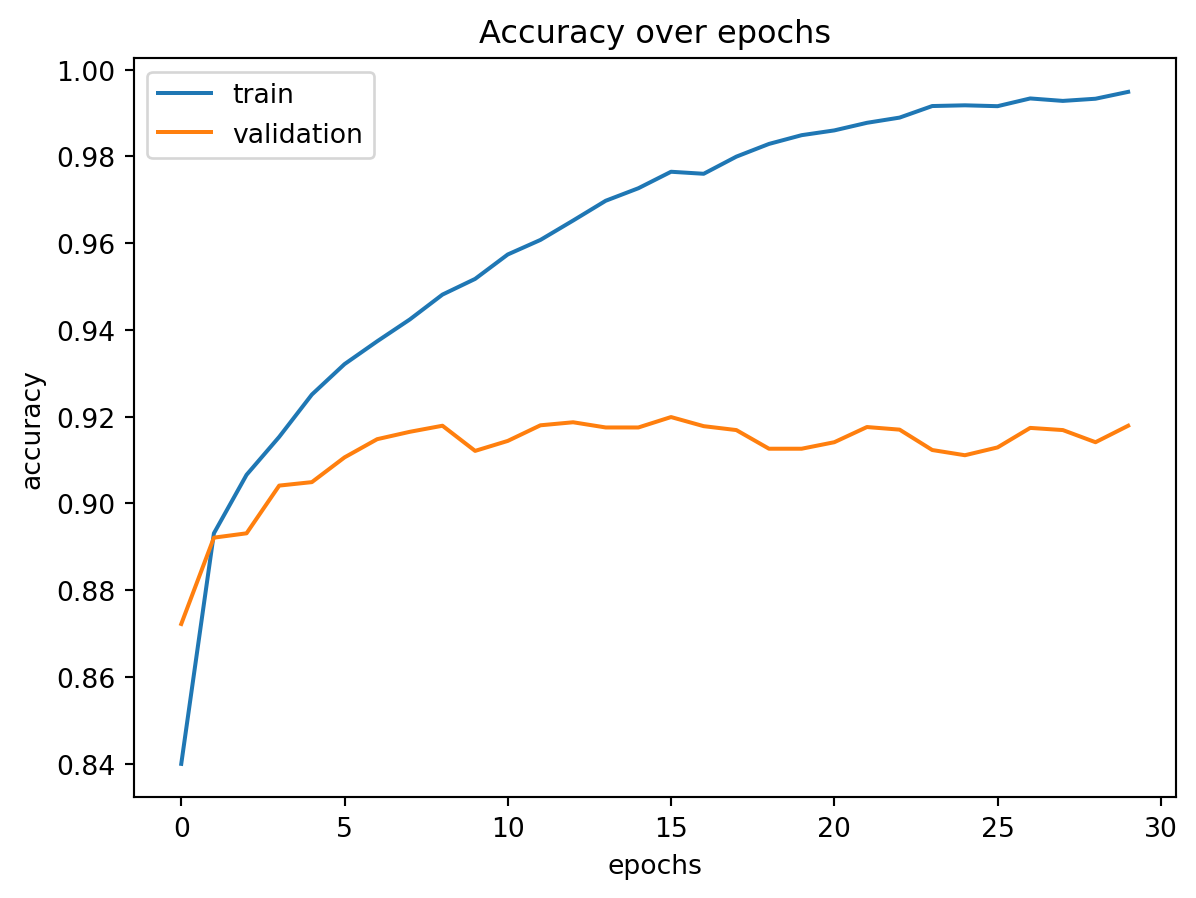

<Figure size 672x480 with 0 Axes>

In [14]:
fig, ax = plt.subplots()
ax.set_title('Accuracy over epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.plot(history.history['accuracy'], label = 'train')
ax.plot(history.history['val_accuracy'], label = 'validation')
ax.legend(loc = 'upper left')
plt.show()
plt.savefig('../figs/mnist_accuracy_convolutional.png')

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1)) # 10 % der Neuronen werden zufällig deaktiviert
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))